In [1]:
#nativos
import os
import time
import unicodedata
import gc

#terceros
import pandas as RFM
import numpy as np
import pymssql
import missingno as msnolistadconoce
from collections import Counter

#grafico
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
from utils_alertas import *
try:
    connection_market.close()
except:
    pass

#conneciom MARKET
connection_market = pymssql.connect(**dicc_conection_market)

EJEMPLO:
202104 mes cerrado de la cosecha de 202104 [202011, 202012, 202101, 202102, 202103, 202104] [202102, 202103, 202104] 
 historia 
 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104] 
 ---------------------------------------------------------------------------------------------------- 
 [202105, 202106] 
 ---------------------------------------------------------------------------------------------------- 
 [202005, 202006]
EJEMPLO:
202003 mes cerrado de la cosecha de 202003 [201910, 201911, 201912, 202001, 202002, 202003] [202001, 202002, 202003] 
 historia 
 [201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003] 
 ---------------------------------------------------------------------------------------------------- 
 [202004, 202005] 
 ---------------------------------------------------------------------------------------------------- 
 [201904, 201905]


In [3]:
base = pd.read_csv("AVANCE_1.csv", dtype={'PERIODO': str, 'COD_UNICO': str, 'RUC': str})
base.tail()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,NUMERO_TRABAJADORES_REGISTRADOS_U10M,NRO_VECES_REACTIVA_IBK,TIENE_REACTIVA_IBK,TIENE_REACTIVA1_REACTIVA2_IBK,NRO_VECES_REACTIVA_SF,TIENE_REACTIVA_SF,TIENE_REACTIVA1_REACTIVA2_SF,TIENE_REACTIVA_CON_OTRA_EF,TIENE_REACTIVA_1_2_CON_OTRAS_EF,TIENE_SOLO_1_CREDITO_REACTIVA_SF
26905,202103,0013465035,20555039311,1,RUMI INGENIEROS INTEGRALES,0,1,0,0,0,...,127.0,2.0,1.0,1.0,1.0,1,0.0,0,0,1
26906,202103,0013835095,20523998235,0,M Y R SERVIPLAST DEL PERU,0,0,0,0,0,...,83.0,0.0,0.0,0.0,2.0,1,1.0,1,1,0
26907,202103,0013849507,20454085150,1,POLICLINICO DIVINO NIÑO,0,0,0,0,1,...,37.0,2.0,1.0,1.0,1.0,1,0.0,0,0,1
26908,202103,0013854099,20563983176,0,INVERSIONES DISTRIBUCIONES E INDUSTRIAS,0,0,1,0,1,...,17.0,1.0,1.0,0.0,3.0,1,1.0,0,0,0
26909,202103,0013859281,20543061051,0,EUROFINSA,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0


In [4]:
base.shape

(26910, 185)

# TRANSACCIONES

In [5]:
import gc
gc.collect()

48

In [6]:
try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )
time.sleep(10)
gc.collect()

22

In [7]:
sql_trx_cliente = """
    SELECT * FROM ODS.HD_VMVP_TRANSACCION_CLIENTE_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
transac_cliente = pd.read_sql(
   sql_trx_cliente , connection_market
)

print(transac_cliente.shape)
transac_cliente.groupby(by=['PERIODO']).size()

(347855, 9)


PERIODO
201904    11795
201905    12346
201906    12038
201907    12424
201908    12146
201909    12792
201910    12608
201911    13016
201912    12919
202001    12928
202002    12657
202003    12423
202004    10494
202005    12371
202006    12553
202007    13431
202008    13710
202009    13854
202010    14048
202011    14386
202012    14153
202101    13685
202102    13509
202103    14013
202104    13797
202105    14340
202106     9419
dtype: int64

In [8]:
transac_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION
0,2020,202008,0015396807,CASH IN,TABLERO,TRANSFERENCIAS,3,82433.00,20200827
1,2020,202008,0015396807,CASH OUT,TABLERO,PAGO DE SERVICIOS,1,185.22,20200804
2,2020,202008,0015419312,CASH IN,NO_CONS,OTROS,1,211.92,20200810
3,2020,202008,0015445308,CASH OUT,TABLERO,PAGOS MASIVOS,1,17305.76,20200814
4,2020,202008,0015480495,CASH IN,TABLERO,DEPOSITOS,1,7154.00,20200817


In [9]:
acum_12 = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 'MTO_CASH_IN', 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.sum
)
acum_12.head(20)

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3089, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(6178, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9267, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12356, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(15445, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(18534, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(21623, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(24712, 3)


,COD_UNICO,MTO_CASH_IN,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1731....",202009
1,0000003392,"[3643894.09, 851578.6900000001, 1755427.720000...",202009
2,0000006114,"[918585.38, 3397388.7199999997, 6719352.990000...",202009
3,0000006726,"[21815.11, 36901.479999999996, 44761.369999999...",202009
4,0000008045,"[16751219.000000002, 16754453.65, 19261351.17,...",202009
5,0000008318,"[10647.08, 32145.510000000002, 6732.92, 27760....",202009
6,0000020628,"[26131314.759999998, 46399290.53, 12974524.46,...",202009
7,0000038026,"[685069.53, 1416611.9500000002, 904095.01, 0.0...",202009
8,0000038570,"[4026176.63, 78272260.11, 4147346.11, 2149453....",202009
9,0000039982,"[0.0, 3500.0, 20000.0, 666761.5, 0.0, 0.0, 0.0...",202009


In [10]:
def div_quickly(a, b):
    if pd.isnull(b) or b == 0:
        return 1
    
    return a / b

def searhc_zero(lista):
    meses = 0
    for val in lista[::-1]:
        if val <= 0:
            return meses
        meses += 1
    
    return meses

acum_12['NRO_MESES_CONCASH_IN'] = acum_12['MTO_CASH_IN'].apply(searhc_zero).astype(int)
acum_12['TIENE_2_MESES_A_MAS_CON_CASH_IN'] = acum_12['NRO_MESES_CONCASH_IN'].apply(lambda _: _ >= 2).astype(int)
acum_12['TIENE_3_MESES_A_MAS_CON_CASH_IN'] = acum_12['NRO_MESES_CONCASH_IN'].apply(lambda _: _ >= 3).astype(int)

acum_12['NRO_MESES_SIN_CASH_IN'] = acum_12['MTO_CASH_IN'].apply(searhc_no_zero).astype(int)
acum_12['TIENE_3_MESES_A_MAS_SIN_CASH_IN'] = acum_12['NRO_MESES_SIN_CASH_IN'].apply(lambda _: _ >= 3).astype(int)
acum_12['TIENE_4_MESES_A_MAS_SIN_CASH_IN'] = acum_12['NRO_MESES_SIN_CASH_IN'].apply(lambda _: _ >= 4).astype(int)
acum_12['TIENE_5_MESES_A_MAS_SIN_CASH_IN'] = acum_12['NRO_MESES_SIN_CASH_IN'].apply(lambda _: _ >= 5).astype(int)
acum_12['TIENE_6_MESES_A_MAS_SIN_CASH_IN'] = acum_12['NRO_MESES_SIN_CASH_IN'].apply(lambda _: _ >= 6).astype(int)
acum_12['TIENE_9_MESES_A_MAS_SIN_CASH_IN'] = acum_12['NRO_MESES_SIN_CASH_IN'].apply(lambda _: _ >= 9).astype(int)
acum_12['TIENE_10_MESES_A_MAS_SIN_CASH_IN'] = acum_12['NRO_MESES_SIN_CASH_IN'].apply(lambda _: _ >= 10).astype(int)
acum_12['TIENE_11_MESES_A_MAS_SIN_CASH_IN'] = acum_12['NRO_MESES_SIN_CASH_IN'].apply(lambda _: _ >= 11).astype(int)
acum_12['TIENE_12_MESES_A_MAS_SIN_CASH_IN'] = acum_12['NRO_MESES_SIN_CASH_IN'].apply(lambda _: _ >= 12).astype(int)

acum_12['MTO_CASH_IN_1UM'] = acum_12['MTO_CASH_IN'].apply(lambda _: _[-1])
acum_12['MTO_CASH_IN_6UM'] = acum_12['MTO_CASH_IN'].apply(lambda _: _[-6])
acum_12['MTO_CASH_IN_12UM'] = acum_12['MTO_CASH_IN'].apply(lambda _: _[-12])

acum_12['MTO_CASH_IN_1UM_OVER_U12M'] = acum_12[['MTO_CASH_IN_1UM', 'MTO_CASH_IN_12UM']].apply(lambda _: div_quickly(_[0], _[1]), axis=1)
acum_12['MTO_CASH_IN_1UM_OVER_U6M'] = acum_12[['MTO_CASH_IN_1UM', 'MTO_CASH_IN_6UM']].apply(lambda _: div_quickly(_[0], _[1]), axis=1)
acum_12['MTO_CASH_IN_CAIDA_LOW_1_U6M_U12M'] = acum_12[['MTO_CASH_IN_1UM_OVER_U12M', 'MTO_CASH_IN_1UM_OVER_U6M']].apply(lambda _: _[0] < 1 and _[1] < 1, axis=1).astype(int)
acum_12['MTO_CASH_IN_CAIDA_LOW_0.85_U6M_U12M'] = acum_12[['MTO_CASH_IN_1UM_OVER_U12M', 'MTO_CASH_IN_1UM_OVER_U6M']].apply(lambda _: _[0] < 0.85 and _[1] < 0.85, axis=1).astype(int)
acum_12['MTO_CASH_IN_CAIDA_LOW_0.75_U6M_U12M'] = acum_12[['MTO_CASH_IN_1UM_OVER_U12M', 'MTO_CASH_IN_1UM_OVER_U6M']].apply(lambda _: _[0] < 0.75 and _[1] < 0.75, axis=1).astype(int)
acum_12['MTO_CASH_IN_CAIDA_LOW_0.65_U6M_U12M'] = acum_12[['MTO_CASH_IN_1UM_OVER_U12M', 'MTO_CASH_IN_1UM_OVER_U6M']].apply(lambda _: _[0] < 0.65 and _[1] < 0.65, axis=1).astype(int)
acum_12['MTO_CASH_IN_CAIDA_LOW_0.55_U6M_U12M'] = acum_12[['MTO_CASH_IN_1UM_OVER_U12M', 'MTO_CASH_IN_1UM_OVER_U6M']].apply(lambda _: _[0] < 0.55 and _[1] < 0.55, axis=1).astype(int)
acum_12['MTO_CASH_IN_CAIDA_LOW_0.45_U6M_U12M'] = acum_12[['MTO_CASH_IN_1UM_OVER_U12M', 'MTO_CASH_IN_1UM_OVER_U6M']].apply(lambda _: _[0] < 0.45 and _[1] < 0.45, axis=1).astype(int)
acum_12['MTO_CASH_IN_CAIDA_LOW_0.35_U6M_U12M'] = acum_12[['MTO_CASH_IN_1UM_OVER_U12M', 'MTO_CASH_IN_1UM_OVER_U6M']].apply(lambda _: _[0] < 0.35 and _[1] < 0.35, axis=1).astype(int)
acum_12['MTO_CASH_IN_CAIDA_LOW_0.25_U6M_U12M'] = acum_12[['MTO_CASH_IN_1UM_OVER_U12M', 'MTO_CASH_IN_1UM_OVER_U6M']].apply(lambda _: _[0] < 0.25 and _[1] < 0.25, axis=1).astype(int)
acum_12.tail()

,COD_UNICO,MTO_CASH_IN,PERIODO,NRO_MESES_CONCASH_IN,TIENE_2_MESES_A_MAS_CON_CASH_IN,TIENE_3_MESES_A_MAS_CON_CASH_IN,NRO_MESES_SIN_CASH_IN,TIENE_3_MESES_A_MAS_SIN_CASH_IN,TIENE_4_MESES_A_MAS_SIN_CASH_IN,TIENE_5_MESES_A_MAS_SIN_CASH_IN,...,MTO_CASH_IN_1UM_OVER_U12M,MTO_CASH_IN_1UM_OVER_U6M,MTO_CASH_IN_CAIDA_LOW_1_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.85_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.75_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.65_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.55_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.45_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.35_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.25_U6M_U12M
3084,0017614888,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202104,0,0,0,2,0,0,0,...,1.0,1.0,0,0,0,0,0,0,0,0
3085,0017746563,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202104,0,0,0,12,1,1,1,...,1.0,1.0,0,0,0,0,0,0,0,0
3086,0017819154,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202104,1,0,0,0,0,0,0,...,1.0,1.0,0,0,0,0,0,0,0,0
3087,0017828877,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202104,1,0,0,0,0,0,0,...,1.0,1.0,0,0,0,0,0,0,0,0
3088,0017898907,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202104,0,0,0,12,1,1,1,...,1.0,1.0,0,0,0,0,0,0,0,0


In [11]:
acum_12['PERIODO'] = acum_12['PERIODO'].astype(str)
base = base.merge(
    acum_12, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_12
base.head(3)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,MTO_CASH_IN_1UM_OVER_U12M,MTO_CASH_IN_1UM_OVER_U6M,MTO_CASH_IN_CAIDA_LOW_1_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.85_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.75_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.65_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.55_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.45_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.35_U6M_U12M,MTO_CASH_IN_CAIDA_LOW_0.25_U6M_U12M
0,202008,0003041431,20100132916,1,CERAMICOS PERUANOS,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0003142478,20100013747,1,BIOCON DEL PERU,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202008,0003107943,20114022838,0,ARENERA JAEN,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

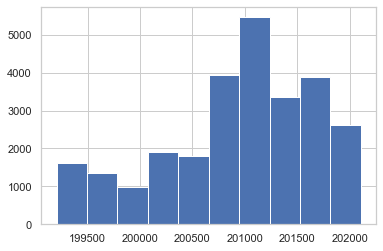

In [12]:
base['PERIODO_INGRESO'] = base['FEC_INGRESO'].apply(lambda _: str(_)[:7].replace('-', '')).astype(int)
base['PERIODO_INGRESO'].hist()

In [13]:
pd.crosstab(
    base['TIENE_3_MESES_A_MAS_SIN_CASH_IN'], base['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
TIENE_3_MESES_A_MAS_SIN_CASH_IN,,,,,,,,
0.0,2205,2228,2215,2220,2563,2569,2560,2550
1.0,187,172,172,171,207,212,219,212


In [14]:
pd.crosstab(
    base['TIENE_12_MESES_A_MAS_SIN_CASH_IN'], base['PERIODO']
)


PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
TIENE_12_MESES_A_MAS_SIN_CASH_IN,,,,,,,,
0.0,2299,2326,2332,2341,2723,2733,2740,2725
1.0,93,74,55,50,47,48,39,37


In [15]:
base['TIENE_3_MESES_A_MAS_SIN_CASH_IN'] = base[
    ['TIENE_3_MESES_A_MAS_SIN_CASH_IN', 'PERIODO_INGRESO', 'PERIODO']
].apply(
    lambda _: 1 if pd.isnull(_[0]) and int(_[1]) < int((datetime.strptime(_[2], '%Y%m') - relativedelta(months=3)).strftime('%Y%m')) else _[0], axis=1
).fillna(0)

base['TIENE_4_MESES_A_MAS_SIN_CASH_IN'] = base[
    ['TIENE_4_MESES_A_MAS_SIN_CASH_IN', 'PERIODO_INGRESO', 'PERIODO']
].apply(
    lambda _: 1 if pd.isnull(_[0]) and int(_[1]) < int((datetime.strptime(_[2], '%Y%m') - relativedelta(months=4)).strftime('%Y%m')) else _[0], axis=1
).fillna(0)

base['TIENE_5_MESES_A_MAS_SIN_CASH_IN'] = base[
    ['TIENE_5_MESES_A_MAS_SIN_CASH_IN', 'PERIODO_INGRESO', 'PERIODO']
].apply(
    lambda _: 1 if pd.isnull(_[0]) and int(_[1]) < int((datetime.strptime(_[2], '%Y%m') - relativedelta(months=5)).strftime('%Y%m')) else _[0], axis=1
).fillna(0)


base['TIENE_6_MESES_A_MAS_SIN_CASH_IN'] = base[
    ['TIENE_6_MESES_A_MAS_SIN_CASH_IN', 'PERIODO_INGRESO', 'PERIODO']
].apply(
    lambda _: 1 if pd.isnull(_[0]) and int(_[1]) < int((datetime.strptime(_[2], '%Y%m') - relativedelta(months=6)).strftime('%Y%m')) else _[0], axis=1
).fillna(0)


base['TIENE_9_MESES_A_MAS_SIN_CASH_IN'] = base[
    ['TIENE_9_MESES_A_MAS_SIN_CASH_IN', 'PERIODO_INGRESO', 'PERIODO']
].apply(
    lambda _: 1 if pd.isnull(_[0]) and int(_[1]) < int((datetime.strptime(_[2], '%Y%m') - relativedelta(months=9)).strftime('%Y%m')) else _[0], axis=1
).fillna(0)

base['TIENE_10_MESES_A_MAS_SIN_CASH_IN'] = base[
    ['TIENE_10_MESES_A_MAS_SIN_CASH_IN', 'PERIODO_INGRESO', 'PERIODO']
].apply(
    lambda _: 1 if pd.isnull(_[0]) and int(_[1]) < int((datetime.strptime(_[2], '%Y%m') - relativedelta(months=10)).strftime('%Y%m')) else _[0], axis=1
).fillna(0)
base['TIENE_11_MESES_A_MAS_SIN_CASH_IN'] = base[
    ['TIENE_11_MESES_A_MAS_SIN_CASH_IN', 'PERIODO_INGRESO', 'PERIODO']
].apply(
    lambda _: 1 if pd.isnull(_[0]) and int(_[1]) < int((datetime.strptime(_[2], '%Y%m') - relativedelta(months=11)).strftime('%Y%m')) else _[0], axis=1
).fillna(0)
base['TIENE_12_MESES_A_MAS_SIN_CASH_IN'] = base[
    ['TIENE_12_MESES_A_MAS_SIN_CASH_IN', 'PERIODO_INGRESO', 'PERIODO']
].apply(
    lambda _: 1 if pd.isnull(_[0]) and int(_[1]) < int((datetime.strptime(_[2], '%Y%m') - relativedelta(months=12)).strftime('%Y%m')) else _[0], axis=1
).fillna(0)


In [16]:
pd.crosstab(
    base['TIENE_3_MESES_A_MAS_SIN_CASH_IN'], base['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
TIENE_3_MESES_A_MAS_SIN_CASH_IN,,,,,,,,,,
0.0,51,2213,2234,2219,2223,2563,2569,2562,2553,9
1.0,2377,286,273,275,278,329,331,341,337,2887


In [17]:
pd.crosstab(
    base['TIENE_12_MESES_A_MAS_SIN_CASH_IN'], base['PERIODO']
)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
TIENE_12_MESES_A_MAS_SIN_CASH_IN,,,,,,,,,,
0.0,129,2315,2344,2350,2360,2742,2750,2759,2746,115
1.0,2299,184,163,144,141,150,150,144,144,2781


In [18]:
for column in [col for col in base.columns if 'MTO' in col.upper()]:
    base[column] = base[column].fillna(0)
    
base['MTO_CASH_IN_CAIDA_LOW_0.25_U6M_U12M'].value_counts()

0.0    25182
1.0     1728
Name: MTO_CASH_IN_CAIDA_LOW_0.25_U6M_U12M, dtype: int64

In [19]:
base['MTO_CASH_IN_CAIDA_LOW_0.75_U6M_U12M'].value_counts()

0.0    23538
1.0     3372
Name: MTO_CASH_IN_CAIDA_LOW_0.75_U6M_U12M, dtype: int64

In [20]:
base['NO_CASHIN_REGISTRADOS_U12M'] = base['MTO_CASH_IN_12UM'].apply(lambda _: 1 if pd.isnull(_) else 0)
pd.crosstab(base['NO_CASHIN_REGISTRADOS_U12M'], base['PERIODO'])

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
NO_CASHIN_REGISTRADOS_U12M,,,,,,,,,,
0,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896


In [21]:
#base[base['NO_CASHIN_REGISTRADOS_U12M'] == 1]

#### REVIEW PERIODOS

In [22]:
transac_cliente.shape, transac_cliente.groupby(by=['PERIODO', 'COD_UNICO', 'TIPO_CASH', 'GRUPO_N1', 'KPI']).size().shape

((347855, 9), (347855,))

In [23]:
transac_cliente['COD_UNICO'].unique().shape

(3139,)

In [24]:
def get_kpi(val):
    if val == 'NO_CONS':
        return 'NO_TABLERO'
    elif val == 'TABLERO':
        return ''
    
    return val
        
transac_cliente['KPI'] = transac_cliente['KPI'].apply(get_kpi)
transac_cliente['KPI'].value_counts()

              255255
NO_TABLERO     92600
Name: KPI, dtype: int64

#### PIVOTEO GRUPO DE CASH_IN EN LA MISMA COSECHA

In [25]:
pivoteo = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['GRUPO_N1', 'KPI', 'PERIODO'], aggfunc=np.sum, fill_value=0
)
print(pivoteo.shape)
pivoteo.head(2)

(3089, 216)


GRUPO_N1     COBRANZAS                                              \
KPI                                                                  
PERIODO         201904     201905     201906     201907     201908   
COD_UNICO                                                            
0000002469        0.00       0.00       0.00        0.0       0.00   
0000003392  1628254.71  790647.27  658597.38  1425572.6  924867.68   

GRUPO_N1                                                             ...  \
KPI                                                                  ...   
PERIODO         201909      201910     201911     201912     202001  ...   
COD_UNICO                                                            ...   
0000002469        0.00        0.00       0.00       0.00       0.00  ...   
0000003392  2674209.53  3306476.38  601537.18  635073.36  286165.18  ...   

GRUPO_N1   TRANSFERENCIAS                                                  \
KPI                                                                         
PERIODO            202009      202010      202011      202012      202101   
COD_UNICO                                                                   
0000002469      358400.00     1000.00        0.00        0.00        0.00   
0000003392     1642966.45  4399121.42  2864879.85  2570102.45  1605545.84   

GRUPO_N1                                                           
KPI                                                                
PERIODO         202102      202103      202104      202105 202106  
COD_UNICO                                                          
0000002469        0.00        0.00        0.00        0.00    0.0  
0000003392  1951191.57  1389511.71  2932153.46  2293138.55  155.0  

[2 rows x 216 columns]

In [26]:
pivoteo = pivoteo.unstack().reset_index()
pivoteo.columns = ['GRUPO_N1', 'KPI', 'PERIODO', 'COD_UNICO', 'VOLUMEN_SOLES']
pivoteo.head()

,GRUPO_N1,KPI,PERIODO,COD_UNICO,VOLUMEN_SOLES
0,COBRANZAS,,201904,0000002469,0.00
1,COBRANZAS,,201904,0000003392,1628254.71
2,COBRANZAS,,201904,0000006114,0.00
3,COBRANZAS,,201904,0000006726,0.00
4,COBRANZAS,,201904,0000008045,0.00


In [27]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['GRUPO_N1', 'KPI'], aggfunc=np.sum, fill_value=0
)

pivoteo.columns = ['_'.join(list(col)).replace(' ', '_') for col in pivoteo]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)
print(pivoteo.shape)

pivoteo.head()

(83403, 9)


COBRANZAS_  DEPOSITOS_  OPERACIONES_MESA_  \
COD_UNICO  PERIODO                                              
0000002469 201904          0.0         0.0                0.0   
           201905          0.0         0.0                0.0   
           201906          0.0         0.0                0.0   
           201907          0.0         0.0                0.0   
           201908          0.0         0.0                0.0   

                    OTROS_NO_TABLERO  PAGOS_RECIBIDOS_  POS_  RECAUDACION_  \
COD_UNICO  PERIODO                                                           
0000002469 201904          342654.51               0.0   0.0           0.0   
           201905          148519.20               0.0   0.0           0.0   
           201906          505101.87               0.0   0.0           0.0   
           201907          259281.10               0.0   0.0           0.0   
           201908               0.00               0.0   0.0           0.0   

                    TRANSFERENCIAS_      TOTAL  
COD_UNICO  PERIODO                              
0000002469 201904               0.0  342654.51  
           201905           15000.0  163519.20  
           201906           16655.0  521756.87  
           201907           20000.0  279281.10  
           201908               0.0       0.00

In [28]:
pivoteo_grupo = pivoteo.reset_index()
pivoteo_grupo.head(3)

,COD_UNICO,PERIODO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,TOTAL
0,0000002469,201904,0.0,0.0,0.0,342654.51,0.0,0.0,0.0,0.0,342654.51
1,0000002469,201905,0.0,0.0,0.0,148519.20,0.0,0.0,0.0,15000.0,163519.20
2,0000002469,201906,0.0,0.0,0.0,505101.87,0.0,0.0,0.0,16655.0,521756.87


In [29]:
for tramo in tramos:
    _3_meses_previos = tramo[3]
    _6_meses_previos = tramo[2]
    _12_meses_previos = tramo[1]
    print(tramo[0], _6_meses_previos, _3_meses_previos, tramo[1][:-2])
    print(_12_meses_previos)
    break

202009 [202004, 202005, 202006, 202007, 202008, 202009] [202007, 202008, 202009] [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
[201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]


In [30]:
contador = 1
dd = {
    'TOTAL': [list]
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns = ['listado_cash_in_u3m']
    _3m_tipos = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).sum()
    _3m_tipos.columns = ['_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_tipos.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    _3m_tipos = _3m_tipos.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_tipos['PERIODO'] = tramo[0]
    if contador == 1:
        acum_3 = _3m_actual.copy()
        sum_3 = _3m_tipos.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        sum_3 = pd.concat(
            [sum_3, _3m_tipos], axis=0
        )
        
    print(acum_3.shape, sum_3.shape)
    contador +=1
    del _3m_actual
    del _3m_tipos

202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3089, 3) (3089, 11)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6178, 3) (6178, 11)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9267, 3) (9267, 11)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12356, 3) (12356, 11)
202101 [202011, 202012, 202101]
////////////////////////////////////////////////////////////////////////////////////////////////////
(15445, 3) (15445, 11)
202102 [202012, 202101, 202102]
////////////////////////////////////////////////////////////////////////////////////////////////////
(18534, 3) (18534, 11)
202103 [202101, 202102, 202103]
//////////////////////////////////////

In [31]:
sum_3.head()

,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,0.0,0.00,9812169.64,105.44,0.00,0.00,0.00,358400.00,10170675.08,202009
1,0000003392,0.0,160.00,1832300.00,0.00,204767.54,0.00,0.00,3516987.16,5554214.70,202009
2,0000006114,0.0,127195.72,6048106.25,249.27,0.00,0.00,0.00,28966.92,6204518.16,202009
3,0000006726,0.0,75649.34,0.00,0.25,0.00,0.00,0.00,60870.97,136520.56,202009
4,0000008045,0.0,2222452.45,18380550.00,0.00,16483082.60,2283311.03,3568243.14,3686862.21,46624501.43,202009


In [32]:
sum_3 = sum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in sum_3.columns:
    sum_3['_MTO_CASH_IN_' + col + 'ESTE_MES'] = sum_3[col].copy()
    sum_3[col + '_CASH_IN_PERCENT_U3M'] = sum_3[col] / sum_3['TOTAL']
    del sum_3[col]


sum_3.columns = [('TRX_' + col).replace(' ', '_')  for col in sum_3.columns]
sum_3 = sum_3.reset_index()
sum_3.head(3)

,COD_UNICO,PERIODO,TRX__MTO_CASH_IN_COBRANZAS_ESTE_MES,TRX_COBRANZAS__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_DEPOSITOS_ESTE_MES,TRX_DEPOSITOS__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_OPERACIONES_MESA_ESTE_MES,TRX_OPERACIONES_MESA__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_OTROS_NO_TABLEROESTE_MES,TRX_OTROS_NO_TABLERO_CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_PAGOS_RECIBIDOS_ESTE_MES,TRX_PAGOS_RECIBIDOS__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_POS_ESTE_MES,TRX_POS__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_RECAUDACION_ESTE_MES,TRX_RECAUDACION__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_TRANSFERENCIAS_ESTE_MES,TRX_TRANSFERENCIAS__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_TOTALESTE_MES,TRX_TOTAL_CASH_IN_PERCENT_U3M
0,0000002469,202009,0.0,0.0,0.00,0.000000,9812169.64,0.964751,105.44,0.00001,0.00,0.000000,0.0,0.0,0.0,0.0,358400.00,0.035239,10170675.08,1.0
1,0000003392,202009,0.0,0.0,160.00,0.000029,1832300.00,0.329894,0.00,0.00000,204767.54,0.036867,0.0,0.0,0.0,0.0,3516987.16,0.633211,5554214.70,1.0
2,0000006114,202009,0.0,0.0,127195.72,0.020500,6048106.25,0.974791,249.27,0.00004,0.00,0.000000,0.0,0.0,0.0,0.0,28966.92,0.004669,6204518.16,1.0


In [33]:
sum_3['PERIODO'].min(), sum_3['PERIODO'].max()

(202009, 202104)

In [34]:
sum_3['PERIODO'] = sum_3['PERIODO'].astype(str)

base = base.merge(
    sum_3, how='left', on=['PERIODO', 'COD_UNICO']
)

del sum_3
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TRX__MTO_CASH_IN_PAGOS_RECIBIDOS_ESTE_MES,TRX_PAGOS_RECIBIDOS__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_POS_ESTE_MES,TRX_POS__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_RECAUDACION_ESTE_MES,TRX_RECAUDACION__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_TRANSFERENCIAS_ESTE_MES,TRX_TRANSFERENCIAS__CASH_IN_PERCENT_U3M,TRX__MTO_CASH_IN_TOTALESTE_MES,TRX_TOTAL_CASH_IN_PERCENT_U3M
0,202008,0003041431,20100132916,1,CERAMICOS PERUANOS,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0003142478,20100013747,1,BIOCON DEL PERU,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
base.shape

(26910, 231)

In [36]:
acum_3.head(5)

,COD_UNICO,listado_cash_in_u3m,PERIODO
0,0000002469,"[3457641.74, 6354633.340000001, 358400.0]",202009
1,0000003392,"[573919.81, 1367027.02, 3613267.87]",202009
2,0000006114,"[2882047.1399999997, 3314569.7399999998, 7901....",202009
3,0000006726,"[23253.41, 73864.68000000001, 39402.47]",202009
4,0000008045,"[14525980.91, 18380672.240000002, 13717848.28]",202009


In [37]:
def alernante(princiapl, secundario):
    if pd.isnull(princiapl):
        return 0 if pd.isnull(secundario) else secundario
    
    return princiapl

## RELEVANTE
lambda_caida_seguida_u3m = lambda _: (
    (_[-2] < _[-3] and _[-1] < _[2]) or 
    ( _[-1] < _[-3] and _[-2] == 0) or 
    ( _[-1] < _[-2] and _[-3] == 0)
) and _[-1] > 100 and alernante(_[-3], _[-2]) / _[-1] >= 0.2           ## Toda disminuación debe ser mayor al 20%

lambda_subida_seguida_u3m = lambda _: _[-2] > _[0] and _[-1] > _[-2]
lambda_caida_10_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] <= 0.9 and _[-1] > 100
lambda_caida_5_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] <= 0.95 and _[-1] > 100
lambda_caida_20_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] <= 0.8 and _[-1] > 100
lambda_caida_30_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] <= 0.7 and _[-1] > 100
lambda_caida_40_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] <= 0.6 and _[-1] > 100
lambda_caida_50_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] <= 0.5 and _[-1] > 100
lambda_subida_10_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] >= 1.1 and _[-1] > 100
lambda_subida_20_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] >= 1.2 and _[-1] > 100
lambda_subida_30_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] >= 1.3 and _[-1] > 100
lambda_subida_40_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] >= 1.4 and _[-1] > 100
lambda_subida_50_percent = lambda _: _[-3] > 100 and _[-1] / _[-3] >= 1.5 and _[-1] > 100
lambda_min_u3m = lambda _: _[-1] == min([mes for mes in _]) and _[-1] > 100 and alernante(_[-3], _[-2]) / _[-1] >= 0.2
lambda_max_u3m = lambda _: _[2] > _[0] and _[2] >= _[1]
lambda_no_hay = lambda _: _[-1] < 100 and (_[-2] > 100 or  _[-3] > 100)
lambda_no_hay_u2m = lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] > 100
lambda_no_hay_u3m = lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100

acum_3['TRX_CASH_IN_1UM_PIVOTEO'] = acum_3['listado_cash_in_u3m'].apply(lambda _: _[-1])
acum_3['TRX_CASH_IN_2UM_PIVOTEO'] = acum_3['listado_cash_in_u3m'].apply(lambda _: _[-2])
acum_3['TRX_CASH_IN_3UM_PIVOTEO'] = acum_3['listado_cash_in_u3m'].apply(lambda _: _[-3])
acum_3['TRX_CAIDA_SEGUIDA_U3M_CASH_IN'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_seguida_u3m).astype(int)
acum_3['TRX_CAIDA_5PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_5_percent).astype(int)
acum_3['TRX_CAIDA_10PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_10_percent).astype(int)
acum_3['TRX_CAIDA_20PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_20_percent).astype(int)
acum_3['TRX_CAIDA_30PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_30_percent).astype(int)
acum_3['TRX_CAIDA_40PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_40_percent).astype(int)
acum_3['TRX_CAIDA_50PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_caida_50_percent).astype(int)

acum_3['TRX_SUBIDA_10PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_10_percent).astype(int)
acum_3['TRX_SUBIDA_20PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_20_percent).astype(int)
acum_3['TRX_SUBIDA_30PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_30_percent).astype(int)
acum_3['TRX_SUBIDA_40PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_40_percent).astype(int)
acum_3['TRX_SUBIDA_50PERCENT_MES_ANTERIOR'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_50_percent).astype(int)

acum_3['TRX_SUBIDA_SEGUIDA_U3M_CASH_IN'] = acum_3['listado_cash_in_u3m'].apply(lambda_subida_seguida_u3m).astype(int)
acum_3['TRX_MENOR_CASH_IN_DE_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_min_u3m).astype(int)
acum_3['TRX_MAYOR_CASH_IN_DE_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_max_u3m).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_ESTE_MES'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_U2M'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay_u2m).astype(int)
acum_3['TRX_NO_CASH_IN_VPC_U3M'] = acum_3['listado_cash_in_u3m'].apply(lambda_no_hay_u3m).astype(int)

acum_3['TRX_CAIDA_SEGUIDA_O_NO_CASH_IN_U3M'] = acum_3[['TRX_CAIDA_SEGUIDA_U3M_CASH_IN', 'TRX_NO_CASH_IN_VPC_U3M']].apply(
    lambda _: 1 if _[0] == 1 or _[1] == 1 else 0, axis=1
).astype(int)

acum_3[acum_3['PERIODO'] == 202009].head(10)

,COD_UNICO,listado_cash_in_u3m,PERIODO,TRX_CASH_IN_1UM_PIVOTEO,TRX_CASH_IN_2UM_PIVOTEO,TRX_CASH_IN_3UM_PIVOTEO,TRX_CAIDA_SEGUIDA_U3M_CASH_IN,TRX_CAIDA_5PERCENT_MES_ANTERIOR,TRX_CAIDA_10PERCENT_MES_ANTERIOR,TRX_CAIDA_20PERCENT_MES_ANTERIOR,...,TRX_SUBIDA_30PERCENT_MES_ANTERIOR,TRX_SUBIDA_40PERCENT_MES_ANTERIOR,TRX_SUBIDA_50PERCENT_MES_ANTERIOR,TRX_SUBIDA_SEGUIDA_U3M_CASH_IN,TRX_MENOR_CASH_IN_DE_U3M,TRX_MAYOR_CASH_IN_DE_U3M,TRX_NO_CASH_IN_VPC_ESTE_MES,TRX_NO_CASH_IN_VPC_U2M,TRX_NO_CASH_IN_VPC_U3M,TRX_CAIDA_SEGUIDA_O_NO_CASH_IN_U3M
0,0000002469,"[3457641.74, 6354633.340000001, 358400.0]",202009,358400.00,6354633.34,3457641.74,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0000003392,"[573919.81, 1367027.02, 3613267.87]",202009,3613267.87,1367027.02,573919.81,0,0,0,0,...,1,1,1,1,0,1,0,0,0,0
2,0000006114,"[2882047.1399999997, 3314569.7399999998, 7901....",202009,7901.28,3314569.74,2882047.14,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
3,0000006726,"[23253.41, 73864.68000000001, 39402.47]",202009,39402.47,73864.68,23253.41,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0000008045,"[14525980.91, 18380672.240000002, 13717848.28]",202009,13717848.28,18380672.24,14525980.91,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0000008318,"[2644.9300000000003, 433942.8, 1291.78]",202009,1291.78,433942.80,2644.93,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
6,0000020628,"[42082260.64999999, 23515426.8, 28250836.1]",202009,28250836.10,23515426.80,42082260.65,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7,0000038026,"[115871.12, 32991.46, 0.0]",202009,0.00,32991.46,115871.12,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0000038570,"[2468070.18, 1910839.53, 1850898.8199999998]",202009,1850898.82,1910839.53,2468070.18,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
9,0000039982,"[1839021.0, 0.0, 71135.0]",202009,71135.00,0.00,1839021.00,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [38]:
if 'listado_cash_in_u3m' in acum_3.columns:
    del acum_3['listado_cash_in_u3m']
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)

base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(26910, 253)

## 12 meses previos (NUevo 23/12/2020)

In [39]:
for tramo in tramos:
    _3_meses_previos = tramo[1]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos)

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105]
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106]


In [40]:
contador = 1
dd = {
    'TOTAL': [list]
}

for tramo in tramos:
    _3_meses_previos = tramo[1]
    #_6_meses_previos = tramo[2]
    print(tramo[0], _3_meses_previos[:-2])
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos[:-2])].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns = ['listado_cash_in_u12m']
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual

acum_3.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3089, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6178, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9267, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12356, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
///////////////////////////////////

,COD_UNICO,listado_cash_in_u12m,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1731....",202009
1,0000003392,"[3643894.09, 851578.6900000001, 1755427.720000...",202009
2,0000006114,"[918585.3799999999, 3397388.7199999997, 671935...",202009
3,0000006726,"[21815.11, 36901.479999999996, 44761.369999999...",202009
4,0000008045,"[16751219.0, 16754453.650000002, 19261351.17, ...",202009


In [41]:
acum_3['len'] = acum_3['listado_cash_in_u12m'].apply(lambda _: len(_))
acum_3['len'].value_counts()

12    24712
Name: len, dtype: int64

In [42]:
def caida_hist(lista, indice_hist, treshold):
    media_hist = (lista[indice_hist] +  lista[indice_hist + 1]) / 2
    now = lista[-1]
    
    if media_hist == 0:
        return 0
    
    return  now / media_hist <= treshold

del acum_3['len']
acum_3['MTO_CASH_IN_U12M_2'] = acum_3['listado_cash_in_u12m'].apply(lambda _: _[-12])
acum_3['MTO_CASH_IN_U6M_2'] = acum_3['listado_cash_in_u12m'].apply(lambda _: _[-6])
acum_3['MTO_CASH_IN_U1M_2'] = acum_3['listado_cash_in_u12m'].apply(lambda _: _[-1])
acum_3['TENDENCIA_CASHIN_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 13)), _[-12:], 1)[0])
acum_3['TENDENCIA_CASHIN_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 7)), _[-6:], 1)[0])
acum_3['TENDENCIA_CASHIN_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: np.polyfit(list(range(1, 4)), _[-3:], 1)[0])

acum_3['TENDENCIA_DISMINUCION_CASHIN_U12M'] = acum_3['TENDENCIA_CASHIN_U12M'].apply(lambda _: _ < 0).astype(int)
acum_3['TENDENCIA_DISMINUCION_CASHIN_U6M'] = acum_3['TENDENCIA_CASHIN_U6M'].apply(lambda _: _ < 0).astype(int)
acum_3['TENDENCIA_DISMINUCION_CASHIN_U3M'] = acum_3['TENDENCIA_CASHIN_U3M'].apply(lambda _: _ < 0).astype(int)

acum_3['TENDENCIA_DISMINUCION_CASHIN_U3M_U6M_U12M'] = acum_3[['TENDENCIA_CASHIN_U3M', 'TENDENCIA_CASHIN_U6M', 'TENDENCIA_CASHIN_U12M']].apply(
    lambda _: _[0] < 0 and _[1] < 0 and _[2] < 0, axis=1).astype(int)

acum_3['TIENE_DISMINUCION_CASHIN_5PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U12M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -12, 0.5)).astype(int)

acum_3['TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U6M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -7, 0.5)).astype(int)

acum_3['TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.95)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.9)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.8)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.75)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.7)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.6)).astype(int)
acum_3['TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U3M'] = acum_3['listado_cash_in_u12m'].apply(lambda _: caida_hist(_, -4, 0.5)).astype(int)

In [43]:
acum_3.head(3)

,COD_UNICO,listado_cash_in_u12m,PERIODO,MTO_CASH_IN_U12M_2,MTO_CASH_IN_U6M_2,MTO_CASH_IN_U1M_2,TENDENCIA_CASHIN_U12M,TENDENCIA_CASHIN_U6M,TENDENCIA_CASHIN_U3M,TENDENCIA_DISMINUCION_CASHIN_U12M,...,TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U6M,TIENE_DISMINUCION__CASHIN_5PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_10PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_20PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_25PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_30PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_40PERCENT_A_MAS_U3M,TIENE_DISMINUCION__CASHIN_50PERCENT_A_MAS_U3M
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1731....",202009,0.00,0.00,358400.00,298413.451888,694623.164571,-1549620.87,0,...,0,0,0,1,1,1,1,1,1,1
1,0000003392,"[3643894.09, 851578.6900000001, 1755427.720000...",202009,3643894.09,1273436.14,3613267.87,37278.998392,148091.448000,1519674.03,0,...,0,0,0,0,0,0,0,0,0,0
2,0000006114,"[918585.3799999999, 3397388.7199999997, 671935...",202009,918585.38,328698.15,7901.28,-125878.148916,264434.672571,-1437072.93,1,...,1,1,1,1,1,1,1,1,1,1


In [44]:
if 'listado_cash_in_u12m' in acum_3.columns:
    del acum_3['listado_cash_in_u12m']
    
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)

base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(26910, 284)

### LOS NO TIENE

In [45]:
pivoteo.shape

(83403, 9)

<AxesSubplot:>

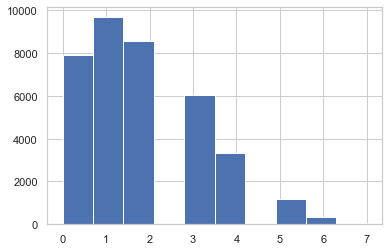

In [46]:
del pivoteo['TOTAL']
pivoteo.columns = [('NO_TIENE_TRX_' + col).replace(' ', '_') + '_MES_ACTUAL' for col in pivoteo.columns]

col_tiene = [_ for _ in pivoteo.columns if 'TIENE' in _]

for col in col_tiene:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _<= 100 else 0)

pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo[col_tiene].sum(axis=1)
pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: len(col_tiene) - _)

pivoteo = pivoteo.reset_index()
pivoteo[pivoteo['PERIODO'].astype(int) >= 202007]['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].hist()

In [47]:
def cut_2_2(val):
    if pd.isnull(val):
        return None
    
    if val <= 2:
        return 'hasta 2'
    elif val < 5:
        return '3 a 4'
    else:
        return '5 a mas'

    return 0

pivoteo['cat_CASHIN_ACTIVOS_MES_ACTUAL'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(cut_2_2)
pivoteo['TIENE_SOLO_1_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 1).astype(int)
pivoteo['TIENE_SOLO_2_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 2).astype(int)
pivoteo['TIENE_SOLO_3_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ == 3).astype(int)
pivoteo['TIENE_2_O_MENOS_TIPO_CASH_IN_ACTIVO_ESTE_MES'] = pivoteo['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'].apply(lambda _: _ <= 2).astype(int)

In [48]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
base.shape

(26910, 298)

#### MIRANDO 3  MESES TODOS LAS CATEGORIAS

In [49]:
for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)

202009 [202007, 202008, 202009]
202010 [202008, 202009, 202010]
202011 [202009, 202010, 202011]
202012 [202010, 202011, 202012]
202101 [202011, 202012, 202101]
202102 [202012, 202101, 202102]
202103 [202101, 202102, 202103]
202104 [202102, 202103, 202104]


In [50]:
pivoteo_grupo['PERIODO'].min(), pivoteo_grupo['PERIODO'].max()

('201904', '202106')

In [51]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['TOTAL', 'PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3089, 10)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6178, 10)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9267, 10)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12356, 10)
202101 [202011, 202012, 202101]
////////////////////////////////////////////////////////////////////////////////////////////////////
(15445, 10)
202102 [202012, 202101, 202102]
////////////////////////////////////////////////////////////////////////////////////////////////////
(18534, 10)
202103 [202101, 202102, 202103]
////////////////////////////////////////////////////////////////////////////////////////////////////


,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,PERIODO
0,0000002469,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[3457641.74, 6354527.9, 0.0]","[0.0, 105.44, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 358400.0]",202009
1,0000003392,"[0.0, 0.0, 0.0]","[0.0, 60.0, 100.0]","[0.0, 0.0, 1832300.0]","[0.0, 0.0, 0.0]","[0.0, 66866.12, 137901.42]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[573919.81, 1300100.9, 1642966.45]",202009
2,0000006114,"[0.0, 0.0, 0.0]","[121811.12, 0.0, 5384.6]","[2757258.67, 3290847.58, 0.0]","[81.51, 83.84, 83.92]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[2895.84, 23638.32, 2432.76]",202009
3,0000006726,"[0.0, 0.0, 0.0]","[22382.98, 15780.35, 37486.01]","[0.0, 0.0, 0.0]","[0.0, 0.25, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[870.43, 58084.08, 1916.46]",202009
4,0000008045,"[0.0, 0.0, 0.0]","[856582.52, 716600.45, 649269.48]","[10465040.0, 3060010.0, 4855500.0]","[0.0, 0.0, 0.0]","[42997.8, 12209034.67, 4231050.13]","[660970.32, 850055.22, 772285.49]","[1001470.95, 1102632.58, 1464139.61]","[1498919.32, 442339.32, 1745603.57]",202009


In [52]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

In [53]:
acum_3.columns

Index(['COBRANZAS_', 'DEPOSITOS_', 'OPERACIONES_MESA_', 'OTROS_NO_TABLERO',
       'PAGOS_RECIBIDOS_', 'POS_', 'RECAUDACION_', 'TRANSFERENCIAS_'],
      dtype='object')

In [54]:
for col in acum_3.columns:
    acum_3['TRX_CASHIN_' + col + 'U1M_MASIVO'] = acum_3[col].apply(lambda _: _[-1])
    acum_3['TRX_CASHIN_' + col + 'U2M_MASIVO'] = acum_3[col].apply(lambda _: _[-2])
    acum_3['TRX_CASHIN_' + col + 'U3M_MASIVO'] = acum_3[col].apply(lambda _: _[-3])
    acum_3['_aux_TIENE_TRX_' + col + '_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['_aux_TRX_MENOR_' + col + '_DE_U3M'] = acum_3[col].apply(lambda_min_u3m).astype(int)
    acum_3['_aux_TRX_CAIDA_SEGUIDA_' + col + '_U3M'] = acum_3[col].apply(lambda_caida_seguida_u3m).astype(int)
    acum_3['_aux_TRX_CAIDA_5PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_5_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
    acum_3['MTO_CASHIN_' + col + '_MES_PAS'] = acum_3[col].apply(lambda _: _[-2])
    acum_3['MTO_CASHIN_' + col + '_MES_ACT'] = acum_3[col].apply(lambda _: _[-1])
    acum_3['NRO_MESES_SIN_' + col + '_CASHIN'] = acum_3[col].apply(searhc_no_zero).astype(int)
    acum_3['TIENE_2_MESES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ == 2).astype(int)
    acum_3['TIENE_MAS_DE_2_MESES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ > 2).astype(int)
    acum_3['TIENE_MAS_DE_1_MES_SIN_' + col + '_CASHIN'] = acum_3['NRO_MESES_SIN_' + col + '_CASHIN'].apply(lambda _: _ > 1).astype(int)
    acum_3['_aux_TRX_APAGADO_' + col + '_MES_ACTUAL'] = acum_3[col].apply(lambda _: _[-1] < 100 and (_[-2] > 100 or _[-3] > 100)).astype(int)  #Nuevo 28/12/2020

acum_3['TIPOS_CASH_IN_ACTIVOS_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_TRX_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_MENORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_MENOR_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_SEGUIDA_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_10PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_20PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_IN_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_30PERCENT_' in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_APAGADO_' in col]].sum(axis=1)

for col in [_ for _ in acum_3.columns if 'NO_CONSIDERADO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_U' in col or '_MES_ANT' in col or '_MES_ACTUAL' in col or 'TIENE' in col]]
acum_3.head()

,,TRX_CASHIN_COBRANZAS_U1M_MASIVO,TRX_CASHIN_COBRANZAS_U2M_MASIVO,TRX_CASHIN_COBRANZAS_U3M_MASIVO,_aux_TIENE_TRX_COBRANZAS__U3M,_aux_TRX_MENOR_COBRANZAS__DE_U3M,_aux_TRX_CAIDA_SEGUIDA_COBRANZAS__U3M,_aux_TRX_CAIDA_5PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__MES_ANT,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__MES_ANT,...,TIENE_MAS_DE_2_MESES_SIN_TRANSFERENCIAS__CASHIN,TIENE_MAS_DE_1_MES_SIN_TRANSFERENCIAS__CASHIN,_aux_TRX_APAGADO_TRANSFERENCIAS__MES_ACTUAL,TIPOS_CASH_IN_ACTIVOS_U3M,TRX_TIPOS_CASH_IN_MENORES_DE_U3M,TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M,TRX_TIPOS_CASH_IN_CAIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_IN_CAIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0000002469,202009,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,2
0000003392,202009,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
0000006114,202009,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,4,1,1,2,1,1,1
0000006726,202009,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
0000008045,202009,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,6,1,0,2,2,1,0


In [55]:
acum_3.shape

(24712, 116)

<AxesSubplot:>

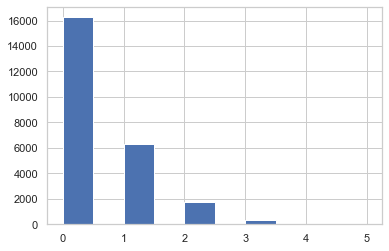

In [56]:
test = acum_3.reset_index()
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_MENORES_DE_U3M'].hist()

<AxesSubplot:>

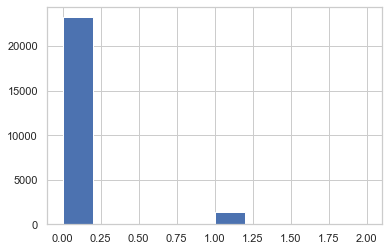

In [57]:
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_CAIDA_SEGUIDA_U3M'].hist()

<AxesSubplot:>

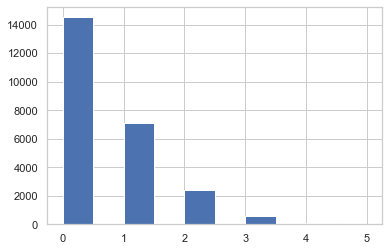

In [58]:
test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_IN_CAIDA_20PERCENT_MES_ANT'].hist()

<AxesSubplot:>

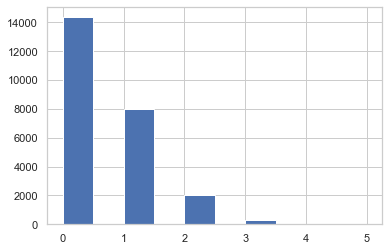

In [59]:

test[test['PERIODO'].astype(int) >= 202007]['TRX_TIPOS_CASH_APAGADOS_MES_ACTUAL'].hist()

In [60]:
del test
gc.collect()

22

In [61]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(26910, 415)

<AxesSubplot:>

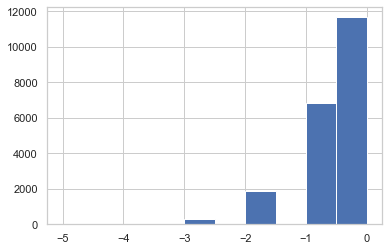

In [62]:
base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'] = base['TIPOS_CASHIN_ACTIVOS_MES_ACTUAL'] - base['TIPOS_CASH_IN_ACTIVOS_U3M']

base[base['PERIODO'].astype(int) >= 202007]['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].hist()

In [63]:
base['cut_0_TIENE_EL_MISMO_NRO_TIPOS_CAHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == 0).astype(int)
base['cut_1_DISMINUYO_1_TIPO_CASHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == -1).astype(int)
base['cut_2_DISMINUYO_2_TIPO_CASHIN_EN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _ == -2).astype(int)

In [64]:
base['cut_1_TIENE_DISMINUCION_1_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -1).astype(int)
base['cut_2_TIENE_DISMINUCION_2_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -2).astype(int)
base['cut_3_TIENE_DISMINUCION_3_O_MAS_TIPOS_CASH_IN_U3M'] = base['TRX_VARIACION_TIPOS_CASH_IN_U3M_MES_ACTUAL'].apply(lambda _: _<= -3).astype(int)

base['cut_0_NINGUN_INGRESO_CASHIN_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(lambda _: _ == 0).astype(int)
base['cut_1_TIENE_AL_MENOS_1_TIPO_CASHIN_ACTIVO_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(lambda _: _>= 1).astype(int)

In [65]:
base['cat_TIPOS_CASH_IN_ACTIVOS_U3M'] = base['TIPOS_CASH_IN_ACTIVOS_U3M'].apply(cut_2_2)

In [66]:
gc.collect()

88

#### ATRAS 12 MESES

In [67]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[1][:-2]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3089, 11)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6178, 11)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9267, 11)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12356, 11)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
///////////////////////////////

,COD_UNICO,COBRANZAS_,DEPOSITOS_,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGOS_RECIBIDOS_,POS_,RECAUDACION_,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1731....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1731....",202009
1,0000003392,"[3306476.38, 601537.18, 635073.36, 286165.18, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 20000.0, 34060.0, 687000.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[29412.3, 28000.0, 10000.0, 10000.0, 12000.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[308005.41, 222041.51, 1110354.36, 1889.25, 55...","[3643894.09, 851578.6900000001, 1755427.720000...",202009
2,0000006114,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[384271.87, 213445.73, 0.0, 25627.0, 3937.56, ...","[468060.0, 3142808.79, 6654678.19, 1067050.33,...","[46.32, 0.0, 46.36, 46.41, 73.89, 76.18, 79.4,...","[0.0, 19860.07, 6428.07, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[66207.19, 21274.13, 58200.37, 10791.75, 27549...","[918585.3799999999, 3397388.7199999997, 671935...",202009
3,0000006726,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[3976.0, 13901.48, 15429.77, 16390.47, 16147.9...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[17839.11, 23000.0, 29331.6, 80980.74, 113718....","[21815.11, 36901.479999999996, 44761.369999999...",202009
4,0000008045,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[136680.05, 174081.47, 289186.03, 108575.33, 1...","[6482290.0, 12707050.0, 10769115.0, 5290845.0,...","[4536075.38, 0.05, 960000.0, 0.0, 876768.53, 0...","[4415.8, 30283.23, 17236.82, 7036.91, 3114.85,...","[858449.48, 1061294.41, 3344978.25, 890278.82,...","[1790404.19, 1992414.94, 2770899.27, 2228555.9...","[2942904.1, 789329.55, 1109935.8, 1045119.74, ...","[16751219.0, 16754453.650000002, 19261351.17, ...",202009


In [68]:
def review_hist(lista, indice_hist, treshold=None):
    media_hist = np.max([lista[indice_hist -1], lista[indice_hist], lista[indice_hist + 1]])
    now = lista[-1]
  
    if media_hist == 0:
        return 0
  
    return  now / media_hist <= treshold if treshold else now / media_hist

for col in acum_3.columns:
    if col.upper() in ['COD_UNICO', 'PERIODO']:
        continue
        
    if '_aux' in col.lower():
        continue
    print(">> ", col)
    acum_3['_aux_TIENE_TRX_' + col + '_U12M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    #acum_3['_aux_TRX_MENOR_' + col + '_DE_U12M'] = acum_3[[col, '_aux_TIENE_TRX_' + col + '_U12M']].apply(lambda _: np.min(_[0][:]) == _[0][-1] and _[1] == 1).astype(int)
    acum_3['_aux_NO_TIENE_TRX_' + col + '_HACE_12M'] = acum_3[col].apply(lambda _: 1 if sum(_) < 100 else 0)
    acum_3['_aux_TRX_MONTO_' + col + '_U11M'] = acum_3[col].apply(lambda _: _[-11])
    acum_3['_aux_TRX_MONTO_' + col + '_U1M'] = acum_3[col].apply(lambda _: _[-1])
    acum_3['_aux_TRX_MONTO_' + col + '_U6M'] = acum_3[col].apply(lambda _: _[-6])
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_U11M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.9)).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_U11M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.8)).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_U11M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.7)).astype(int)
    acum_3['_aux_TRX_CAIDA_40PERCENT_' + col + '_U11M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.6)).astype(int)
    acum_3['_aux_TRX_CAIDA_50PERCENT_' + col + '_U11M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.5)).astype(int)
    
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.9)).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.8)).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.7)).astype(int)
    acum_3['_aux_TRX_CAIDA_40PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.6)).astype(int)
    acum_3['_aux_TRX_CAIDA_50PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.5)).astype(int)

for col in [_ for _ in acum_3.columns if 'NO_TABLERO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_aux' in col ] + ['COD_UNICO', 'PERIODO']]
acum_3.head()

>>  COBRANZAS_
>>  DEPOSITOS_
>>  OPERACIONES_MESA_
>>  OTROS_NO_TABLERO
>>  PAGOS_RECIBIDOS_
>>  POS_
>>  RECAUDACION_
>>  TRANSFERENCIAS_
>>  TOTAL


,_aux_TIENE_TRX_COBRANZAS__U12M,_aux_NO_TIENE_TRX_COBRANZAS__HACE_12M,_aux_TRX_MONTO_COBRANZAS__U11M,_aux_TRX_MONTO_COBRANZAS__U1M,_aux_TRX_MONTO_COBRANZAS__U6M,_aux_TRX_CAIDA_10PERCENT_COBRANZAS__U11M,_aux_TRX_CAIDA_20PERCENT_COBRANZAS__U11M,_aux_TRX_CAIDA_30PERCENT_COBRANZAS__U11M,_aux_TRX_CAIDA_40PERCENT_COBRANZAS__U11M,_aux_TRX_CAIDA_50PERCENT_COBRANZAS__U11M,...,_aux_TRX_CAIDA_30PERCENT_TOTAL_U11M,_aux_TRX_CAIDA_40PERCENT_TOTAL_U11M,_aux_TRX_CAIDA_50PERCENT_TOTAL_U11M,_aux_TRX_CAIDA_10PERCENT_TOTAL_U6M,_aux_TRX_CAIDA_20PERCENT_TOTAL_U6M,_aux_TRX_CAIDA_30PERCENT_TOTAL_U6M,_aux_TRX_CAIDA_40PERCENT_TOTAL_U6M,_aux_TRX_CAIDA_50PERCENT_TOTAL_U6M,COD_UNICO,PERIODO
0,0,1,0.00,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000002469,202009
1,1,0,601537.18,0.0,0.0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0000003392,202009
2,0,1,0.00,0.0,0.0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0000006114,202009
3,0,1,0.00,0.0,0.0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0000006726,202009
4,0,1,0.00,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000008045,202009


In [69]:
print(base.shape)
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)

del acum_3
base.shape

(26910, 425)


(26910, 545)

#### PIVOTEO POR CASH OUT

In [70]:
del pivoteo_grupo

In [71]:
pivoteo = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH OUT'], 
    values='VOLUMEN_SOLES', index=['COD_UNICO'], columns=['GRUPO_N1', 'KPI', 'PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['GRUPO_N1', 'KPI', 'PERIODO', 'COD_UNICO', 'VOLUMEN_SOLES']

pivoteo = pd.pivot_table(
    pivoteo, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['GRUPO_N1', 'KPI'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = ['_'.join(list(col)).replace(' ', '_') for col in pivoteo]
pivoteo['TOTAL'] = pivoteo.sum(axis=1)

print(pivoteo.shape)
pivoteo.head(2)

(84645, 7)


OPERACIONES_MESA_  OTROS_NO_TABLERO  PAGO_DE_SERVICIOS_  \
COD_UNICO  PERIODO                                                            
0000002469 201904                 0.0            637.88                 0.0   
           201905                 0.0          15949.25                 0.0   

                    PAGOS_MASIVOS_  TRANFERENCIA_EXTERIOR_NO_TABLERO  \
COD_UNICO  PERIODO                                                     
0000002469 201904              0.0                               0.0   
           201905              0.0                               0.0   

                    TRANSFERENCIAS_      TOTAL  
COD_UNICO  PERIODO                              
0000002469 201904         494016.06  494653.94  
           201905         150004.03  165953.28

In [72]:
pivoteo_grupo = pivoteo.reset_index()
pivoteo_grupo.head(3)

,COD_UNICO,PERIODO,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANFERENCIA_EXTERIOR_NO_TABLERO,TRANSFERENCIAS_,TOTAL
0,0000002469,201904,0.0,637.88,0.0,0.0,0.0,494016.06,494653.94
1,0000002469,201905,0.0,15949.25,0.0,0.0,0.0,150004.03,165953.28
2,0000002469,201906,0.0,29086.38,0.0,0.0,0.0,466512.13,495598.51


In [73]:
del pivoteo['TOTAL']
pivoteo.columns = [('TIENE_TRX_' + col).replace(' ', '_') + '_CASH_OUT_MES_ACTUAL' for col in pivoteo.columns]

for col in pivoteo.columns:
    pivoteo[col] = pivoteo[col].apply(lambda _: 1 if _  > 100 else 0 )

pivoteo['TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL'] = pivoteo[[_ for _ in pivoteo.columns if 'TIENE' in _]].sum(axis=1)
pivoteo = pivoteo.reset_index()
display(pivoteo.head(3))

,COD_UNICO,PERIODO,TIENE_TRX_OPERACIONES_MESA__CASH_OUT_MES_ACTUAL,TIENE_TRX_OTROS_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGO_DE_SERVICIOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_PAGOS_MASIVOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANFERENCIA_EXTERIOR_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANSFERENCIAS__CASH_OUT_MES_ACTUAL,TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL
0,0000002469,201904,0,1,0,0,0,1,2
1,0000002469,201905,0,1,0,0,0,1,2
2,0000002469,201906,0,1,0,0,0,1,2


In [74]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo
base.shape

(26910, 552)

In [75]:
contador = 1
dd = {k: list for k in pivoteo_grupo.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]
    _3m_tipos = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).sum()
    _3m_tipos.columns = ['suma' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_tipos.columns]
    #_3m_actual = 
    #print(_3m_actual.head())
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    _3m_tipos = _3m_tipos.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_tipos['PERIODO'] = tramo[0]
    if contador == 1:
        acum_3 = _3m_actual.copy()
        sum_3 = _3m_tipos.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        sum_3 = pd.concat(
            [sum_3, _3m_tipos], axis=0
        )
        
    print(acum_3.shape, sum_3.shape)
    contador +=1
    del _3m_actual
    del _3m_tipos

202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3135, 9) (3135, 9)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6270, 9) (6270, 9)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9405, 9) (9405, 9)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12540, 9) (12540, 9)
202101 [202011, 202012, 202101]
////////////////////////////////////////////////////////////////////////////////////////////////////
(15675, 9) (15675, 9)
202102 [202012, 202101, 202102]
////////////////////////////////////////////////////////////////////////////////////////////////////
(18810, 9) (18810, 9)
202103 [202101, 202102, 202103]
////////////////////////////////////////////

In [76]:
sum_3.head()

,COD_UNICO,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANFERENCIA_EXTERIOR_NO_TABLERO,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,4937000.00,2611.55,0.00,0.00,0.0,9470738.29,14410349.84,202009
1,0000003392,3840100.00,2770.86,0.00,120261.95,0.0,178131.85,4141264.66,202009
2,0000006114,6717000.00,699.97,11952.95,74152.57,0.0,178508.84,6982314.33,202009
3,0000006726,0.00,6047.26,92289.00,8547.50,0.0,140046.86,246930.62,202009
4,0000008045,1772221.18,11952.15,0.00,9148072.19,0.0,23129554.39,34061799.91,202009


In [77]:
sum_3 = sum_3.set_index(['COD_UNICO', 'PERIODO'])
for col in sum_3.columns:
    sum_3[col] = sum_3[col] / sum_3['TOTAL']
    
#del sum_3['TOTAL']

sum_3.columns = [('TRX_' + col).replace(' ', '_') + '_CASH_OUT_PERCENT_U3M' for col in sum_3.columns]
sum_3 = sum_3.reset_index()
sum_3.head(3)

,COD_UNICO,PERIODO,TRX_OPERACIONES_MESA__CASH_OUT_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_PAGO_DE_SERVICIOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS__CASH_OUT_PERCENT_U3M,TRX_TRANFERENCIA_EXTERIOR_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_OUT_PERCENT_U3M,TRX_TOTAL_CASH_OUT_PERCENT_U3M
0,0000002469,202009,0.342601,0.000181,0.000000,0.00000,0.0,0.657218,1.0
1,0000003392,202009,0.927277,0.000669,0.000000,0.02904,0.0,0.043014,1.0
2,0000006114,202009,0.962002,0.000100,0.001712,0.01062,0.0,0.025566,1.0


In [78]:
del sum_3['TRX_TOTAL_CASH_OUT_PERCENT_U3M']
sum_3['PERIODO'] = sum_3['PERIODO'].astype(str)
base = base.merge(
    sum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del sum_3
base.head(2)

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_TRX_PAGOS_MASIVOS__CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANFERENCIA_EXTERIOR_NO_TABLERO_CASH_OUT_MES_ACTUAL,TIENE_TRX_TRANSFERENCIAS__CASH_OUT_MES_ACTUAL,TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL,TRX_OPERACIONES_MESA__CASH_OUT_PERCENT_U3M,TRX_OTROS_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_PAGO_DE_SERVICIOS__CASH_OUT_PERCENT_U3M,TRX_PAGOS_MASIVOS__CASH_OUT_PERCENT_U3M,TRX_TRANFERENCIA_EXTERIOR_NO_TABLERO_CASH_OUT_PERCENT_U3M,TRX_TRANSFERENCIAS__CASH_OUT_PERCENT_U3M
0,202008,0003041431,20100132916,1,CERAMICOS PERUANOS,0,1,0,0,0,...,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0003142478,20100013747,1,BIOCON DEL PERU,1,0,0,0,0,...,1.0,0.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
acum_3.head()

,COD_UNICO,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANFERENCIA_EXTERIOR_NO_TABLERO,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,"[0.0, 4937000.0, 0.0]","[704.81, 1519.75, 386.99]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 9470738.29, 0.0]","[704.81, 14409258.04, 386.99]",202009
1,0000003392,"[0.0, 1243250.0, 2596850.0]","[690.28, 897.6, 1182.98]","[0.0, 0.0, 0.0]","[53527.05, 42229.96, 24504.94]","[0.0, 0.0, 0.0]","[177677.05, 454.8, 0.0]","[231894.38, 1286832.36, 2622537.92]",202009
2,0000006114,"[3247000.0, 0.0, 3470000.0]","[233.93, 228.94, 237.1]","[8596.2, 3231.6, 125.15]","[35098.33, 19322.28, 19731.96]","[0.0, 0.0, 0.0]","[9668.7, 18996.7, 149843.44]","[3300597.1600000006, 41779.520000000004, 36399...",202009
3,0000006726,"[0.0, 0.0, 0.0]","[310.06, 5332.68, 404.52]","[5007.0, 85680.0, 1602.0]","[5060.5, 2537.0, 950.0]","[0.0, 0.0, 0.0]","[62010.16, 12003.45, 66033.25]","[72387.72, 105553.12999999999, 68989.77]",202009
4,0000008045,"[876250.0, 681050.0, 214921.18]","[3815.23, 3996.96, 4139.96]","[0.0, 0.0, 0.0]","[1766546.21, 2925161.74, 4456364.24]","[0.0, 0.0, 0.0]","[5273103.04, 11349949.79, 6506501.56]","[7919714.48, 14960158.489999998, 11181926.94]",202009


In [80]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

for col in acum_3.columns:
    acum_3['TRX_CASHOUT_' + col + '_1UM_MASIVO'] = acum_3[col].apply(lambda _: _[-1])
    acum_3['TRX_CASHOUT_' + col + '_2UM_MASIVO'] = acum_3[col].apply(lambda _: _[-2])
    acum_3['TRX_CASHOUT_' + col + '_3UM_MASIVO'] = acum_3[col].apply(lambda _: _[-3])
    acum_3['_aux_TIENE_TRX_' + col + '_CASH_OUT_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['_aux_TRX_CAIDA_SEGUIDA_' + col + '_U3M_CASH_OUT'] = acum_3[col].apply(lambda_caida_seguida_u3m).astype(int)
    acum_3['_aux_TRX_SUBIDA_SEGUIDA_' + col + '_U3M_CASH_OUT'] = acum_3[col].apply(lambda_subida_seguida_u3m).astype(int)   
    acum_3['_aux_TRX_MENOR_' + col + '_DE_U3M_CASH_OUT'] = acum_3[col].apply(lambda_min_u3m).astype(int) 
    acum_3['_aux_TRX_MAYOR_' + col + '_DE_U3M_CASH_OUT'] = acum_3[col].apply(lambda_max_u3m).astype(int)
    
    acum_3['_aux_TRX_CAIDA_5PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_5_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
    acum_3['_aux_TRX_CAIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_10_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_20_percent).astype(int)
    acum_3['_aux_TRX_SUBIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_30_percent).astype(int)
    
    acum_3['MTO_CASHOUT_' + col + '_MES_PAS'] = acum_3[col].apply(lambda _: _[-2])
    acum_3['MTO_CASHOUT_' + col + '_MES_ACT'] = acum_3[col].apply(lambda _: _[-1])
    
    acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'] = acum_3[col].apply(searhc_no_zero).astype(int)
    acum_3['TIENE_2_MESES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ == 2).astype(int)
    acum_3['TIENE_MAS_DE_2_MESES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ > 2).astype(int)
    acum_3['TIENE_MAS_DE_1_MES_SIN_' + col + '_CASHOUT'] = acum_3['NRO_MESES_SIN_' + col + '_CASHOUT'].apply(lambda _: _ > 1).astype(int)
    acum_3['_aux_TIENE_APAGADO_' + col + '_CASHOUT'] = acum_3[col].apply(lambda _: _[-1] < 100 and (_[-2] > 100 or _[-3] > 100)).astype(int)
    
    if 'TOTAL' in col.upper():
        acum_3['TRX_NO_' + col + '_CASH_OUT_ESTE_MES'] = acum_3[col].apply(lambda_no_hay).astype(int)
        acum_3['TRX_NO_' + col + '_CASH_OUT_U2M'] = acum_3[col].apply(lambda_no_hay_u2m).astype(int)
        acum_3['TRX_NO_' + col + '_CASH_OUT_U3M'] = acum_3[col].apply(lambda_no_hay_u3m).astype(int)
        acum_3['TRX_CAIDA_5PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_5_percent).astype(int)
        acum_3['TRX_CAIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_10_percent).astype(int)
        acum_3['TRX_CAIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_20_percent).astype(int)
        acum_3['TRX_CAIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_30_percent).astype(int)
        acum_3['TRX_CAIDA_40PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_caida_40_percent).astype(int)
        acum_3['TRX_SUBIDA_40PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_40_percent).astype(int)
        acum_3['TRX_SUBIDA_30PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_30_percent).astype(int)
        acum_3['TRX_SUBIDA_20PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_20_percent).astype(int)
        acum_3['TRX_SUBIDA_10PERCENT_' + col + '_CASH_OUT_MES_ANT'] = acum_3[col].apply(lambda_subida_10_percent).astype(int)
    del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_CASH_OUT' in col or '_CASHOUT' in col]]
acum_3.tail()

,,TRX_CASHOUT_OPERACIONES_MESA__1UM_MASIVO,TRX_CASHOUT_OPERACIONES_MESA__2UM_MASIVO,TRX_CASHOUT_OPERACIONES_MESA__3UM_MASIVO,_aux_TIENE_TRX_OPERACIONES_MESA__CASH_OUT_U3M,_aux_TRX_CAIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_SUBIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_MENOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_MAYOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_CAIDA_5PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,...,TRX_NO_TOTAL_CASH_OUT_U3M,TRX_CAIDA_5PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_10PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_20PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_30PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_CAIDA_40PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_40PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_30PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_20PERCENT_TOTAL_CASH_OUT_MES_ANT,TRX_SUBIDA_10PERCENT_TOTAL_CASH_OUT_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017767505,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017819154,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0017828877,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0017898907,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0017909414,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [81]:
acum_3['TRX_TIPOS_CASH_OUT_MENORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_MAYORES_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_U3M'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_TRX_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_10PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_20PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_CAIDA_30PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_10PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_20PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_30PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_SUBIDA_40PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TRX_SUBIDA_40PERCENT_' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT'] = acum_3[[col for col in acum_3.columns if '_aux_TIENE_APAGADO_' in col and 'TOTAL' not in col]].sum(axis=1)

acum_3.tail()

,,TRX_CASHOUT_OPERACIONES_MESA__1UM_MASIVO,TRX_CASHOUT_OPERACIONES_MESA__2UM_MASIVO,TRX_CASHOUT_OPERACIONES_MESA__3UM_MASIVO,_aux_TIENE_TRX_OPERACIONES_MESA__CASH_OUT_U3M,_aux_TRX_CAIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_SUBIDA_SEGUIDA_OPERACIONES_MESA__U3M_CASH_OUT,_aux_TRX_MENOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_MAYOR_OPERACIONES_MESA__DE_U3M_CASH_OUT,_aux_TRX_CAIDA_5PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,_aux_TRX_CAIDA_10PERCENT_OPERACIONES_MESA__CASH_OUT_MES_ANT,...,TRX_TIPOS_CASH_OUT_SUBIDA_SEGUIDA_DE_U3M,TRX_TIPOS_CASH_OUT_U3M,TRX_TIPOS_CASH_OUT_CAIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_CAIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_CAIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_10PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_20PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_30PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_SUBIDA_40PERCENT_MES_ANT,TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT
COD_UNICO,PERIODO,,,,,,,,,,,,,,,,,,,,,
0017767505,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,1
0017819154,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
0017828877,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.0,0
0017898907,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
0017909414,202104,0.0,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [82]:
#acum_3['TRX_TIPOS_CASH_OUT_APAGADO_MES_ANT'].value_counts()

In [83]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(26910, 738)

In [84]:
base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'] =  base['TIPOS_CASHOUT_ACTIVOS_MES_ACTUAL'] - base['TRX_TIPOS_CASH_OUT_U3M']

<AxesSubplot:>

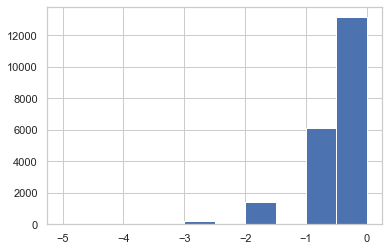

In [85]:
base[base['PERIODO'].astype(int) >= 202007]['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].hist()

In [86]:
base['cut_0_NO_DISMINUYO_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == 0).astype(int)
base['cut_1_DISMINUYO_1_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == -1).astype(int)
base['cut_2_DISMINUYO_1_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ == -2).astype(int)
base['TIENE_DISMINUCION_1_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -1).astype(int)
base['TIENE_DISMINUCION_2_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -2).astype(int)
base['TIENE_DISMINUCION_3_O_MAS_TIPOS_CASH_OUT_U3M'] = base['TRX_VARIACION_TIPOS_CASH_OUT_U3M_MES_ACTUAL'].apply(lambda _: _ <= -3).astype(int)

In [87]:
contador = 1
dicc = {col: list for col in pivoteo_grupo.columns if col.upper() not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = tramo[1][:-2]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo_grupo[pivoteo_grupo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape)
    contador += 1
    del _3m_actual
acum_3.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3135, 9)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6270, 9)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9405, 9)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12540, 9)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
///////////////////////////////////

,COD_UNICO,OPERACIONES_MESA_,OTROS_NO_TABLERO,PAGO_DE_SERVICIOS_,PAGOS_MASIVOS_,TRANFERENCIA_EXTERIOR_NO_TABLERO,TRANSFERENCIAS_,TOTAL,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1055.91, 702.61, 701.46, 702.24, 703.46, 703....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1055.91, 702.61, 701.46, 702.24, 703.46, 703....",202009
1,0000003392,"[1205070.0, 1184550.0, 979640.0, 1174870.0, 11...","[5074.61, 2329.08, 2861.29, 1042.94, 1258.91, ...","[0.0, 4595.83, 0.0, 0.0, 0.0, 0.0, 0.0, 7468.0...","[29438.96, 25301.17, 51984.34, 108472.79, 3504...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[13729.36, 25342.59, 202926.82, 160668.91, 185...","[1253312.9300000002, 1242118.6700000002, 12374...",202009
2,0000006114,"[3288825.0, 3573330.0, 3433520.0, 2898373.33, ...","[11554.82, 240.61, 9246.36, 7585.43, 240.88, 1...","[9010.98, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 250.0,...","[58630.25, 93039.53, 113327.78, 59550.15, 5401...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5091.5, 0.0, 100718.89, 146159.36, 2881.11, 6...","[3373112.55, 3666610.1399999997, 3656813.03, 3...",202009
3,0000006726,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[242.47, 248.79, 244.1, 246.17, 249.96, 232.26...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[930.0, 962.0, 2072.0, 3108.0, 1142.0, 950.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[5933.26, 7008.18, 16663.28, 66068.88, 112617....","[7105.7300000000005, 8218.970000000001, 18979....",202009
4,0000008045,"[3496020.0, 7883545.0, 0.0, 8693885.0, 8166299...","[1113567.79, 3800.0, 6925.2, 3334.59, 3146.34,...","[11681.0, 1365.34, 8624.0, 0.0, 0.0, 0.0, 0.0,...","[1605774.21, 3359849.47, 3378773.23, 3341130.6...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[7167813.39, 4512784.24, 6263512.72, 3634830.6...","[13394856.39, 15761344.05, 9657835.15, 1567318...",202009


In [88]:
def review_hist(lista, indice_hist, treshold=None):
    media_hist = np.max([lista[indice_hist -1], lista[indice_hist], lista[indice_hist + 1]])
    now = lista[-1]
  
    if media_hist == 0:
        return 0
  
    return  now / media_hist <= treshold if treshold else now / media_hist

for col in acum_3.columns:
    if col.upper() in ['COD_UNICO', 'PERIODO']:
        continue
        
    if '_aux' in col.lower():
        continue
    print(">> ", col)
    acum_3['_aux_MONTO_CASHOUT_' + col + '_U1M'] = acum_3[col].apply(lambda _: _[-1])
    acum_3['_aux_MONTO_CASHOUT_' + col + '_U6M'] = acum_3[col].apply(lambda _: _[-6])
    acum_3['_aux_MONTO_CASHOUT_' + col + '_U11M'] = acum_3[col].apply(lambda _: _[-11])
    acum_3['_aux_TIENE_CASHOUT_' + col + '_U12M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    #acum_3['_aux_TRX_MENOR_' + col + '_DE_U12M'] = acum_3[[col, '_aux_TIENE_TRX_' + col + '_U12M']].apply(lambda _: np.min(_[0][:]) == _[0][-1] and _[1] == 1).astype(int)
    acum_3['_aux_NO_TIENE_CASHOUT_' + col + '_HACE_12M'] = acum_3[col].apply(lambda _: 1 if sum(_) < 100 else 0)
    
    acum_3['_aux_CASHOUT_CAIDA_10PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.9)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_20PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.8)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_30PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.7)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_40PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.6)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_50PERCENT_' + col + '_U12M'] = acum_3[col].apply(lambda _: review_hist(_, -11, 0.5)).astype(int)
    
    acum_3['_aux_CASHOUT_CAIDA_10PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.9)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_20PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.8)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_30PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.7)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_40PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.6)).astype(int)
    acum_3['_aux_CASHOUT_CAIDA_50PERCENT_' + col + '_U6M'] = acum_3[col].apply(lambda _: review_hist(_, -6, 0.5)).astype(int)

for col in [_ for _ in acum_3.columns if 'NO_TABLERO' in _]:
    if col in acum_3.columns:
        del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if '_aux' in col ] + ['COD_UNICO', 'PERIODO']]
acum_3.head()

>>  OPERACIONES_MESA_
>>  OTROS_NO_TABLERO
>>  PAGO_DE_SERVICIOS_
>>  PAGOS_MASIVOS_
>>  TRANFERENCIA_EXTERIOR_NO_TABLERO
>>  TRANSFERENCIAS_
>>  TOTAL


,_aux_MONTO_CASHOUT_OPERACIONES_MESA__U1M,_aux_MONTO_CASHOUT_OPERACIONES_MESA__U6M,_aux_MONTO_CASHOUT_OPERACIONES_MESA__U11M,_aux_TIENE_CASHOUT_OPERACIONES_MESA__U12M,_aux_NO_TIENE_CASHOUT_OPERACIONES_MESA__HACE_12M,_aux_CASHOUT_CAIDA_10PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_20PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_30PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_40PERCENT_OPERACIONES_MESA__U12M,_aux_CASHOUT_CAIDA_50PERCENT_OPERACIONES_MESA__U12M,...,_aux_CASHOUT_CAIDA_30PERCENT_TOTAL_U12M,_aux_CASHOUT_CAIDA_40PERCENT_TOTAL_U12M,_aux_CASHOUT_CAIDA_50PERCENT_TOTAL_U12M,_aux_CASHOUT_CAIDA_10PERCENT_TOTAL_U6M,_aux_CASHOUT_CAIDA_20PERCENT_TOTAL_U6M,_aux_CASHOUT_CAIDA_30PERCENT_TOTAL_U6M,_aux_CASHOUT_CAIDA_40PERCENT_TOTAL_U6M,_aux_CASHOUT_CAIDA_50PERCENT_TOTAL_U6M,COD_UNICO,PERIODO
0,0.00,0.0,0.0,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,0000002469,202009
1,2596850.00,0.0,1184550.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000003392,202009
2,3470000.00,0.0,3573330.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0000006114,202009
3,0.00,0.0,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0000006726,202009
4,214921.18,0.0,7883545.0,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0000008045,202009


In [89]:
print(base.shape)
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
base = base.merge(
    acum_3.reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
base.shape

(26910, 745)


(26910, 821)

### RAZON ENTRE CASH IN - CASH OUT

In [90]:
pivoteo = pd.pivot_table(
    transac_cliente, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [col.replace(' ', '_') + '_TOTAL_MES' for col in pivoteo.columns]

pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'] = pivoteo[['CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(
    lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
pivoteo = pivoteo.reset_index()

pivoteo.head(3)

,COD_UNICO,PERIODO,CASH_IN_TOTAL_MES,CASH_OUT_TOTAL_MES,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT
0,0000002469,201904,342654.51,494653.94,0.692716
1,0000002469,201905,163519.20,165953.28,0.985333
2,0000002469,201906,521756.87,495598.51,1.052781


In [91]:
pivoteo['cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ > 1 and _ <= 1.1).astype(int)
pivoteo['cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ > 1 and _ <= 2.1).astype(int)
pivoteo['cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.9).astype(int)
pivoteo['cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.8).astype(int)
pivoteo['cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.7).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.6).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.5).astype(int)
pivoteo['cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS'] = pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: _ < 0.4).astype(int)

In [92]:
def get_desc_cash(lista):
    return """Periodo {}:
        Ingresos S/. {:,.2f}
        Egresos S/. {:,.2f}
    """.format(lista[0], lista[1], lista[2])


pivoteo['DIFF_CASHIN_OVER_CASHOUT'] = pivoteo['CASH_IN_TOTAL_MES'] - pivoteo['CASH_OUT_TOTAL_MES']
pivoteo["DESCRIPTION_CASHIN_CASHOUT"] = pivoteo[['PERIODO','CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(lambda _: get_desc_cash(_), axis=1)
pivoteo.head(3)

,COD_UNICO,PERIODO,CASH_IN_TOTAL_MES,CASH_OUT_TOTAL_MES,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS,cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS,cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS,cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS,cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT,DESCRIPTION_CASHIN_CASHOUT
0,0000002469,201904,342654.51,494653.94,0.692716,0,0,1,1,1,0,0,0,-151999.43,"Periodo 201904:\n Ingresos S/. 342,654...."
1,0000002469,201905,163519.20,165953.28,0.985333,0,0,0,0,0,0,0,0,-2434.08,"Periodo 201905:\n Ingresos S/. 163,519...."
2,0000002469,201906,521756.87,495598.51,1.052781,1,1,0,0,0,0,0,0,26158.36,"Periodo 201906:\n Ingresos S/. 521,756...."


In [93]:
base = base.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
#del pivoteo
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,cut_01_INGRESO_SUPERA_EGGRESO_SOLO_EN_10PERCENT_O_MENOS,cut_02_INGRESO_SUPERA_EGGRESO_SOLO_EN_20PERCENT_O_MENOS,cut_09_EGRESO_SUPERA_INGRESO_EN_10PERCENT_O_MAS,cut_08_EGRESO_SUPERA_INGRESO_EN_20PERCENT_O_MAS,cut_07_EGRESO_SUPERA_INGRESO_EN_30PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_40PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_50PERCENT_O_MAS,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT,DESCRIPTION_CASHIN_CASHOUT
0,202008,0003041431,20100132916,1,CERAMICOS PERUANOS,0,1,0,0,0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-169910.87,"Periodo 202008:\n Ingresos S/. 79,855.6..."
1,202008,0003142478,20100013747,1,BIOCON DEL PERU,1,0,0,0,0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-2159702.97,"Periodo 202008:\n Ingresos S/. 1,418,78..."
2,202008,0003107943,20114022838,0,ARENERA JAEN,1,1,1,0,0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-1298219.85,"Periodo 202008:\n Ingresos S/. 635,369...."
3,202008,0003084548,20211040352,1,QUIMICOS GOICOCHEA,0,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92941.90,"Periodo 202008:\n Ingresos S/. 134,458...."
4,202008,0002746782,20109015611,0,OFTALMOLOGOS CONTRERAS CAMPOS,0,0,0,0,1,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-278799.60,"Periodo 202008:\n Ingresos S/. 203,184...."


In [94]:
pivoteo.shape

(73608, 15)

In [95]:
pivoteo = pd.pivot_table(
    pivoteo, 
    values='DIFF_CASHIN_OVER_CASHOUT', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'DIFF_CASH_IN_CASH_OUT']

In [96]:
pivoteo.head()

,PERIODO,COD_UNICO,DIFF_CASH_IN_CASH_OUT
0,201904,0000002469,-151999.43
1,201904,0000003392,1631369.77
2,201904,0000006114,95642.10
3,201904,0000006726,42029.20
4,201904,0000008045,3671112.93


In [97]:
contador = 1
dicc = {
    'DIFF_CASH_IN_CASH_OUT': list
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape, )
    contador +=1
    del _3m_actual
acum_3.head()

202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3139, 3)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6278, 3)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9417, 3)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12556, 3)
202101 [202011, 202012, 202101]
////////////////////////////////////////////////////////////////////////////////////////////////////
(15695, 3)
202102 [202012, 202101, 202102]
////////////////////////////////////////////////////////////////////////////////////////////////////
(18834, 3)
202103 [202101, 202102, 202103]
////////////////////////////////////////////////////////////////////////////////////////////////////
(21973

,COD_UNICO,DIFF_CASH_IN_CASH_OUT,PERIODO
0,0000002469,"[3456936.93, -8054624.699999998, 358013.01]",202009
1,0000003392,"[342025.43000000005, 80194.65999999992, 990729...",202009
2,0000006114,"[-418550.0200000005, 3272790.2199999997, -3632...",202009
3,0000006726,"[-49134.31, -31688.449999999997, -29587.300000...",202009
4,0000008045,"[6606266.43, 3420513.750000002, 2535921.34]",202009


In [98]:
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if _[0] < 0 and  _[1] < 0 and  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if _[1] < 0 and  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda _: 1 if  _[2] < 0 else 0)
acum_3['TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M'] = acum_3['DIFF_CASH_IN_CASH_OUT'].apply(lambda_min_u3m).astype(int)
del acum_3['DIFF_CASH_IN_CASH_OUT']
acum_3.head(20)

,COD_UNICO,PERIODO,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES,TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M
0,0000002469,202009,0,0,0,0
1,0000003392,202009,0,0,0,0
2,0000006114,202009,0,0,1,0
3,0000006726,202009,1,1,1,0
4,0000008045,202009,0,0,0,1
5,0000008318,202009,1,1,1,0
6,0000020628,202009,0,1,1,0
7,0000037374,202009,1,1,1,0
8,0000038026,202009,0,1,1,0
9,0000038570,202009,0,0,1,0


In [99]:
acum_3.shape, base.shape, acum_3.groupby(by=['PERIODO', 'COD_UNICO']).size().shape,  base.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((25112, 6), (26910, 834), (25112,), (26910,))

In [100]:
acum_3['PERIODO'] = acum_3['PERIODO'] .astype(str)
base = base.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)

In [101]:
pivoteo.columns

Index(['PERIODO', 'COD_UNICO', 'DIFF_CASH_IN_CASH_OUT'], dtype='object')

### JUGANDO CON LA RZON ENTRE INGRESOS TOTAL Y EGRESOS TOTOALES

In [102]:
pivoteo = pd.pivot_table(
    transac_cliente, 
    values='VOLUMEN_SOLES', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [col.replace(' ', '_') + '_TOTAL_MES' for col in pivoteo.columns]

pivoteo['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'] = pivoteo[['CASH_IN_TOTAL_MES', 'CASH_OUT_TOTAL_MES']].apply(
    lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
pivoteo = pivoteo.reset_index()[['COD_UNICO', 'PERIODO', 'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT']]


pivoteo = pd.pivot_table(
    pivoteo, 
    values='PERCENT_MONTO_CASH_IN_OVER_CASH_OUT', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index()
pivoteo.columns = ['PERIODO', 'COD_UNICO', 'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT']

pivoteo.head(3)

,PERIODO,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT
0,201904,0000002469,0.692716
1,201904,0000003392,2.138814
2,201904,0000006114,1.019986


In [103]:
contador = 1
dicc = {
    'PERCENT_MONTO_CASH_IN_OVER_CASH_OUT': list
}

for tramo in tramos:
    _3_meses_previos = tramo[3]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = pivoteo[pivoteo['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dicc)
    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]
    
    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
    
    print(acum_3.shape, )
    contador +=1
    del _3m_actual
acum_3.head()

202009 [202007, 202008, 202009]
////////////////////////////////////////////////////////////////////////////////////////////////////
(3139, 3)
202010 [202008, 202009, 202010]
////////////////////////////////////////////////////////////////////////////////////////////////////
(6278, 3)
202011 [202009, 202010, 202011]
////////////////////////////////////////////////////////////////////////////////////////////////////
(9417, 3)
202012 [202010, 202011, 202012]
////////////////////////////////////////////////////////////////////////////////////////////////////
(12556, 3)
202101 [202011, 202012, 202101]
////////////////////////////////////////////////////////////////////////////////////////////////////
(15695, 3)
202102 [202012, 202101, 202102]
////////////////////////////////////////////////////////////////////////////////////////////////////
(18834, 3)
202103 [202101, 202102, 202103]
////////////////////////////////////////////////////////////////////////////////////////////////////
(21973

,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,PERIODO
0,0000002469,"[4905.778493494701, 0.44101044775238135, 926.1...",202009
1,0000003392,"[2.4749190126987988, 1.062319430636637, 1.3777...",202009
2,0000006114,"[0.8731896079071945, 79.33479704888903, 0.0021...",202009
3,0000006726,"[0.3212341817092733, 0.6997867329940856, 0.571...",202009
4,0000008045,"[1.8341546209377992, 1.2286415449599961, 1.226...",202009


In [104]:
acum_3.head(5)

,COD_UNICO,PERCENT_MONTO_CASH_IN_OVER_CASH_OUT,PERIODO
0,0000002469,"[4905.778493494701, 0.44101044775238135, 926.1...",202009
1,0000003392,"[2.4749190126987988, 1.062319430636637, 1.3777...",202009
2,0000006114,"[0.8731896079071945, 79.33479704888903, 0.0021...",202009
3,0000006726,"[0.3212341817092733, 0.6997867329940856, 0.571...",202009
4,0000008045,"[1.8341546209377992, 1.2286415449599961, 1.226...",202009


In [105]:
def menor_a_u3m(listado, treshold):
    return int(all([_ != 0 and _ <= treshold for _ in listado]))

def menor_a_u3m_or_null(listado, treshold):
    return int(all([_ == 0 or _ <= treshold for _ in listado]))

acum_3['cut_110_INGRESO_SUPERA_EN_SOLO_1OPERCENT_EGRESOS_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 1.1))
acum_3['cut_120_INGRESO_SUPERA_EN_SOLO_1OPERCENT_EGRESOS_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 1.2))
acum_3['cut_099_EGRESO_SUPERA_INGRESOS_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.99))
acum_3['cut_09_EGRESO_SUPERA_INGRESOS_10PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.9))
acum_3['cut_08_EGRESO_SUPERA_INGRESOS_20PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.8))
acum_3['cut_07_EGRESO_SUPERA_INGRESOS_30PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.7))
acum_3['cut_06_EGRESO_SUPERA_INGRESOS_40PERCENT_SEGUIDO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda _: menor_a_u3m(_, 0.6))
acum_3['TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(lambda_caida_seguida_u3m).astype(int)
 

acum_3['cut_099_EGRESO_SUPERA_INGRESOS_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.99))
acum_3['cut_09_EGRESO_SUPERA_INGRESOS_10PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.9))
acum_3['cut_08_EGRESO_SUPERA_INGRESOS_20PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.8))
acum_3['cut_07_EGRESO_SUPERA_INGRESOS_30PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.7))
acum_3['cut_06_EGRESO_SUPERA_INGRESOS_40PERCENT_SEGUIDO_O_NO_CASHIN_U3M'] = acum_3['PERCENT_MONTO_CASH_IN_OVER_CASH_OUT'].apply(
    lambda _: menor_a_u3m_or_null(_, 0.6))
#del acum_3['DIFF_CASH_IN_CASH_OUT']

acum_3[acum_3['PERIODO'].astype(int) >= 202007]['TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M'].value_counts()

0    25067
1       45
Name: TIENE_AUMENTO_SEGUIDO_SUPERA_EGRESO_A_INGRESO_U3M, dtype: int64

In [106]:
acum_3.shape, base.shape, acum_3.groupby(by=['PERIODO', 'COD_UNICO']).size().shape,  base.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((25112, 16), (26910, 838), (25112,), (26910,))

### RAZON NUMERO DE TRANSACCIONES

In [107]:
pivoteo_cash = pd.pivot_table(
    transac_cliente, 
    values='CANT_TRX', index=['COD_UNICO', 'PERIODO'], columns=['TIPO_CASH'], aggfunc=np.sum, fill_value=0
)
pivoteo_cash.columns = [('CANTIDAD_TRX_' + col).replace(' ', '_') + '_PERCENT' for col in pivoteo_cash.columns]
pivoteo_cash['total'] = pivoteo_cash.sum(axis=1)


pivoteo_cash['PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT'] = pivoteo_cash[
    ['CANTIDAD_TRX_CASH_IN_PERCENT', 'CANTIDAD_TRX_CASH_OUT_PERCENT']].apply(lambda _: get_div_means_perios(_[0], _[1]), axis=1)
pivoteo_cash.head()

CANTIDAD_TRX_CASH_IN_PERCENT  \
COD_UNICO  PERIODO                                 
0000002469 201904                              4   
           201905                              2   
           201906                              5   
           201907                              7   
           201908                              0   

                    CANTIDAD_TRX_CASH_OUT_PERCENT  total  \
COD_UNICO  PERIODO                                         
0000002469 201904                              19     23   
           201905                              15     17   
           201906                              25     30   
           201907                              19     26   
           201908                               7      7   

                    PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT  
COD_UNICO  PERIODO                                          
0000002469 201904                                 0.210526  
           201905                                 0.133333  
           201906                                 0.200000  
           201907                                 0.368421  
           201908                                 0.000000

In [108]:
for col in pivoteo_cash.columns:
    if 'OVER' not in col.upper():
        pivoteo_cash[col] = pivoteo_cash[col] / pivoteo_cash['total']

del pivoteo_cash['total']

pivoteo_cash = pivoteo_cash.reset_index().fillna(0)
pivoteo_cash.head()

,COD_UNICO,PERIODO,CANTIDAD_TRX_CASH_IN_PERCENT,CANTIDAD_TRX_CASH_OUT_PERCENT,PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT
0,0000002469,201904,0.173913,0.826087,0.210526
1,0000002469,201905,0.117647,0.882353,0.133333
2,0000002469,201906,0.166667,0.833333,0.200000
3,0000002469,201907,0.269231,0.730769,0.368421
4,0000002469,201908,0.000000,1.000000,0.000000


In [109]:
base = base.merge(
    pivoteo_cash, how='left', on=['PERIODO', 'COD_UNICO']
)
del pivoteo_cash
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,cut_06_EGRESO_SUPERA_INGRESO_EN_60PERCENT_O_MAS,DIFF_CASHIN_OVER_CASHOUT,DESCRIPTION_CASHIN_CASHOUT,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U3M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_U2M,TRX_DIFF_CASHIN_CASHOUT_NEGATIVO_ESTE_MES,TRX_DIFF_CASHIN_CASHOUT_MENOR_DE_U3M,CANTIDAD_TRX_CASH_IN_PERCENT,CANTIDAD_TRX_CASH_OUT_PERCENT,PERCENT_CANT_TRX_CASH_IN_OVER_CASH_OUT
0,202008,0003041431,20100132916,1,CERAMICOS PERUANOS,0,1,0,0,0,...,1.0,-169910.87,"Periodo 202008:\n Ingresos S/. 79,855.6...",NaN,NaN,NaN,NaN,0.298077,0.701923,0.424658
1,202008,0003142478,20100013747,1,BIOCON DEL PERU,1,0,0,0,0,...,1.0,-2159702.97,"Periodo 202008:\n Ingresos S/. 1,418,78...",NaN,NaN,NaN,NaN,0.021622,0.978378,0.022099
2,202008,0003107943,20114022838,0,ARENERA JAEN,1,1,1,0,0,...,1.0,-1298219.85,"Periodo 202008:\n Ingresos S/. 635,369....",NaN,NaN,NaN,NaN,0.381818,0.618182,0.617647
3,202008,0003084548,20211040352,1,QUIMICOS GOICOCHEA,0,1,1,0,0,...,0.0,92941.90,"Periodo 202008:\n Ingresos S/. 134,458....",NaN,NaN,NaN,NaN,0.468750,0.531250,0.882353
4,202008,0002746782,20109015611,0,OFTALMOLOGOS CONTRERAS CAMPOS,0,0,0,0,1,...,0.0,-278799.60,"Periodo 202008:\n Ingresos S/. 203,184....",NaN,NaN,NaN,NaN,0.255591,0.744409,0.343348


In [110]:
base.shape

(26910, 841)

### Probando rangos de periodo para ANALISIS DE VARACION DE CASH IN

In [111]:
transac_cliente.columns

Index(['ANIO', 'PERIODO', 'COD_UNICO', 'TIPO_CASH', 'KPI', 'GRUPO_N1',
       'CANT_TRX', 'VOLUMEN_SOLES', 'MAX_FECHA_INFORMACION'],
      dtype='object')

In [112]:
acum_3 = generate_listado_u3m(
    transac_cliente[(transac_cliente['TIPO_CASH'] == 'CASH IN') &  (transac_cliente['VOLUMEN_SOLES'] > 100)],
    'CANT_TRX_CASH_IN_TOTAL_MES', values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.sum
)
acum_3.tail(58)

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3079, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(6158, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9237, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12316, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(15395, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(18474, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(21553, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(24632, 3)


,COD_UNICO,CANT_TRX_CASH_IN_TOTAL_MES,PERIODO
3021,0017035566,"[0, 0, 0, 0, 0, 2, 2, 4, 2, 0, 0, 0]",202104
3022,0017035573,"[0, 0, 0, 0, 0, 2, 2, 4, 2, 0, 0, 0]",202104
3023,0017038097,"[0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 18, 6]",202104
3024,0017039106,"[0, 0, 8, 22, 72, 31, 46, 39, 37, 21, 12, 21]",202104
3025,0017039648,"[0, 0, 0, 0, 0, 3, 4, 8, 10, 8, 11, 10]",202104
3026,0017045094,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]",202104
3027,0017048810,"[0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0]",202104
3028,0017052036,"[0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]",202104
3029,0017065775,"[0, 0, 0, 1, 0, 0, 0, 1, 5, 0, 1, 1]",202104
3030,0017077368,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1]",202104


In [113]:
#print(
#    'mes cerrado',tramos[-3][0],  '\n', '-'*100, '\n', tramos[-3][1],  '\n',  '-'*100,  '\n',tramos[-3][-2],  '\n',  '-'*100,  '\n',tramos[-3][-1]
#)

### AGRUPACION POR CLIENTE - PERIODO

In [114]:
periodo_actual = datetime.now().strftime('%Y%m')
periodo_actual

'202106'

In [115]:
group_periodo_cash_in = transac_cliente[transac_cliente['KPI'] == ''].groupby(
    by=['TIPO_CASH','PERIODO'])['VOLUMEN_SOLES'].sum().reset_index()
group_periodo_cash_in.head()

,TIPO_CASH,PERIODO,VOLUMEN_SOLES
0,CASH IN,201904,1.143446e+10
1,CASH IN,201905,1.190129e+10
2,CASH IN,201906,1.048460e+10
3,CASH IN,201907,1.183465e+10
4,CASH IN,201908,1.099930e+10


<AxesSubplot:xlabel='PERIODO', ylabel='VOLUMEN_SOLES'>

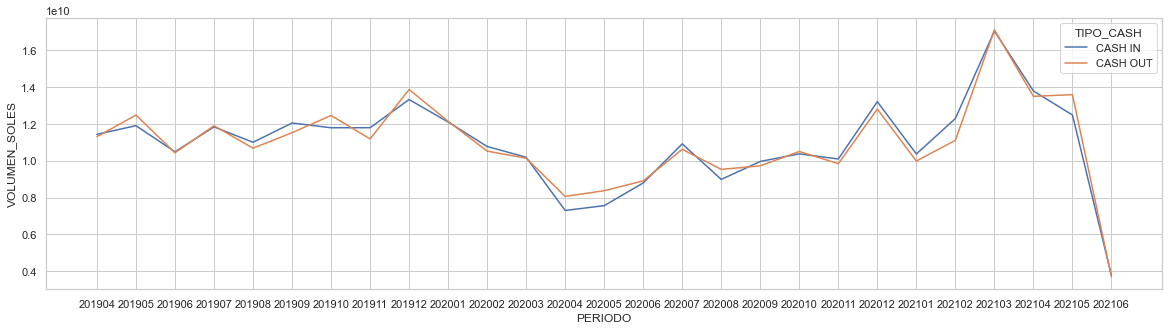

In [116]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.lineplot(
    data=group_periodo_cash_in[group_periodo_cash_in['PERIODO'].astype(int) >= 201904],
    x="PERIODO", y="VOLUMEN_SOLES", ax=axes, hue='TIPO_CASH'
)

In [117]:
transac_cliente['ANIO'].value_counts()

2020    157008
2019    112084
2021     78763
Name: ANIO, dtype: int64

In [118]:
transac_cliente['MONTH'] = transac_cliente['PERIODO'].apply(lambda _: _[-2:])
transac_cliente['MONTH'].value_counts()

05    39057
04    36086
06    34010
11    27402
12    27072
10    26656
09    26646
01    26613
03    26436
02    26166
08    25856
07    25855
Name: MONTH, dtype: int64

In [119]:
cash_in_cliente = transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN']
cash_in_cliente.shape, transac_cliente.shape, cash_in_cliente['COD_UNICO'].unique().shape, transac_cliente['COD_UNICO'].unique().shape

((158053, 10), (347855, 10), (3089,), (3139,))

### CLientesnque solo tiene CASH OUT

In [120]:
len(set(transac_cliente['COD_UNICO'].unique()) - set(cash_in_cliente['COD_UNICO'].unique()))

50

In [121]:
cash_in_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2020,202008,0015396807,CASH IN,,TRANSFERENCIAS,3,82433.00,20200827,08
2,2020,202008,0015419312,CASH IN,NO_TABLERO,OTROS,1,211.92,20200810,08
4,2020,202008,0015480495,CASH IN,,DEPOSITOS,1,7154.00,20200817,08
5,2020,202008,0015508354,CASH IN,,TRANSFERENCIAS,3,18548.80,20200824,08
11,2020,202008,0015560660,CASH IN,,TRANSFERENCIAS,9,1174915.45,20200831,08


In [122]:
group_periodo_cash_in = cash_in_cliente.groupby(by=['ANIO','MONTH'])['VOLUMEN_SOLES'].sum().reset_index()
group_periodo_cash_in

,ANIO,MONTH,VOLUMEN_SOLES
0,2019,04,1.177165e+10
1,2019,05,1.231734e+10
2,2019,06,1.088888e+10
3,2019,07,1.223025e+10
4,2019,08,1.136106e+10
5,2019,09,1.241362e+10
6,2019,10,1.217518e+10
7,2019,11,1.217769e+10
8,2019,12,1.379852e+10
9,2020,01,1.247285e+10


In [123]:
months =  ["01", "02", '03', "04", "05", '06', "07", "08", '09', "10", "11", '12']
group_periodo_cash_in['MONTH'] = pd.Categorical(
    group_periodo_cash_in['MONTH'], [
        _.upper() for _ in months
    ]
)

In [124]:

group_periodo_cash_in.head()

,ANIO,MONTH,VOLUMEN_SOLES
0,2019,04,1.177165e+10
1,2019,05,1.231734e+10
2,2019,06,1.088888e+10
3,2019,07,1.223025e+10
4,2019,08,1.136106e+10


### CASH IN YOY (2020 - 2019)

<AxesSubplot:xlabel='MONTH', ylabel='VOLUMEN_SOLES'>

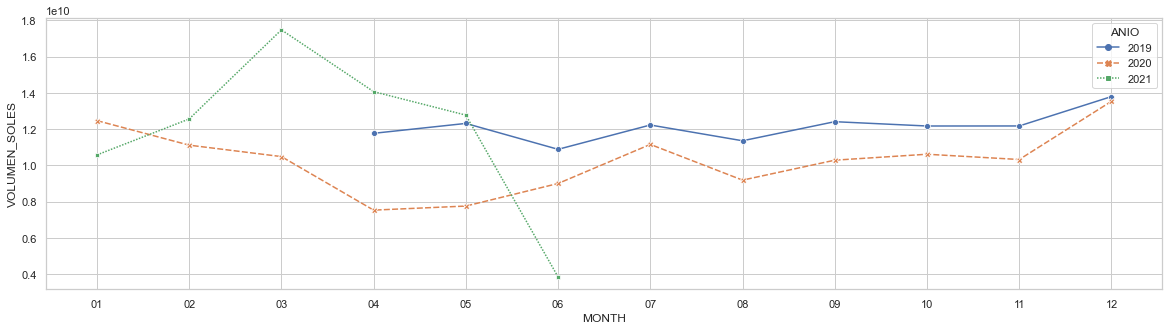

In [125]:
fig, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))

sns.lineplot(
    data=group_periodo_cash_in[
        (group_periodo_cash_in['MONTH'].isin(months[:])) & (group_periodo_cash_in['ANIO'].astype(int) >= 2019)
    ],
    x="MONTH", y="VOLUMEN_SOLES", ax=axes1, 
    hue='ANIO', markers=True,  style="ANIO"#, palette=sns.color_palette("tab10", 2)
)

In [126]:
cash_in_cliente['VOLUMEN_SOLES'].dtype

dtype('float64')

In [127]:
cash_in_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2020,202008,0015396807,CASH IN,,TRANSFERENCIAS,3,82433.00,20200827,08
2,2020,202008,0015419312,CASH IN,NO_TABLERO,OTROS,1,211.92,20200810,08
4,2020,202008,0015480495,CASH IN,,DEPOSITOS,1,7154.00,20200817,08
5,2020,202008,0015508354,CASH IN,,TRANSFERENCIAS,3,18548.80,20200824,08
11,2020,202008,0015560660,CASH IN,,TRANSFERENCIAS,9,1174915.45,20200831,08


In [128]:
cash_in_cliente['MAX_FECHA_INFORMACION'] = pd.to_datetime(
    cash_in_cliente['MAX_FECHA_INFORMACION'], errors='coerce', format='%Y%m%d'
)
cash_in_cliente['MAX_FECHA_INFORMACION'].dtype

<ipython-input-128-dba6e7b44be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_in_cliente['MAX_FECHA_INFORMACION'] = pd.to_datetime(


dtype('<M8[ns]')

In [129]:
#cash_in_cliente['VOLUMEN_SOLES'] = cash_in_cliente['VOLUMEN_SOLES'].copy().apply(lambda _: None if _ < 100 else _)
#cash_in_cliente[cash_in_cliente['COD_UNICO'] == '0016716540']['VOLUMEN_SOLES'].median()
periodo_cash_cliente = cash_in_cliente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'VOLUMEN_SOLES': ['sum'], 'CANT_TRX': ['sum'], 'MAX_FECHA_INFORMACION': ['max']
}).reset_index()

periodo_cash_cliente.columns = ['_'.join(list(_)[:-1]) for _ in periodo_cash_cliente.columns]
periodo_cash_cliente.tail()

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
64185,0017819154,202106,4.089480e+04,1,2021-06-02
64186,0017828877,202104,2.539557e+04,2,2021-04-26
64187,0017828877,202105,5.300000e-01,1,2021-05-27
64188,0017898907,202105,1.000000e+06,5,2021-05-19
64189,0017898907,202106,1.223672e+08,8,2021-06-07


In [130]:
def apply_diff_mont(serie_diff):
    return (serie_diff / np.timedelta64(1,'D')).round(3)

In [131]:
#tramo[0], tramo[-1], tramo[-2]

In [132]:
def RClass(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [133]:
def RClass_propio(x, p, d):
    if x <= d[p][0.15]:
        return 1
    elif x <= d[p][0.3]:
        return 2
    elif x <= d[p][0.45]:
        return 3
    elif x <= d[p][0.6]:
        return 4
    elif x <= d[p][0.75]: 
        return 5
    elif x <= d[p][0.9]: 
        return 6
    else:
        return 7
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass_propio(x, p, d):
    if x <= d[p][0.15]:
        return 7
    elif x <= d[p][0.3]:
        return 6
    elif x <= d[p][0.45]:
        return 5
    elif x <= d[p][0.6]:
        return 4
    elif x <= d[p][0.75]: 
        return 3
    elif x <= d[p][0.9]: 
        return 2
    else:
        return 1

In [134]:
base.shape

(26910, 841)

In [135]:
#display(periodo_cash_cliente[
#    (periodo_cash_cliente['VOLUMEN_SOLES'] < 1000) &  (periodo_cash_cliente['PERIODO'].str.startswith('2019'))
#].hist())
#display(periodo_cash_cliente[
#    (periodo_cash_cliente['VOLUMEN_SOLES'] < 1000) &  (periodo_cash_cliente['PERIODO'].str.startswith('2020'))
#].hist())

### Clientes descartados hasta ahora

In [136]:
len(set(transac_cliente['COD_UNICO'].unique()) - set(periodo_cash_cliente['COD_UNICO'].unique()))

50

In [137]:
new_dataFrame = periodo_cash_cliente[periodo_cash_cliente['COD_UNICO'] == '0123']
new_dataFrame

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION


In [138]:
rango_global = sorted([int(mes) for mes in periodo_cash_cliente['PERIODO'].unique()])
len(rango_global)

27

In [139]:
print(rango_global)

[201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106]


In [140]:
cols_new_dataFrame = list(new_dataFrame.columns)

for cliente in periodo_cash_cliente['COD_UNICO'].unique():
    data_cliente = periodo_cash_cliente[periodo_cash_cliente['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(rango_global).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

#del data_cliente
periodo_cash_cliente = new_dataFrame.copy()
del new_dataFrame

periodo_cash_cliente.head()

<ipython-input-140-a56bbe1a274e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)


,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
0,0000002469,201904,342654.51,4.0,2019-04-30
1,0000002469,201905,163519.20,2.0,2019-05-27
2,0000002469,201906,521756.87,5.0,2019-06-19
3,0000002469,201907,279281.10,7.0,2019-07-25
4,0000002469,201908,NaN,NaN,NaT


In [141]:
periodo_cash_cliente.tail()

,COD_UNICO,PERIODO,VOLUMEN_SOLES,CANT_TRX,MAX_FECHA_INFORMACION
22,0017898907,202102,NaN,NaN,NaT
23,0017898907,202103,NaN,NaN,NaT
24,0017898907,202104,NaN,NaN,NaT
25,0017898907,202105,1.000000e+06,5.0,2021-05-19
26,0017898907,202106,1.223672e+08,8.0,2021-06-07


In [142]:
print(periodo_cash_cliente.columns)

Index(['COD_UNICO', 'PERIODO', 'VOLUMEN_SOLES', 'CANT_TRX',
       'MAX_FECHA_INFORMACION'],
      dtype='object')


### RRRRRRRRRRRRRRRRRRRRRRRRRFFFFFFFFFFFFFFFFFFFFFFFMMMMMMMMMMMMM

In [143]:
for tramo in tramos_rfm[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-5:-2]
    print( ' histroia ',historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1])

 histroia  [202102, 202103, 202104] , Mes cerrado 202104 , cosecha  202104 , Meses target [202105, 202106]
 histroia  [202101, 202102, 202103] , Mes cerrado 202103 , cosecha  202103 , Meses target [202104, 202105]
 histroia  [202012, 202101, 202102] , Mes cerrado 202102 , cosecha  202102 , Meses target [202103, 202104]
 histroia  [202011, 202012, 202101] , Mes cerrado 202101 , cosecha  202101 , Meses target [202102, 202103]
 histroia  [202010, 202011, 202012] , Mes cerrado 202012 , cosecha  202012 , Meses target [202101, 202102]
 histroia  [202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101]
 histroia  [202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012]
 histroia  [202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011]
 histroia  [202006, 202007, 202008] , Mes cerrado 202008 , cosecha  202008 , Meses target [202009, 202010]
 histroia  [202005, 202006, 202007] ,

In [144]:
contador = 1

for tramo in tramos_rfm[::-1]:
    historia = tramo[1][-5:-2]
    mes_cerrado = tramo[0]
    print("Mes cerrado de referencia: ", mes_cerrado, ', historia: ', historia)

    rfm_u6m = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(historia)].groupby(by=['COD_UNICO']).agg({
        'MAX_FECHA_INFORMACION': lambda x: (datetime.strptime(str(mes_cerrado), '%Y%m') + relativedelta(months=1)  - x.max()).days, # Recency
        'CANT_TRX': lambda x: x.sum(),      # Frequency
        'VOLUMEN_SOLES': lambda x: x.sum() #  Monetary Value
    }).reset_index().rename(columns={
        'MAX_FECHA_INFORMACION': 'RECENCY_historia',
        'CANT_TRX': 'FREQUENCY_historia',
        'VOLUMEN_SOLES': 'MONETARY_VALUE_historia'
    })
    rfm_u6m['PERIODO'] = str(mes_cerrado)
    
    quantiles = rfm_u6m.quantile(q=[0.25, 0.5, 0.75]).to_dict()
    print(quantiles)
    rfm_u6m['R_Quartile'] = rfm_u6m['RECENCY_historia'].apply(RClass, args=('RECENCY_historia', quantiles))
    rfm_u6m['F_Quartile'] = rfm_u6m['FREQUENCY_historia'].apply(FMClass, args=('FREQUENCY_historia', quantiles))
    rfm_u6m['M_Quartile'] = rfm_u6m['MONETARY_VALUE_historia'].apply(FMClass, args=('MONETARY_VALUE_historia', quantiles))
    
    sextiles = rfm_u6m.quantile(q=[0.15, 0.3, 0.45, 0.6, 0.75, 0.9]).to_dict()
    print(sextiles)
    rfm_u6m['R_Septile'] = rfm_u6m['RECENCY_historia'].apply(RClass_propio, args=('RECENCY_historia', sextiles))
    rfm_u6m['F_Septile'] = rfm_u6m['FREQUENCY_historia'].apply(FMClass_propio, args=('FREQUENCY_historia', sextiles))
    rfm_u6m['M_Septile'] = rfm_u6m['MONETARY_VALUE_historia'].apply(FMClass_propio, args=('MONETARY_VALUE_historia', sextiles))

    if contador == 1:
        rfm_cliente = rfm_u6m
    else:
        rfm_cliente = pd.concat(
            [rfm_cliente, rfm_u6m], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", rfm_cliente.shape)


rfm_cliente.head()

Mes cerrado de referencia:  202104 , historia:  [202102, 202103, 202104]
{'RECENCY_historia': {0.25: 1.0, 0.5: 2.0, 0.75: 9.0}, 'FREQUENCY_historia': {0.25: 4.0, 0.5: 18.0, 0.75: 67.0}, 'MONETARY_VALUE_historia': {0.25: 51990.19, 0.5: 463861.82, 0.75: 2546916.6999999997}}
{'RECENCY_historia': {0.15: 1.0, 0.3: 1.0, 0.45: 1.0, 0.6: 3.0, 0.75: 9.0, 0.9: 26.0}, 'FREQUENCY_historia': {0.15: 2.0, 0.3: 6.0, 0.45: 14.0, 0.6: 30.0, 0.75: 67.0, 0.9: 235.0}, 'MONETARY_VALUE_historia': {0.15: 3658.0, 0.3: 97415.59199999999, 0.45: 329330.3040000001, 0.6: 886087.758, 0.75: 2546916.6999999997, 0.9: 11639339.026000006}, 'R_Quartile': {0.15: 1.0, 0.3: 1.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}, 'F_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}, 'M_Quartile': {0.15: 1.0, 0.3: 2.0, 0.45: 2.0, 0.6: 3.0, 0.75: 4.0, 0.9: 4.0}}
-- (3089, 11)
Mes cerrado de referencia:  202103 , historia:  [202101, 202102, 202103]
{'RECENCY_historia': {0.25: 1.0, 0.5: 2.0, 0.75: 8.0}, 'FREQUENC

,COD_UNICO,RECENCY_historia,FREQUENCY_historia,MONETARY_VALUE_historia,PERIODO,R_Quartile,F_Quartile,M_Quartile,R_Septile,F_Septile,M_Septile
0,0000002469,43.0,2.0,1918.80,202104,4,4,4,7,7,7
1,0000003392,2.0,55.0,13570112.83,202104,2,2,1,4,3,1
2,0000006114,2.0,34.0,4115523.86,202104,2,2,1,4,3,2
3,0000006726,2.0,187.0,774785.84,202104,2,1,2,4,2,4
4,0000008045,1.0,1034.0,47984610.59,202104,1,1,1,1,1,1


In [145]:
rfm_cliente.shape

(43246, 11)

In [146]:
base = base.merge(
    rfm_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
base.shape

(26910, 850)

In [147]:
rfm_cliente.head()

,COD_UNICO,RECENCY_historia,FREQUENCY_historia,MONETARY_VALUE_historia,PERIODO,R_Quartile,F_Quartile,M_Quartile,R_Septile,F_Septile,M_Septile
0,0000002469,43.0,2.0,1918.80,202104,4,4,4,7,7,7
1,0000003392,2.0,55.0,13570112.83,202104,2,2,1,4,3,1
2,0000006114,2.0,34.0,4115523.86,202104,2,2,1,4,3,2
3,0000006726,2.0,187.0,774785.84,202104,2,1,2,4,2,4
4,0000008045,1.0,1034.0,47984610.59,202104,1,1,1,1,1,1


In [148]:
type(tramos[0][0])

int

In [149]:
for col in ['R_Septile', 'F_Septile', 'M_Septile']:
    acum_m = generate_listado_u3m(rfm_cliente, 'listado_', values=col, index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, tramos=tramos_rfm)
    acum_m = acum_m[acum_m['PERIODO'].astype(int) >= int(tramos[0][0])]
    #display(acum_m['PERIODO'].value_counts(dropna=False))
    
    #0:  se mantiene en su categoria
    #postvo: esta empeorando
    #negativo: esta mejorando
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'] = acum_m['listado_'].apply(lambda _: _[-1] - _[-2])
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_SE_MANTIENE'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ == 0).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_MEJORA_1_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ == -1).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_MEJORA_2_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ == -2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_MEJORA_2_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ <= -2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_MEJORA_3_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ == -3).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_MEJORA_3_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ <= -3).astype(int)  
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_EMPEORA_1_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ == 1).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_EMPEORA_2_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ == 2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_EMPEORA_2_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ >= 2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_EMPEORA_3_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ == 3).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M_EMPEORA_3_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U2M'].apply(lambda _: _ >= 3).astype(int)   
    
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'] = acum_m['listado_'].apply(lambda _: _[-1] - _[-3])
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_SE_MANTIENE'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ == 0).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_MEJORA_1_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ == -1).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_MEJORA_2_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ == -2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_MEJORA_2_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ <= -2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_MEJORA_3_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ == -3).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_MEJORA_3_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ <= -3).astype(int)  
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_EMPEORA_1_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ == 1).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_EMPEORA_2_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ == 2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_EMPEORA_2_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ >= 2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_EMPEORA_3_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ == 3).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M_EMPEORA_3_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U3M'].apply(lambda _: _ >= 3).astype(int)
    
    acum_m['_' + col.upper() + '_' + '3_ULTIMOS_MESES_EN_LOS_3_PEORES_BUCKETS'] =  acum_m['listado_'].apply(lambda _: _[-1] >= 5 and _[-2] >= 5 and _[-3] >= 5).astype(int)
    acum_m['_' + col.upper() + '_' + '3_ULTIMOS_MESES_EN_LOS_4_PEORES_BUCKETS'] =  acum_m['listado_'].apply(lambda _: _[-1] >= 4 and _[-2] >= 4 and _[-3] >= 4).astype(int)
    
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'] = acum_m['listado_'].apply(lambda _: _[-1] - _[-6])
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_SE_MANTIENE'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ == 0).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_MEJORA_1_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ == -1).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_MEJORA_2_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ == -2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_MEJORA_2_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ <= -2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_MEJORA_3_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ == -3).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_MEJORA_3_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ <= -3).astype(int)  
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_EMPEORA_1_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ == 1).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_EMPEORA_2_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ == 2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_EMPEORA_2_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ >= 2).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_EMPEORA_3_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ == 3).astype(int)
    acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M_EMPEORA_3_O_MAS_CATEGORIA'] = acum_m['_' + col.upper() + '_' + 'DIFERRENCIA_ENTRE_CATEGORIAS_U1M_U6M'].apply(lambda _: _ >= 3).astype(int)  
    
    acum_m['_' + col.upper() + '_' + '6_ULTIMOS_MESES_EN_LOS_3_PEORES_BUCKETS'] =  acum_m['listado_'].apply(lambda _: _[-1] >= 5 and _[-2] >= 5 and _[-3] >= 5 and _[-4] >= 5 and _[-5] >= 5 and _[-6] >= 5).astype(int)
    acum_m['_' + col.upper() + '_' + '6_ULTIMOS_MESES_EN_LOS_4_PEORES_BUCKETS'] =  acum_m['listado_'].apply(lambda _: _[-1] >= 4 and _[-2] >= 4 and _[-3] >= 4 and _[-4] >= 4 and _[-5] >= 4 and _[-6] >= 4).astype(int)
    
    del acum_m['listado_']
    acum_m['PERIODO'] = acum_m['PERIODO'].astype(str)
    acum_m['COD_UNICO'] = acum_m['COD_UNICO'].astype(str)
    base['PERIODO'] = base['PERIODO'].astype(str)
    base['COD_UNICO'] = base['COD_UNICO'].astype(str)
    
    print(base.shape)
    base = base.merge(
        acum_m, how='left', on=['PERIODO', 'COD_UNICO']
    )
    print(base.shape)

202003 [201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003]
(3089, 3)
202004 [201905, 201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004]
(6178, 3)
202005 [201906, 201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005]
(9267, 3)
202006 [201907, 201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006]
(12356, 3)
202007 [201908, 201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007]
(15445, 3)
202008 [201909, 201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008]
(18534, 3)
202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(21623, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(24712, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202

In [150]:
#[col for col in base.columns if 'CATEGORIAS' in col.upper()]

In [151]:
acum_m['PERIODO'].value_counts().sort_index()

202009    3089
202010    3089
202011    3089
202012    3089
202101    3089
202102    3089
202103    3089
202104    3089
Name: PERIODO, dtype: int64

In [152]:
def evaluate_rfm(r, f, m):
    if pd.isnull(r) and pd.isnull(f) and pd.isnull(m):
        return None
    
    return '_' + str(int(r)) + str(int(f)) + str(int(m))

def evaluate_fm(f, m):
    if pd.isnull(f) and pd.isnull(m):
        return None
    
    return '_' + str(int(f)) + str(int(m))

base['RFMClass_quartil'] = base[['R_Quartile', 'F_Quartile', 'M_Quartile']].apply(
    lambda _: evaluate_rfm(_[0], _[1], _[2]), axis=1
)
base['FM_category_quartil'] = base[['F_Quartile', 'M_Quartile']].apply(
    lambda _: evaluate_fm(_[0], _[1]), axis=1
)
base['RFMClass_septil'] = base[['R_Septile', 'F_Septile', 'M_Septile']].apply(
    lambda _: evaluate_rfm(_[0], _[1], _[2]), axis=1
)
base['FM_category_septil'] = base[['F_Septile', 'M_Septile']].apply(
    lambda _: evaluate_fm(_[0], _[1]), axis=1
)

In [153]:
for col in ['FM_category_quartil', 'RFMClass_quartil', 'FM_category_septil', 'RFMClass_septil']:
    base[col] = base[col].fillna('nulo')

In [154]:
base['FM_category_quartil'].value_counts(dropna=False).head(60)

_44     3994
nulo    3921
_11     2777
_33     2462
_22     2326
_12     1932
_21     1837
_23     1591
_32     1517
_34     1080
_43     1062
_13      908
_31      671
_42      364
_24      283
_41      130
_14       55
Name: FM_category_quartil, dtype: int64

In [155]:
base['FM_category_septil'].value_counts(dropna=False).head(60)

nulo    3921
_77     2393
_66     1430
_55      915
_33      875
_22      874
_32      817
_43      797
_23      796
_44      787
_12      776
_56      770
_34      741
_45      733
_76      710
_54      693
_65      685
_42      663
_24      659
_11      590
_21      537
_53      510
_13      475
_35      467
_25      442
_67      427
_31      400
_64      392
_46      352
_52      320
_14      278
_36      260
_75      248
_63      198
_41      157
_15      120
_26      117
_62      113
_74      104
_57       91
_51       71
_73       59
_72       48
_61       44
_47       33
_37        9
_16        8
_71        5
Name: FM_category_septil, dtype: int64

In [156]:
base.shape

(26910, 974)

In [157]:
base = base.merge(
     pd.get_dummies(
        base[['R_Septile', 'F_Septile', 'M_Septile', 'PERIODO', 'COD_UNICO']], columns=['R_Septile', 'F_Septile', 'M_Septile'],
        dummy_na=True, drop_first=False, prefix_sep='_cut_'
    ), how='left', on=['PERIODO', 'COD_UNICO']
)
base.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,F_Septile_cut_7.0,F_Septile_cut_nan,M_Septile_cut_1.0,M_Septile_cut_2.0,M_Septile_cut_3.0,M_Septile_cut_4.0,M_Septile_cut_5.0,M_Septile_cut_6.0,M_Septile_cut_7.0,M_Septile_cut_nan
0,202008,0003041431,20100132916,1,CERAMICOS PERUANOS,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,202008,0003142478,20100013747,1,BIOCON DEL PERU,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,202008,0003107943,20114022838,0,ARENERA JAEN,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,202008,0003084548,20211040352,1,QUIMICOS GOICOCHEA,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,202008,0002746782,20109015611,0,OFTALMOLOGOS CONTRERAS CAMPOS,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0








































































































































































































































### TARGET YOY

In [158]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-5:-2]
    print( ' histroia ', historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1], tramo[-2])

 histroia  [202102, 202103, 202104] , Mes cerrado 202104 , cosecha  202104 , Meses target [202105, 202106] [202005, 202006]
 histroia  [202101, 202102, 202103] , Mes cerrado 202103 , cosecha  202103 , Meses target [202104, 202105] [202004, 202005]
 histroia  [202012, 202101, 202102] , Mes cerrado 202102 , cosecha  202102 , Meses target [202103, 202104] [202003, 202004]
 histroia  [202011, 202012, 202101] , Mes cerrado 202101 , cosecha  202101 , Meses target [202102, 202103] [202002, 202003]
 histroia  [202010, 202011, 202012] , Mes cerrado 202012 , cosecha  202012 , Meses target [202101, 202102] [202001, 202002]
 histroia  [202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101] [201912, 202001]
 histroia  [202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses target [202011, 202012] [201911, 201912]
 histroia  [202007, 202008, 202009] , Mes cerrado 202009 , cosecha  202009 , Meses target [202010, 202011] [201910, 201911]


In [159]:
dicc_kpi = {
    'VOLUMEN_SOLES': ['sum'] #count
}
columns_base = ['TRX_SUM_']
contador = 1

for tramo in tramos[::-1]:
    last_year = tramo[-2]
    mes_cerrado = tramo[0]
    new_year = tramo[-1]
    print("Mes cerrado: ", mes_cerrado, ', Meses target', tramo[-1], tramo[-2])

    _2m_actual = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(new_year)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_pasado = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(last_year)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    
    data_tramo = pd.concat(
        [_2m_actual, _2m_pasado], axis=1
    )
    data_tramo.columns = ['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']
    data_tramo = data_tramo.reset_index().rename(columns={'index': 'COD_UNICO'})
    data_tramo['PERIODO'] = str(mes_cerrado)
    
    del _2m_actual
    del _2m_pasado
    
    if contador == 1:
        analisis_cliente = data_tramo
    else:
        analisis_cliente = pd.concat(
            [analisis_cliente, data_tramo], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", analisis_cliente.shape)

analisis_cliente.head()                        

Mes cerrado:  202104 , Meses target [202105, 202106] [202005, 202006]
-- (3089, 4)
Mes cerrado:  202103 , Meses target [202104, 202105] [202004, 202005]
-- (6178, 4)
Mes cerrado:  202102 , Meses target [202103, 202104] [202003, 202004]
-- (9267, 4)
Mes cerrado:  202101 , Meses target [202102, 202103] [202002, 202003]
-- (12356, 4)
Mes cerrado:  202012 , Meses target [202101, 202102] [202001, 202002]
-- (15445, 4)
Mes cerrado:  202011 , Meses target [202012, 202101] [201912, 202001]
-- (18534, 4)
Mes cerrado:  202010 , Meses target [202011, 202012] [201911, 201912]
-- (21623, 4)
Mes cerrado:  202009 , Meses target [202010, 202011] [201910, 201911]
-- (24712, 4)


,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO
0,0000002469,0.00,1731.00,202104
1,0000003392,4149173.55,5291643.70,202104
2,0000006114,4690641.02,1935315.15,202104
3,0000006726,210498.75,154942.24,202104
4,0000008045,4919114.00,4919456.70,202104


In [160]:
analisis_cliente.columns

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO'], dtype='object')

In [161]:
import gc
gc.collect()

44

In [162]:
analisis_cliente = analisis_cliente.sort_values(by=['COD_UNICO', 'PERIODO'], ascending=[True, False])
analisis_cliente.head()

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO
0,0000002469,0.00,1731.0,202104
0,0000002469,0.00,0.0,202103
0,0000002469,1206.80,0.0,202102
0,0000002469,1918.80,0.0,202101
0,0000002469,179290.82,0.0,202012


In [163]:
print(analisis_cliente.columns)

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO'], dtype='object')


In [164]:
analisis_cliente['PRE_TARGET_sum_yoy'] = analisis_cliente[['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']].apply(lambda _: get_div_means_perios(_[0] , _[1]), axis=1)

analisis_cliente['TRX_SUM_ACTAUL'] = analisis_cliente['TRX_SUM_ACTAUL'] / 2
analisis_cliente['TRX_SUM_PASADO'] = analisis_cliente['TRX_SUM_PASADO'] / 2
analisis_cliente['PRE_TARGET_yoy'] = analisis_cliente[['TRX_SUM_ACTAUL', 'TRX_SUM_PASADO']].apply(lambda _: get_div_means_perios(_[0] , _[1]), axis=1)
analisis_cliente.head()

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO,PRE_TARGET_sum_yoy,PRE_TARGET_yoy
0,0000002469,0.00,865.5,202104,0.00,0.00
0,0000002469,0.00,0.0,202103,0.00,0.00
0,0000002469,603.40,0.0,202102,1206.80,603.40
0,0000002469,959.40,0.0,202101,1918.80,959.40
0,0000002469,89645.41,0.0,202012,179290.82,89645.41


In [165]:
if (analisis_cliente['PRE_TARGET_sum_yoy'] == analisis_cliente['PRE_TARGET_yoy']).any():
    del analisis_cliente['PRE_TARGET_sum_yoy']

In [166]:
transac_cliente.shape

(347855, 10)

## Descartamos a quienes ya estaban con pcas transacciones in efecto de los ultimo ese

In [167]:
#now - relativedelta(months=11)

In [168]:
periodos_valida = [_.strftime('%Y%m') for _ in pd.date_range( now - relativedelta(months=11) , now - relativedelta(months=1), freq='MS')]
print(periodos_valida)

['202008', '202009', '202010', '202011', '202012', '202101', '202102', '202103', '202104', '202105']


In [169]:
transac_valid = pd.pivot_table(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 
    values='CANT_TRX', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.sum, fill_value=0
).unstack().reset_index()
transac_valid.columns = ['PERIODO', 'COD_UNICO', 'CANT_TRX']
transac_valid.head(3)

,PERIODO,COD_UNICO,CANT_TRX
0,201904,0000002469,4
1,201904,0000003392,15
2,201904,0000006114,15


array([[<AxesSubplot:title={'center':'CANT_TRX'}>]], dtype=object)

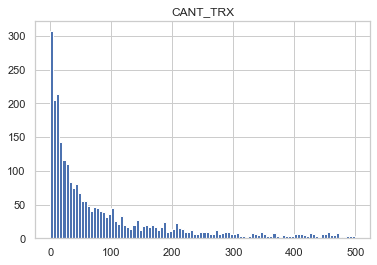

In [170]:
transac_valid = transac_valid[
    (transac_valid['PERIODO'].isin(periodos_valida))
].groupby(by=['COD_UNICO'])['CANT_TRX'].sum().reset_index()

transac_valid[transac_valid['CANT_TRX']< 500].hist(bins=100)

##### MENOS TRANSACCCIONES DEL 97% DE CLIENTES EN LOS 10 ULTIMOS MESES

In [171]:
minimas = transac_valid.CANT_TRX.quantile([0.05])[0.05]
print(minimas)

2.0


In [172]:
muy_pocas_trx = list(transac_valid[transac_valid['CANT_TRX'] <= minimas]['COD_UNICO'])
print(muy_pocas_trx)

['0000042432', '0000060467', '0000229633', '0000698035', '0001534890', '0002443489', '0003290442', '0004396685', '0005437108', '0005601901', '0005606025', '0006334742', '0006693386', '0006916365', '0007576077', '0008157168', '0008198436', '0008227616', '0008443663', '0008722222', '0008747396', '0008815054', '0009017582', '0009155455', '0009204452', '0009270081', '0009324891', '0009386822', '0009462697', '0009529650', '0009603473', '0009621308', '0009938270', '0010060934', '0010104344', '0010183023', '0010518859', '0010562614', '0010648747', '0010657882', '0010760855', '0010853310', '0010856041', '0011000989', '0011095988', '0011285271', '0011391154', '0011653330', '0011684313', '0011687408', '0011710569', '0011724103', '0011793990', '0011858461', '0011859285', '0011859432', '0011859651', '0011859730', '0011860389', '0011861856', '0011864503', '0011865884', '0011868475', '0011868520', '0011868669', '0011868842', '0011869451', '0011870837', '0011871080', '0011871175', '0011874378', '0012

In [173]:
analisis_cliente.columns

Index(['COD_UNICO', 'TRX_SUM_ACTAUL', 'TRX_SUM_PASADO', 'PERIODO',
       'PRE_TARGET_yoy'],
      dtype='object')

In [174]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente[~analisis_cliente['COD_UNICO'].isin(muy_pocas_trx)]
print(analisis_cliente.shape)

(24712, 5)
(23184, 5)


### DEFINICIION DE TARGET YOY

<AxesSubplot:>

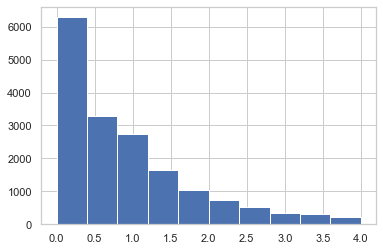

In [175]:
analisis_cliente[analisis_cliente['PRE_TARGET_yoy']< 4]['PRE_TARGET_yoy'].hist()

In [176]:
periodos_valida[-6]

'202012'

In [177]:
#periodos_valida

In [178]:
quantile_03 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6])) & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.35)
quantile_03

0.26724370049526147

In [179]:
quantile_04 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.45)
quantile_04

0.4534592080708617

In [180]:
quantile_05 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.55)
quantile_05

0.6449317093488295

In [181]:
quantile_06 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) >  int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.65)
quantile_06

0.8590511913448087

In [182]:
quantile_07 = analisis_cliente[
    (analisis_cliente['PERIODO'].astype(int) > int(periodos_valida[-6]))  & (analisis_cliente['PRE_TARGET_yoy'] < 2)
].PRE_TARGET_yoy.quantile(0.75)
quantile_07

1.0852867792671141

In [183]:
analisis_cliente['target_yoy_quartil_03'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_03).astype(int)
analisis_cliente['target_yoy_quartil_04'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_04).astype(int)
analisis_cliente['target_yoy_quartil_05'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_05).astype(int)
analisis_cliente['target_yoy_quartil_06'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_06).astype(int)
analisis_cliente['target_yoy_quartil_07'] = analisis_cliente['PRE_TARGET_yoy'].apply(lambda _: _<= quantile_07).astype(int)
analisis_cliente.head(20)

,COD_UNICO,TRX_SUM_ACTAUL,TRX_SUM_PASADO,PERIODO,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07
0,0000002469,0.000,865.500,202104,0.000000,1,1,1,1,1
0,0000002469,0.000,0.000,202103,0.000000,1,1,1,1,1
0,0000002469,603.400,0.000,202102,603.400000,0,0,0,0,0
0,0000002469,959.400,0.000,202101,959.400000,0,0,0,0,0
0,0000002469,89645.410,0.000,202012,89645.410000,0,0,0,0,0
0,0000002469,234423.050,0.000,202011,234423.050000,0,0,0,0,0
0,0000002469,293444.390,0.000,202010,293444.390000,0,0,0,0,0
0,0000002469,148810.750,0.000,202009,148810.750000,0,0,0,0,0
1,0000003392,2074586.775,2645821.850,202104,0.784099,0,0,0,1,1
1,0000003392,4842661.005,2111546.855,202103,2.293419,0,0,0,0,0


In [184]:
analisis_cliente = base.merge(
    analisis_cliente[
        ['PERIODO', 'COD_UNICO', 'PRE_TARGET_yoy', 'target_yoy_quartil_03','target_yoy_quartil_04','target_yoy_quartil_05', 'target_yoy_quartil_06', 'target_yoy_quartil_07']
    ], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)


analisis_cliente.tail(3)

(26910, 1003)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,M_Septile_cut_5.0,M_Septile_cut_6.0,M_Septile_cut_7.0,M_Septile_cut_nan,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07
26907,202103,0013849507,20454085150,1,POLICLINICO DIVINO NIÑO,0,0,0,0,1,...,1,0,0,0,2.731580,0.0,0.0,0.0,0.0,0.0
26908,202103,0013854099,20563983176,0,INVERSIONES DISTRIBUCIONES E INDUSTRIAS,0,0,1,0,1,...,0,0,0,0,2.072612,0.0,0.0,0.0,0.0,0.0
26909,202103,0013859281,20543061051,0,EUROFINSA,0,0,0,0,0,...,0,0,0,0,13.804865,0.0,0.0,0.0,0.0,0.0


In [185]:
for column in [col for col in analisis_cliente.columns if ('trx' in col.lower() or 'cash' in col.lower()) and 'target' not in col.lower()]:
    analisis_cliente[col] = analisis_cliente[col].fillna(0)

In [186]:
[_.strftime('%Y%m') for _ in pd.date_range( now - relativedelta(months=11) , now - relativedelta(months=1), freq='MS')]

['202008',
 '202009',
 '202010',
 '202011',
 '202012',
 '202101',
 '202102',
 '202103',
 '202104',
 '202105']

In [187]:
import time
datetime.strptime( str(tramo[1][0]), '%Y%m')

datetime.datetime(2019, 10, 1, 0, 0)

In [188]:
dicc_kpi = {
    'VOLUMEN_SOLES': ['sum'] #count
}
columns_base = ['TRX_SUM_']
contador = 1

for tramo in tramos[::-1]:
    last_year = tramo[-2]
    mes_cerrado = tramo[0]
    new_year = tramo[-1]
    anio_pasado = [int(_.strftime('%Y%m')) for _ in pd.date_range( datetime.strptime( str(tramo[1][0]), '%Y%m') - relativedelta(months=6) ,  datetime.strptime( str(tramo[1][0]), '%Y%m') - relativedelta(months=1), freq='MS')]
    print("Mes cerrado: ", mes_cerrado, ', Meses target', tramo[1], tramo[2], tramo[3])
    print(anio_pasado)
    print(anio_pasado[-3:])
    print(anio_pasado[-6:])
    
    #break
    ultimos_3_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(tramo[3])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    ultimos_6_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(tramo[2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    aniopas_3_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(anio_pasado[-3:])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    aniopas_6_meses = periodo_cash_cliente[periodo_cash_cliente['PERIODO'].astype(int).isin(anio_pasado[-6:])].groupby(by=['COD_UNICO']).agg(dicc_kpi) 
    
    data_tramo = pd.concat(
        [ultimos_3_meses, ultimos_6_meses, aniopas_3_meses, aniopas_6_meses], axis=1
    )
    data_tramo.columns = ['TRX_SUM_U3M', 'TRX_SUM_U6M', 'TRX_PAS_U3M', 'TRX_PAS_U6M']
    data_tramo = data_tramo.reset_index().rename(columns={'index': 'COD_UNICO'})
    data_tramo['PERIODO'] = str(mes_cerrado)
    
    del ultimos_3_meses, ultimos_6_meses, aniopas_3_meses, aniopas_6_meses
    #del _2m_pasado
    
    if contador == 1:
        yoy_cash_in = data_tramo
    else:
        yoy_cash_in = pd.concat(
            [yoy_cash_in, data_tramo], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", yoy_cash_in.shape)

yoy_cash_in.head()                        

Mes cerrado:  202104 , Meses target [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104] [202102, 202103, 202104]
[201911, 201912, 202001, 202002, 202003, 202004]
[202002, 202003, 202004]
[201911, 201912, 202001, 202002, 202003, 202004]
-- (3089, 6)
Mes cerrado:  202103 , Meses target [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103] [202101, 202102, 202103]
[201910, 201911, 201912, 202001, 202002, 202003]
[202001, 202002, 202003]
[201910, 201911, 201912, 202001, 202002, 202003]
-- (6178, 6)
Mes cerrado:  202102 , Meses target [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102] [202012, 202101, 202102]
[201909, 201910, 201911, 201912, 202001, 202002]
[201912, 2

,COD_UNICO,TRX_SUM_U3M,TRX_SUM_U6M,TRX_PAS_U3M,TRX_PAS_U6M,PERIODO
0,0000002469,1918.80,767386.40,0.00,0.00,202104
1,0000003392,13570112.83,29935640.89,4532499.79,7457560.63,202104
2,0000006114,4115523.86,8293107.44,2603255.50,13823512.70,202104
3,0000006726,774785.84,1359224.30,221739.35,400773.41,202104
4,0000008045,47984610.59,71893281.27,24163699.96,69749916.51,202104


In [189]:
yoy_cash_in['YOY_input_cash_in_U3M'] = yoy_cash_in['TRX_SUM_U3M'] / yoy_cash_in['TRX_PAS_U3M']
yoy_cash_in['YOY_input_cash_in_U6M'] = yoy_cash_in['TRX_SUM_U6M'] / yoy_cash_in['TRX_PAS_U6M']

In [190]:
analisis_cliente = analisis_cliente.merge(
    yoy_cash_in[
        ['PERIODO', 'COD_UNICO', 'YOY_input_cash_in_U3M', 'YOY_input_cash_in_U6M']
    ], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

analisis_cliente.tail(3)

(26910, 1005)


,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,M_Septile_cut_7.0,M_Septile_cut_nan,PRE_TARGET_yoy,target_yoy_quartil_03,target_yoy_quartil_04,target_yoy_quartil_05,target_yoy_quartil_06,target_yoy_quartil_07,YOY_input_cash_in_U3M,YOY_input_cash_in_U6M
26907,202103,0013849507,20454085150,1,POLICLINICO DIVINO NIÑO,0,0,0,0,1,...,0,0,2.731580,0.0,0.0,0.0,0.0,0.0,1.297237,1.386843
26908,202103,0013854099,20563983176,0,INVERSIONES DISTRIBUCIONES E INDUSTRIAS,0,0,1,0,1,...,0,0,2.072612,0.0,0.0,0.0,0.0,0.0,2.147110,2.453581
26909,202103,0013859281,20543061051,0,EUROFINSA,0,0,0,0,0,...,0,0,13.804865,0.0,0.0,0.0,0.0,0.0,1.941105,1.559350


In [191]:
gc.collect()

66

In [192]:
del base
#del up

## A PEDIDO FOCO EN CANTIDADES DE TRANSACCIONES

In [193]:
transac_cliente.head()

,ANIO,PERIODO,COD_UNICO,TIPO_CASH,KPI,GRUPO_N1,CANT_TRX,VOLUMEN_SOLES,MAX_FECHA_INFORMACION,MONTH
0,2020,202008,0015396807,CASH IN,,TRANSFERENCIAS,3,82433.00,20200827,08
1,2020,202008,0015396807,CASH OUT,,PAGO DE SERVICIOS,1,185.22,20200804,08
2,2020,202008,0015419312,CASH IN,NO_TABLERO,OTROS,1,211.92,20200810,08
3,2020,202008,0015445308,CASH OUT,,PAGOS MASIVOS,1,17305.76,20200814,08
4,2020,202008,0015480495,CASH IN,,DEPOSITOS,1,7154.00,20200817,08


In [194]:
acum = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH IN'], 'listados_num_trx', values='CANT_TRX',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3089, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(6178, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9267, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12356, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(15445, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(18534, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(21623, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(24712, 3)


,COD_UNICO,listados_num_trx,PERIODO
0,0000002469,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 5, 3]",202009
1,0000003392,"[17, 7, 10, 5, 8, 7, 7, 12, 16, 18, 21, 27]",202009
2,0000006114,"[12, 12, 16, 15, 12, 11, 12, 10, 8, 19, 11, 7]",202009
3,0000006726,"[7, 9, 10, 11, 10, 7, 1, 6, 12, 22, 18, 26]",202009
4,0000008045,"[413, 462, 513, 480, 433, 277, 24, 125, 295, 5...",202009


<AxesSubplot:>

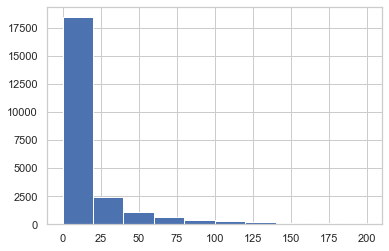

In [195]:
acum['PROM_CANT_TRX_U12M_CASHIN'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-12:]))
acum[acum['PROM_CANT_TRX_U12M_CASHIN']< 200]['PROM_CANT_TRX_U12M_CASHIN'].hist()

<AxesSubplot:>

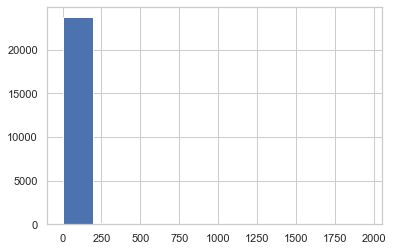

In [196]:
acum['PROM_CANT_TRX_U6M_CASHIN'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-6:]))
acum[acum['PROM_CANT_TRX_U6M_CASHIN']< 200]['PROM_CANT_TRX_U12M_CASHIN'].hist()

In [197]:
acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'] =  acum['PROM_CANT_TRX_U6M_CASHIN'] - acum['PROM_CANT_TRX_U12M_CASHIN']
def div_flash(a, b):
    if not(b):
        return a
    
    return a/b


acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'] = acum[['PROM_CANT_TRX_U6M_CASHIN', 'PROM_CANT_TRX_U12M_CASHIN']].apply(lambda _: div_flash(_[0], _[1]), axis=1)
acum['TIENE_DISMINUCION_1PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.99).astype(int)
acum['TIENE_DISMINUCION_3PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.97).astype(int)
acum['TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.95).astype(int)
acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.9).astype(int)
acum['TIENE_DISMINUCION_15PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.85).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.8).astype(int)
acum['TIENE_DISMINUCION_25PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.75).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.7).astype(int)
acum['TIENE_DISMINUCION_35PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.65).astype(int)
acum['TIENE_DISMINUCION_40PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.6).astype(int)
acum['TIENE_DISMINUCION_45PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M'] = acum['ratio_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ <= 0.55).astype(int)

acum['TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ > 0).astype(int)
acum['TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN'].apply(lambda _: _ < 0).astype(int)

In [198]:
acum['TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.1).astype(int)
acum['TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.2).astype(int)
acum['TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.3).astype(int)

acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.9).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.8).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.7).astype(int)

In [199]:
del acum['listados_num_trx']
acum.head()

,COD_UNICO,PERIODO,PROM_CANT_TRX_U12M_CASHIN,PROM_CANT_TRX_U6M_CASHIN,DIFF_PROM_CANT_TRX_U6M_U12M_CASHIN,ratio_PROM_CANT_TRX_U6M_U12M_CASHIN,TIENE_DISMINUCION_1PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_3PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,...,TIENE_DISMINUCION_40PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_DISMINUCION_45PERCENT_A_MAS_CANT_TRX_PROM_U6M_U12M,TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHIN_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_CASHIN_TRX_MES_ANT
0,0000002469,202009,1.166667,2.333333,1.166667,2.000000,0,0,0,0,...,0,0,1,0,0,0,0,1,1,1
1,0000003392,202009,12.916667,16.833333,3.916667,1.303226,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
2,0000006114,202009,12.083333,11.166667,-0.916667,0.924138,1,1,1,0,...,0,0,0,1,0,0,0,1,1,1
3,0000006726,202009,11.583333,14.166667,2.583333,1.223022,0,0,0,0,...,0,0,1,0,1,1,1,0,0,0
4,0000008045,202009,375.500000,321.333333,-54.166667,0.855748,1,1,1,1,...,0,0,0,1,0,0,0,1,1,0


In [200]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1028)

## LO MISMO PARA EL CASH OUT

In [201]:
acum = generate_listado_u3m(
    transac_cliente[transac_cliente['TIPO_CASH'] == 'CASH OUT'], 'listados_num_trx', values='CANT_TRX',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3135, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(6270, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9405, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12540, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(15675, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(18810, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(21945, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(25080, 3)


,COD_UNICO,listados_num_trx,PERIODO
0,0000002469,"[8, 6, 6, 6, 6, 6, 6, 4, 9, 6, 11, 6]",202009
1,0000003392,"[51, 41, 49, 48, 51, 44, 29, 44, 38, 37, 40, 52]",202009
2,0000006114,"[49, 30, 41, 59, 26, 25, 33, 17, 24, 74, 67, 38]",202009
3,0000006726,"[10, 14, 19, 24, 20, 14, 5, 8, 12, 31, 25, 43]",202009
4,0000008045,"[625, 568, 643, 660, 595, 401, 82, 211, 385, 6...",202009


In [202]:
acum['CANTIDAD_CASHOUT_U1M'] = acum['listados_num_trx'].apply(lambda _: _[-1])
acum['CANTIDAD_CASHOUT_U2M'] = acum['listados_num_trx'].apply(lambda _: _[-2])
acum['CANTIDAD_CASHOUT_U3M'] = acum['listados_num_trx'].apply(lambda _: _[-3])
acum['CANTIDAD_CASHOUT_U6M'] = acum['listados_num_trx'].apply(lambda _: _[-6])
acum['CANTIDAD_CASHOUT_U12M'] = acum['listados_num_trx'].apply(lambda _: _[-12])

acum['PROM_CANT_TRX_U12M_CASHOUT'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-12:]))
acum['PROM_CANT_TRX_U6M_CASHOUT'] = acum['listados_num_trx'].apply(lambda _: np.mean(_[-6:]))

acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'] =  acum['PROM_CANT_TRX_U6M_CASHOUT'] - acum['PROM_CANT_TRX_U12M_CASHOUT']

acum['TIENE_AUMENTO_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'].apply(lambda _: _ > 0).astype(int)
acum['TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M'] =  acum['DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT'].apply(lambda _: _ < 0).astype(int)

acum['TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.1).astype(int)
acum['TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.2).astype(int)
acum['TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) >= 1.3).astype(int)

acum['TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.95).astype(int)
acum['TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.9).astype(int)
acum['TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.8).astype(int)
acum['TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT'] = acum['listados_num_trx'].apply(lambda _: div_flash(_[-1], _[-2]) <= 0.7).astype(int)
acum['CANT_TRX_CASHOUT_MES_ANTERIOR'] = acum['listados_num_trx'].apply(lambda _: _[-2])
acum['CANT_TRX_CASHOUT_MES_ACTUAL'] = acum['listados_num_trx'].apply(lambda _: _[-1])

In [203]:
del acum['listados_num_trx']
acum.head()

,COD_UNICO,PERIODO,CANTIDAD_CASHOUT_U1M,CANTIDAD_CASHOUT_U2M,CANTIDAD_CASHOUT_U3M,CANTIDAD_CASHOUT_U6M,CANTIDAD_CASHOUT_U12M,PROM_CANT_TRX_U12M_CASHOUT,PROM_CANT_TRX_U6M_CASHOUT,DIFF_PROM_CANT_TRX_U6M_U12M_CASHOUT,...,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,CANT_TRX_CASHOUT_MES_ANTERIOR,CANT_TRX_CASHOUT_MES_ACTUAL
0,0000002469,202009,6,11,6,6,8,6.666667,7.000000,0.333333,...,0,0,0,0,1,1,1,1,11,6
1,0000003392,202009,52,40,37,29,51,43.666667,40.000000,-3.666667,...,1,1,1,1,0,0,0,0,40,52
2,0000006114,202009,38,67,74,33,49,40.250000,42.166667,1.916667,...,0,0,0,0,1,1,1,1,67,38
3,0000006726,202009,43,25,31,5,10,18.750000,20.666667,1.916667,...,0,1,1,1,0,0,0,0,25,43
4,0000008045,202009,570,666,615,82,625,501.750000,421.500000,-80.250000,...,1,0,0,0,1,1,0,0,666,570


In [204]:
acum['PERIODO'] = acum['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1047)

In [205]:
import time
time.sleep(10)
gc.collect()

22

In [206]:
del acum
gc.collect()

22

### BASE CLIENTES UNIVERSO MESA ALERTAS

In [207]:
try:
    connection_market.close()
except:
    pass

In [208]:
#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

In [209]:
#query_base = """
#    SELECT * FROM ODS.HD_VMVP_BASE_ALERTA_CARTERA_BE WITH (NOLOCK)
#"""
#base = pd.read_sql(
#   query_base , connection_market
#)
#base.head(2)

In [210]:
#base.shape, base['CODUNICOCLI'].unique().shape

In [211]:
#base.shape

In [212]:
#base['PERIODO'] = (datetime.strptime(ultimo_mes_cerrado, '%Y%m') - relativedelta(months=1)).strftime('%Y%m')
#base['COD_UNICO']  = base['CODUNICOCLI']

In [213]:
#base[['PERIODO', 'COD_UNICO', 'FEVE']].head(3)

In [214]:
#analisis_cliente = analisis_cliente.merge(
#    base[['PERIODO', 'COD_UNICO', 'FEVE']], how='left', on=['PERIODO', 'COD_UNICO']
#)
#analisis_cliente.shape

In [215]:
gc.collect()

22

### CONOCEME

In [216]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

In [217]:
#query_conoceme = """
#    SELECT * FROM WEBBE_INFINITY_CONOCEME  WITH (NOLOCK) 
#    ORDER BY FECHA_ACTUALIZACION DESC
#"""
#conoceme = pd.read_sql(
#   query_conoceme , connection_b20
#)

query_conoceme = """
     SELECT * FROM STG.T_WEBBE_INFINITY_CONOCEME WITH (NOLOCK) 
    ORDER BY FECHA_ACTUALIZACION DESC
"""
conoceme = pd.read_sql(
   query_conoceme , connection_market
)

print("ANTES con duplicados: ", conoceme.shape[0])
conoceme = conoceme.drop_duplicates(subset=['COD_UNICO'], keep='first')
print("Regsistros unicos por codigo único: ", conoceme.shape[0])

conoceme.head(2)

ANTES con duplicados:  1070
Regsistros unicos por codigo único:  1061


,COD_UNICO,ACTIVIDAD,SUBSECTOR,BACKLOG,MODELO_NEGOCIO,VENTAJA_COMPETITIVA,FORTALEZAS_RIESGOS,INTEGRACION_VERTICAL,GESTION_COMPRAS,REGISTRO,...,PROYECCION_VENTAS,FECHA_ACTUALIZACION,PROCEDENCIA_MPRIMA,LINEA_SUCESION_FLAG,LINEA_SUCESION,CAMBIO_GERENCIA_GENERAL_ANNIO,CAMBIO_ACCIONISTAS_ANNIO,INICIO_IBK,INICIO_OP,FECHA_CARGA
0,0012560898,Transporte,Transporte de Carga,No Aplica,Transporte de carga por carretera de productos...,Dispone de unidades debidamente implementadas ...,Portafolio de clientes altamente calificados. ...,None,None,B36183,...,NaN,2020-12-31 17:37:40,Local,0,None,NaN,NaN,2011.0,2011.0,2021-06-10 05:21:00
1,0015283043,Servicios,Servicios De Ingeniería,Servicios,International inspecting Agency (Interinspect)...,"- Servicio especializado, pocas empresas e ing...",El principal riesgo es la concentración de ven...,None,None,B38518,...,NaN,2020-12-31 10:43:38,Local,0,None,NaN,NaN,2020.0,2008.0,2021-06-10 05:21:00


In [218]:
conoceme['CAMBIO_ACCIONISTAS_ANNIO'].value_counts(dropna=False)

NaN       1058
2020.0       2
2019.0       1
Name: CAMBIO_ACCIONISTAS_ANNIO, dtype: int64

In [219]:
conoceme['CAMBIO_GERENCIA_GENERAL_ANNIO'].value_counts(dropna=False)

NaN       1057
2020.0       3
2019.0       1
Name: CAMBIO_GERENCIA_GENERAL_ANNIO, dtype: int64

In [220]:
#conoceme['FECHA_ACTUALIZACION'].astype(str)

In [221]:
conoceme.columns

Index(['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'MODELO_NEGOCIO',
       'VENTAJA_COMPETITIVA', 'FORTALEZAS_RIESGOS', 'INTEGRACION_VERTICAL',
       'GESTION_COMPRAS', 'REGISTRO', 'GERENTE_GENERAL',
       'GERENTE_FINANCIERO_TIPO', 'GERENTE_FINANCIERO_NOMBRE',
       'TIPO_CONTABILIDAD', 'MONTO_LINEA_PROVEEDORES', 'ACTIVO_LIBRE_GRAVAMEN',
       'PROYECCION_INVERSION', 'PROYECCION_VENTAS', 'FECHA_ACTUALIZACION',
       'PROCEDENCIA_MPRIMA', 'LINEA_SUCESION_FLAG', 'LINEA_SUCESION',
       'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO',
       'INICIO_IBK', 'INICIO_OP', 'FECHA_CARGA'],
      dtype='object')

<AxesSubplot:>

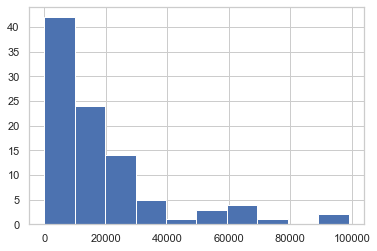

In [222]:
conoceme[conoceme['PROYECCION_VENTAS'] < 100000]['PROYECCION_VENTAS'].hist()

<AxesSubplot:>

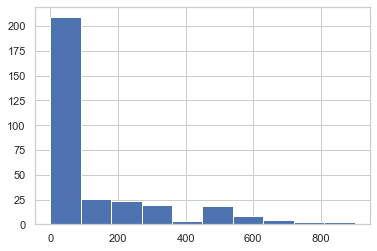

In [223]:
conoceme[conoceme['PROYECCION_INVERSION'] < 1000]['PROYECCION_INVERSION'].hist()

In [224]:
conoceme.isnull().sum()

COD_UNICO                           0
ACTIVIDAD                          10
SUBSECTOR                          20
BACKLOG                            37
MODELO_NEGOCIO                      6
VENTAJA_COMPETITIVA                23
FORTALEZAS_RIESGOS                 46
INTEGRACION_VERTICAL             1061
GESTION_COMPRAS                   987
REGISTRO                            0
GERENTE_GENERAL                    25
GERENTE_FINANCIERO_TIPO           168
GERENTE_FINANCIERO_NOMBRE         233
TIPO_CONTABILIDAD                   0
MONTO_LINEA_PROVEEDORES           443
ACTIVO_LIBRE_GRAVAMEN             443
PROYECCION_INVERSION              689
PROYECCION_VENTAS                 962
FECHA_ACTUALIZACION                 0
PROCEDENCIA_MPRIMA                252
LINEA_SUCESION_FLAG                 1
LINEA_SUCESION                    443
CAMBIO_GERENCIA_GENERAL_ANNIO    1057
CAMBIO_ACCIONISTAS_ANNIO         1058
INICIO_IBK                         71
INICIO_OP                          74
FECHA_CARGA 

In [225]:
analisis_cliente.head()

,PERIODO,COD_UNICO,RUC,FLG_VIGENTE,NOMBRE_COMPLETO,FLG_SUSPENDIDO,FLG_VENCIDA,FLG_CANCELADO,FLG_MONOLINEA,FLG_SOLO_REACTIVA,...,TIENE_DISMINUCION_PROM_CANT_TRX_U6M_U12M_y,TIENE_AUMENTO_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_AUMENTO_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_5PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_10PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_20PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,TIENE_DISMINUCION_30PERCENT_A_MAS_CANT_TRX_CASHOUT_MES_ANT,CANT_TRX_CASHOUT_MES_ANTERIOR,CANT_TRX_CASHOUT_MES_ACTUAL
0,202008,0003041431,20100132916,1,CERAMICOS PERUANOS,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,202008,0003142478,20100013747,1,BIOCON DEL PERU,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,202008,0003107943,20114022838,0,ARENERA JAEN,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,202008,0003084548,20211040352,1,QUIMICOS GOICOCHEA,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202008,0002746782,20109015611,0,OFTALMOLOGOS CONTRERAS CAMPOS,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
len(conoceme['SUBSECTOR'].unique())

65

In [227]:
print(conoceme['SUBSECTOR'].unique())

['Transporte de Carga' 'Servicios De Ingeniería' 'Artículos diversos'
 'Clínicas' 'Acondicionamiento de Edificios' 'Hidrocarburos'
 'Textil y calzado' 'Servicios diversos' 'Limpieza' 'Minería'
 'Productos Eléctricos' 'Equipos computo' 'Construcción de Edificios'
 'Agrícola (Granos y Frutos)' 'Equipos' 'Turismo' 'Taller Automotriz'
 'Abarrotes' 'Metalmecánica' 'Fundición y Metales' 'Ganadero'
 'Restaurante y eventos sociales'
 'Agencia de Aduanas y servicios relacionados' 'Imprenta y papel'
 'Publicidad' 'Artículos de limpieza' 'Productos Marinos' None
 'Construcción de Carreteras' 'Hotelería' 'Plástico y derivados'
 'Catering' 'Tecnología y Telecomunicaciones' 'Alquiler de equipos'
 'Estación de Servicio' 'Obras civiles' 'Medicamentos y equipos médicos'
 'Madera' 'Saneamiento' 'Vehículos, repuestos y accesorios'
 'Mantenimiento' 'Empresa de Transmisión' 'Transporte interprovincial'
 'Químicos' 'Agrícola (Siembra)' 'Gestión Empresarial'
 'Bebidas alcohólicas' 'Servicios financieros'
 'A

In [228]:
texto_banca = 'Vehículos_Textil y calzado_Turismo_Restaurante y eventos sociales_Hotelería_Transporte interprovincial_Transporte Urbano_Construcción de Edificio_Acondicionamiento de Edificios'

In [229]:
analisis_cliente = analisis_cliente.merge(
    conoceme[['COD_UNICO', 'ACTIVIDAD', 'SUBSECTOR', 'BACKLOG', 'INICIO_IBK', 'INICIO_OP',
              'CAMBIO_GERENCIA_GENERAL_ANNIO', 'CAMBIO_ACCIONISTAS_ANNIO', 'FECHA_CARGA',
             'PROYECCION_INVERSION', 'PROYECCION_VENTAS', 'TIPO_CONTABILIDAD']].rename(
        columns={'FECHA_CARGA': 'FECHA_CARGA_CONOCEME'}
    ),
    how='left', on=['COD_UNICO']
)

analisis_cliente.shape

(26910, 1058)

In [230]:
analisis_cliente['subsector_obervado_banca'] = analisis_cliente['SUBSECTOR'].apply(lambda _: str(_).upper() in texto_banca.upper()).astype(int)

In [231]:
del conoceme

In [232]:
analisis_cliente['NO_TIENE_CONOCEME'] = analisis_cliente['FECHA_CARGA_CONOCEME'].apply(lambda _: 1 if pd.isnull(_) else 0)

In [233]:
pd.crosstab(
    analisis_cliente['NO_TIENE_CONOCEME'].fillna(-1), analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
NO_TIENE_CONOCEME,,,,,,,,,,
0,1013,1000,983,971,973,961,958,947,933,931
1,1415,1499,1524,1523,1528,1931,1942,1956,1957,1965


In [234]:
#vpc['ES_ACTIVO'].value_counts(dropna=False)

In [235]:
#vpc['PERIODO'].max()

In [236]:
'FEC_INGRESO' in analisis_cliente.columns

True

In [237]:
if 'FEC_PRIMER_PRODUCTO_APERTURADO' in analisis_cliente.columns:
    del analisis_cliente['FEC_PRIMER_PRODUCTO_APERTURADO']
    
analisis_cliente['CLASIF_SBS'] = analisis_cliente['CLASIF_SBS'].fillna('MULO')
analisis_cliente['CLASIF_IBK'] = analisis_cliente['CLASIF_IBK'].fillna('MULO')
analisis_cliente['DEPARTAMENTO'] = analisis_cliente['DEPARTAMENTO'].fillna('MULO')

analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente[['CLASIF_SBS', 'CLASIF_IBK']].apply(lambda _: _[0].upper() == 'NORMAL' and  _[1].upper() == 'NORMAL', axis=1)
analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].fillna('NULO')
analisis_cliente['LUGAR'] = analisis_cliente['DEPARTAMENTO'].apply(lambda _: 'PROVINCIA' if _.upper() not in ['LIMA', 'CALLAO'] else _)

In [238]:
#vpc['COD_UNICO'] = vpc['CODUNICOCLI']
#vpc.shape, vpc.groupby(by=['PERIODO', 'COD_UNICO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

In [239]:
#vpc['COD_UNICO'].unique().shape

In [240]:
#def apply_upper(val):
#    if pd.isnull(val):
#       return None
    
#    return val.upper()
#vpc['FEVE'] = vpc['FEVE'].apply(lambda _: apply_upper(_))
#vpc['IS_NORMAL_IBK_SBS'] = vpc['IS_NORMAL_IBK_SBS'].astype(int)
#vpc['DEPARTAMENTO'] = vpc['DEPARTAMENTO'].apply(lambda _: apply_upper(_))
#vpc.head()

In [241]:
#vpc['FEVE_DURO'] = vpc['FEVE'].copy()
#del vpc['FEVE']

In [242]:
analisis_cliente.shape

(26910, 1061)

#### TARGET FEVE

In [243]:
query_vpc = """
    SELECT * FROM ODS.HD_VMVP_VPC_CLIENTE_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
vpc = pd.read_sql(
   query_vpc , connection_market
)
vpc.head()

,PERIODO,CODUNICOCLI,FEVE,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,NUM_RUC
0,202003,0015320623,EX-FEVE,S,NORMAL,NORMAL,LIMA,2017-09-19,2017-12-05,SERVICIOS,20518300831
1,202008,0011863267,REDUCIR,S,NORMAL,NORMAL,TUMBES,2010-08-09,2011-10-26,PESCA,20484136689
2,202008,0014685764,None,S,NORMAL,NORMAL,LIMA,2016-05-24,2020-03-05,SERVICIOS,20392465899
3,202008,0014920928,None,S,NORMAL,NORMAL,LIMA,2016-11-15,2020-07-14,MINERÍA,20494472725
4,202008,0014952587,None,S,NORMAL,NORMAL,LIMA,2016-12-06,2020-05-07,SERVICIOS,20550334551


In [244]:
vpc['PERIODO'].max(), vpc['PERIODO'].min(), vpc.shape

('202105', '202001', (54385, 11))

In [245]:
vpc['COD_UNICO'] = vpc['CODUNICOCLI'].copy()

vpc = vpc.rename(columns={'FEVE': 'FEVE_VPC'}).merge(
    analisis_cliente[['PERIODO', 'COD_UNICO', 'FEVE']], how='left', on=['PERIODO', 'COD_UNICO']
).sort_values(by=['PERIODO'])
vpc.tail(50)

,PERIODO,CODUNICOCLI,FEVE_VPC,ES_ACTIVO,CLASIF_SBS,CLASIF_IBK,DEPARTAMENTO,FEC_INGRESO,FEC_PRIMER_PRODUCTO_APERTURADO,SEI_MCDO,NUM_RUC,COD_UNICO,FEVE
42066,202105,0011873826,SEGUIR,S,NORMAL,NORMAL,LIMA,2010-08-10,2015-11-26,COMERCIO,20510942559,0011873826,SEGUIR
42065,202105,0011871622,REDUCIR,S,DEFICIENTE,DEFICIENTE,CALLAO,2010-08-10,1950-01-01,TRANSPORTE,20500906805,0011871622,REDUCIR
42064,202105,0011870909,None,S,NORMAL,NORMAL,LIMA,2010-08-10,2019-03-25,SERVICIOS,20510752938,0011870909,NaN
42063,202105,0011868929,EX-FEVE,S,NORMAL,NORMAL,TUMBES,2010-08-10,2014-06-13,COMERCIO,20484296023,0011868929,EX-FEVE
42062,202105,0011868805,None,S,NORMAL,NORMAL,SAN MARTIN,2010-08-10,2017-07-03,INDUSTRIA,20450301214,0011868805,NaN
42061,202105,0011861122,EX-FEVE,S,NORMAL,NORMAL,LA LIBERTAD,2010-08-06,2014-04-23,TRANSPORTE,20481320900,0011861122,EX-FEVE
42060,202105,0011859294,None,S,NORMAL,NORMAL,LIMA,2010-08-06,2013-04-12,COMERCIO,20358856684,0011859294,NaN
42059,202105,0011858365,None,S,NORMAL,NORMAL,LIMA,2010-08-06,2015-09-23,COMERCIO,20100579228,0011858365,NaN
42057,202105,0011606170,None,S,NORMAL,NORMAL,LIMA,2010-03-08,2010-03-08,SERVICIOS,20507222529,0011606170,NaN
42056,202105,0011605243,EX-FEVE,S,NORMAL,NORMAL,LIMA,2010-03-08,2013-03-12,MINERÍA,20511165181,0011605243,EX-FEVE


In [246]:
vpc[vpc['COD_UNICO'] == str(4017117).zfill(10)].sort_values(by=['PERIODO'])[['PERIODO', 'FEVE', 'FEVE_VPC']]

,PERIODO,FEVE,FEVE_VPC
36953,202001,NaN,EX-FEVE
42573,202002,NaN,EX-FEVE
42557,202003,NaN,EX-FEVE
42539,202004,NaN,EX-FEVE
42522,202005,NaN,EX-FEVE
37567,202006,NaN,EX-FEVE
37546,202007,NaN,SEGUIR
36978,202008,SEGUIR COVID,SEGUIR
36998,202009,SEGUIR COVID,SEGUIR
37019,202010,SEGUIR COVID,SEGUIR


In [247]:
vpc['FEVE'] = vpc['FEVE'].combine_first(vpc['FEVE_VPC']).apply(lambda _: None if pd.isnull(_) else _.upper())

In [248]:
#analisis_cliente = analisis_cliente.merge(
#    vpc[['PERIODO', 'COD_UNICO', 'ES_ACTIVO', 'DIFF_TIME_INICIO_IBK_FIRST_PRODUCT', 'SEI_MCDO', 'LUGAR', 'DEPARTAMENTO', 'FEC_INGRESO']],
#    how='left', on=['PERIODO','COD_UNICO']
#)
analisis_cliente.shape

(26910, 1061)

In [249]:
analisis_cliente[analisis_cliente['PERIODO'].astype(int) >= 202007]['FEC_INGRESO'].head()

0    1995-02-03
1    1995-02-24
2    1995-02-17
3    1995-02-13
4    1994-11-30
Name: FEC_INGRESO, dtype: object

In [250]:
tramo[1][3:]

[202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011]

In [251]:
#vpc['PERIODO'].isin(tramo[1][3:]).shape

In [252]:
#base.columns

## >> REDUCIR SALIR JIOIN WITH SEGUIR COVID

In [253]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR', 'SEGUIR COVID'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_reducir_salir_seguircovid_join'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_reducir_salir_seguircovid_join'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (35, 4)
202010 [202011, 202012] 202010
(6502, 4) (64, 4)
202011 [202012, 202101] 202011
(9753, 4) (146, 4)
202012 [202101, 202102] 202012
(13004, 4) (224, 4)
202101 [202102, 202103] 202101
(16255, 4) (257, 4)
202102 [202103, 202104] 202102
(19506, 4) (297, 4)
202103 [202104, 202105] 202103
(22757, 4) (327, 4)
202104 [202105, 202106] 202104
(26008, 4) (332, 4)


,COD_UNICO,0,target_reducir_salir_seguircovid_join,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [254]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_reducir_salir_seguircovid_join']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_reducir_salir_seguircovid_join'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(26910, 1062)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_reducir_salir_seguircovid_join,,,,,,,,,,,
-1.0,2428,319,337,340,351,429,434,428,438,2896,8400
0.0,0,2148,2143,2112,2114,2431,2428,2445,2447,0,18268
1.0,0,32,27,42,36,32,38,30,5,0,242
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


In [255]:
del reducir_salir
del feve_duro
del no_blancos

In [256]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR', 'SEGUIR COVID'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_reducir_salir_seguircovid_join_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_reducir_salir_seguircovid_join_3Mbueno'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (35, 4)
202010 [202011, 202012] 202010
(6502, 4) (64, 4)
202011 [202012, 202101] 202011
(9753, 4) (147, 4)
202012 [202101, 202102] 202012
(13004, 4) (225, 4)
202101 [202102, 202103] 202101
(16255, 4) (259, 4)
202102 [202103, 202104] 202102
(19506, 4) (305, 4)
202103 [202104, 202105] 202103
(22757, 4) (341, 4)
202104 [202105, 202106] 202104
(26008, 4) (347, 4)


,COD_UNICO,0,target_reducir_salir_seguircovid_join_3Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [257]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_reducir_salir_seguircovid_join_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_reducir_salir_seguircovid_join_3Mbueno'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(26910, 1063)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_reducir_salir_seguircovid_join_3Mbueno,,,,,,,,,,,
-1.0,2428,314,336,333,336,407,399,394,408,2896,8251
0.0,0,2153,2144,2118,2129,2452,2457,2473,2476,0,18402
1.0,0,32,27,43,36,33,44,36,6,0,257
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


In [258]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR', 'SEGUIR COVID'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_reducir_salir_seguircovid_join_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_reducir_salir_seguircovid_join_2Mbueno'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (35, 4)
202010 [202011, 202012] 202010
(6502, 4) (65, 4)
202011 [202012, 202101] 202011
(9753, 4) (148, 4)
202012 [202101, 202102] 202012
(13004, 4) (227, 4)
202101 [202102, 202103] 202101
(16255, 4) (262, 4)
202102 [202103, 202104] 202102
(19506, 4) (311, 4)
202103 [202104, 202105] 202103
(22757, 4) (348, 4)
202104 [202105, 202106] 202104
(26008, 4) (354, 4)


,COD_UNICO,0,target_reducir_salir_seguircovid_join_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [259]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_reducir_salir_seguircovid_join_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_reducir_salir_seguircovid_join_2Mbueno'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(26910, 1064)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_reducir_salir_seguircovid_join_2Mbueno,,,,,,,,,,,
-1.0,2428,314,331,323,330,390,389,386,395,2896,8182
0.0,0,2153,2149,2128,2135,2469,2465,2480,2489,0,18468
1.0,0,32,27,43,36,33,46,37,6,0,260
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


In [260]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR', 'SEGUIR COVID'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_reducir_salir_seguircovid_join_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_reducir_salir_seguircovid_join_1Mbueno'] == 1].shape)
    
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (36, 4)
202010 [202011, 202012] 202010
(6502, 4) (68, 4)
202011 [202012, 202101] 202011
(9753, 4) (152, 4)
202012 [202101, 202102] 202012
(13004, 4) (234, 4)
202101 [202102, 202103] 202101
(16255, 4) (272, 4)
202102 [202103, 202104] 202102
(19506, 4) (327, 4)
202103 [202104, 202105] 202103
(22757, 4) (366, 4)
202104 [202105, 202106] 202104
(26008, 4) (376, 4)


,COD_UNICO,0,target_reducir_salir_seguircovid_join_1Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [261]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_reducir_salir_seguircovid_join_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_reducir_salir_seguircovid_join_1Mbueno'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(26910, 1065)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_reducir_salir_seguircovid_join_1Mbueno,,,,,,,,,,,
-1.0,2428,309,319,317,310,378,376,371,380,2896,8084
0.0,0,2158,2159,2134,2153,2478,2472,2493,2500,0,18547
1.0,0,32,29,43,38,36,52,39,10,0,279
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


# >> REDUCIR SALIR

In [262]:
contador = 1
for tramo in tramos:
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    print(tramo[0], delante, just_antes)
    break

202009 [202010, 202011] 202009


In [263]:
analisis_cliente['PERIODO'].value_counts()

202103    2903
202102    2900
202105    2896
202101    2892
202104    2890
202010    2507
202012    2501
202009    2499
202011    2494
202008    2428
Name: PERIODO, dtype: int64

In [264]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_feve_reducir_salir'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_feve_reducir_salir'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (23, 4)
202010 [202011, 202012] 202010
(6502, 4) (37, 4)
202011 [202012, 202101] 202011
(9753, 4) (63, 4)
202012 [202101, 202102] 202012
(13004, 4) (85, 4)
202101 [202102, 202103] 202101
(16255, 4) (103, 4)
202102 [202103, 202104] 202102
(19506, 4) (125, 4)
202103 [202104, 202105] 202103
(22757, 4) (149, 4)
202104 [202105, 202106] 202104
(26008, 4) (162, 4)


,COD_UNICO,0,target_feve_reducir_salir,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [265]:
feve['PERIODO'].value_counts()

202009    3251
202104    3251
202012    3251
202102    3251
202011    3251
202101    3251
202103    3251
202010    3251
Name: PERIODO, dtype: int64

In [266]:
#feve[feve['PERIODO'].astype(int) >= 202007]['target_feve_reducir_salir'].value_counts(dropna=False)

In [267]:
analisis_cliente.shape

(26910, 1065)

In [268]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(26910, 1066)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_feve_reducir_salir,,,,,,,,,,,
-1.0,2428,111,122,120,123,159,158,160,161,2896,6438
0.0,0,2368,2373,2350,2358,2715,2720,2719,2716,0,20319
1.0,0,20,12,24,20,18,22,24,13,0,153
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


In [269]:
del feve

In [270]:
del transac_cliente

In [271]:
gc.collect()

66

### TARGET FEVE 3 NMES DE BUENO HACI ATARS

In [272]:

#for tramo in tramos:
#    delante = tramo[-1]
#    print(tramo[0], tramo[-1], tramo[1][-3], tramo[2][-3:])
    
#    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
#    display(pd.crosstab(
#        reducir_salir['FEVE'], reducir_salir['PERIODO']
#    ))
#    print(len(set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])))
#    print(len(set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])))
   # print(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2])].shape)


In [273]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])

    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_feve_reducir_salir_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_feve_reducir_salir_3Mbueno'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (23, 4)
202010 [202011, 202012] 202010
(6502, 4) (37, 4)
202011 [202012, 202101] 202011
(9753, 4) (63, 4)
202012 [202101, 202102] 202012
(13004, 4) (85, 4)
202101 [202102, 202103] 202101
(16255, 4) (103, 4)
202102 [202103, 202104] 202102
(19506, 4) (125, 4)
202103 [202104, 202105] 202103
(22757, 4) (149, 4)
202104 [202105, 202106] 202104
(26008, 4) (162, 4)


,COD_UNICO,0,target_feve_reducir_salir_3Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [274]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir_3Mbueno'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(26910, 1067)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_feve_reducir_salir_3Mbueno,,,,,,,,,,,
-1.0,2428,106,121,119,121,153,152,155,156,2896,6407
0.0,0,2373,2374,2351,2360,2721,2726,2724,2721,0,20350
1.0,0,20,12,24,20,18,22,24,13,0,153
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


In [275]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_feve_reducir_salir,,,,,,,,,,,
-1.0,2428,111,122,120,123,159,158,160,161,2896,6438
0.0,0,2368,2373,2350,2358,2715,2720,2719,2716,0,20319
1.0,0,20,12,24,20,18,22,24,13,0,153
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


In [276]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])

    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_feve_reducir_salir_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_feve_reducir_salir_2Mbueno'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (23, 4)
202010 [202011, 202012] 202010
(6502, 4) (37, 4)
202011 [202012, 202101] 202011
(9753, 4) (63, 4)
202012 [202101, 202102] 202012
(13004, 4) (85, 4)
202101 [202102, 202103] 202101
(16255, 4) (103, 4)
202102 [202103, 202104] 202102
(19506, 4) (125, 4)
202103 [202104, 202105] 202103
(22757, 4) (149, 4)
202104 [202105, 202106] 202104
(26008, 4) (162, 4)


,COD_UNICO,0,target_feve_reducir_salir_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [277]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir_2Mbueno'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(26910, 1068)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_feve_reducir_salir_2Mbueno,,,,,,,,,,,
-1.0,2428,106,121,117,120,153,151,152,153,2896,6397
0.0,0,2373,2374,2353,2361,2721,2727,2727,2724,0,20360
1.0,0,20,12,24,20,18,22,24,13,0,153
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


In [278]:
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(tramo[2][-1:])]['COD_UNICO'])
    
    print(len(feve_duro), len(no_blancos))

202009 [202010, 202011] 202009
158 139
202010 [202011, 202012] 202010
162 155
202011 [202012, 202101] 202011
173 151
202012 [202101, 202102] 202012
178 158
202101 [202102, 202103] 202101
184 171
202102 [202103, 202104] 202102
187 173
202103 [202104, 202105] 202103
194 176
202104 [202105, 202106] 202104
183 181


In [279]:
contador = 1

for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    reducir_salir = vpc[vpc['FEVE'].isin(['REDUCIR', 'SALIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])

    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_feve_reducir_salir_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    
    print(feve.shape, feve[feve['target_feve_reducir_salir_1Mbueno'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (23, 4)
202010 [202011, 202012] 202010
(6502, 4) (37, 4)
202011 [202012, 202101] 202011
(9753, 4) (63, 4)
202012 [202101, 202102] 202012
(13004, 4) (85, 4)
202101 [202102, 202103] 202101
(16255, 4) (103, 4)
202102 [202103, 202104] 202102
(19506, 4) (125, 4)
202103 [202104, 202105] 202103
(22757, 4) (149, 4)
202104 [202105, 202106] 202104
(26008, 4) (162, 4)


,COD_UNICO,0,target_feve_reducir_salir_1Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [280]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir_1Mbueno'].fillna(-1),  analisis_cliente['PERIODO'], margins=True
)

(26910, 1069)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,All
target_feve_reducir_salir_1Mbueno,,,,,,,,,,,
-1.0,2428,106,119,116,120,152,149,149,151,2896,6386
0.0,0,2373,2376,2354,2361,2722,2729,2730,2726,0,20371
1.0,0,20,12,24,20,18,22,24,13,0,153
All,2428,2499,2507,2494,2501,2892,2900,2903,2890,2896,26910


## >>> RESCATE SEGUIR COVID

In [281]:
max_period_vpc = analisis_cliente['PERIODO'].max()
max_period_vpc

'202105'

In [282]:
clientes = pd.read_csv("clientes.csv", dtype={'COD_UNICO': str, 'PERIODO': str})

In [283]:
clientes = clientes[['COD_UNICO', 'FEVE']]
clientes['PERIODO'] = max_period_vpc
clientes['FEVE_'] = clientes['FEVE'].str.upper()
clientes.head()

,COD_UNICO,FEVE,PERIODO,FEVE_
0,0003041431,GARANTIZAR,202105,GARANTIZAR
1,0003142478,EX-FEVE,202105,EX-FEVE
2,0003107943,EX-FEVE,202105,EX-FEVE
3,0003084548,NaN,202105,NaN
4,0002746782,NaN,202105,NaN


In [284]:
clientes['FEVE_'].value_counts()

EX-FEVE         7230
SEGUIR          2073
SEGUIR COVID    1767
GARANTIZAR      1344
REDUCIR          995
SALIR            313
Name: FEVE_, dtype: int64

In [285]:
#analisis_cliente = analisis_cliente.merge(
#    clientes, how='left', on=['COD_UNICO', 'PERIODO']
#)

In [286]:
#vpc['FEVE_'] = vpc['FEVE_'].combine_first(vpc['FEVE_x'])
#vpc.head()

In [287]:
#feve_duro = list(vpc[
#    (vpc['FEVE_x'].isin(['SEGUIR'])) &(vpc['FEVE_'].isin(['SEGUIR COVID'])) & (
#        (vpc['PERIODO'] == str(202009)) | (vpc['PERIODO'] == str(202010))
#    )
#]['COD_UNICO'])
#print(feve_duro, len(feve_duro))

In [288]:
#descarte = list(vpc[
#    (vpc['FEVE_'].isin(['REDUCIR', 'SALIR', 'SEGUIR'])) & (vpc['PERIODO'] == str(202008)) 

#]['COD_UNICO'])
#print(len(descarte))
#print(set(feve_duro) - set(descarte), len(set(feve_duro) - set(descarte)))

In [289]:
#vpc[vpc['COD_UNICO'] == '0011463767'].sort_values(by=['PERIODO'])

# >> SEGUIR COVID

In [290]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    reducir_salir = vpc[vpc['FEVE'].isin(['SEGUIR COVID'])]
    reducir_salir_duro = vpc[vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir_duro[reducir_salir_duro['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_seguir_covid'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['target_seguir_covid'] == 1].shape)
seguir.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (17, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (34, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (98, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (165, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (195, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (226, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (242, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (242, 4)


,COD_UNICO,0,target_seguir_covid,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [291]:
seguir['target_seguir_covid'].value_counts()

0.0    22292
1.0      242
Name: target_seguir_covid, dtype: int64

In [292]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'target_seguir_covid']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1070)

In [293]:
'target_seguir_covid' in analisis_cliente.columns

True

In [294]:
analisis_cliente[
    (analisis_cliente['target_feve_reducir_salir'] == 1) | (analisis_cliente['target_seguir_covid'] == 1)
].shape

(313, 1070)

In [295]:
pd.crosstab(
    analisis_cliente['target_seguir_covid'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104,All
target_seguir_covid,,,,,,,,,
0.0,2163,2153,2128,2123,2434,2437,2459,2452,18349
1.0,17,17,26,27,29,29,16,0,161
All,2180,2170,2154,2150,2463,2466,2475,2452,18510


In [296]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'], analisis_cliente['target_seguir_covid'], margins=True
)

target_seguir_covid,0.0,1.0,All
target_feve_reducir_salir,,,
0.0,18268,160,18428
1.0,81,1,82
All,18349,161,18510


In [297]:
analisis_cliente['target_seguircovid_reducir_salir'] = analisis_cliente[['target_feve_reducir_salir', 'target_seguir_covid']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [298]:
pd.crosstab(
    analisis_cliente['target_feve_reducir_salir'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104,All
target_feve_reducir_salir,,,,,,,,,
0.0,2368,2373,2350,2358,2715,2720,2719,2716,20319
1.0,20,12,24,20,18,22,24,13,153
All,2388,2385,2374,2378,2733,2742,2743,2729,20472


In [299]:
pd.crosstab(
    analisis_cliente['target_seguircovid_reducir_salir'], analisis_cliente['PERIODO'], margins=True
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104,All
target_seguircovid_reducir_salir,,,,,,,,,
0.0,2148,2143,2112,2114,2431,2428,2445,2447,18268
1.0,32,27,42,36,32,38,30,5,242
All,2180,2170,2154,2150,2463,2466,2475,2452,18510


#### TARGET SEGUIR COVID

In [300]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    

    reducir_salir = vpc[vpc['FEVE'].isin(['SEGUIR COVID'])]
    reducir_salir_duro = vpc[vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir_duro[reducir_salir_duro['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_seguir_covid_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['target_seguir_covid_3Mbueno'] == 1].shape)
seguir.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (17, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (34, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (99, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (166, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (197, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (234, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (256, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (256, 4)


,COD_UNICO,0,target_seguir_covid_3Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [301]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'target_seguir_covid_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1072)

In [302]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    

    reducir_salir = vpc[vpc['FEVE'].isin(['SEGUIR COVID'])]
    reducir_salir_duro = vpc[vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir_duro[reducir_salir_duro['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_seguir_covid_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['target_seguir_covid_2Mbueno'] == 1].shape)
seguir.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (17, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (35, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (100, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (168, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (200, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (239, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (261, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (261, 4)


,COD_UNICO,0,target_seguir_covid_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [303]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'target_seguir_covid_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1073)

In [304]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    

    reducir_salir = vpc[vpc['FEVE'].isin(['SEGUIR COVID'])]
    reducir_salir_duro = vpc[vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])]
    feve_duro = set(reducir_salir[reducir_salir['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(reducir_salir_duro[reducir_salir_duro['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_seguir_covid_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['target_seguir_covid_1Mbueno'] == 1].shape)
seguir.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (18, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (37, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (103, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (172, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (204, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (243, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (267, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (267, 4)


,COD_UNICO,0,target_seguir_covid_1Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [305]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'target_seguir_covid_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1074)

In [306]:

analisis_cliente['target_seguircovid_reducir_salir_3Mbueno'] = analisis_cliente[['target_feve_reducir_salir_3Mbueno', 'target_seguir_covid_3Mbueno']].apply(
   lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)


In [307]:

analisis_cliente['target_seguircovid_reducir_salir_1Mbueno'] = analisis_cliente[['target_feve_reducir_salir_1Mbueno', 'target_seguir_covid_1Mbueno']].apply(
     lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)


In [308]:

analisis_cliente['target_seguircovid_reducir_salir_2Mbueno'] = analisis_cliente[['target_feve_reducir_salir_2Mbueno', 'target_seguir_covid_2Mbueno']].apply(
     lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [309]:
'target_seguircovid_reducir_salir_1Mbueno' in analisis_cliente.columns, 'target_seguircovid_reducir_salir_2Mbueno' in analisis_cliente.columns

(True, True)

## >> TARGET CONTRASTE PREOCUPA

In [310]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    feve_duro = list(vpc[
        (vpc['FEVE'].isin(['SEGUIR COVID', 'SALIR', 'REDUCIR'])) & (
            (vpc['PERIODO'] == str(delante[0])) | (vpc['PERIODO'] == str(delante[1]))
        )
    ]['COD_UNICO'])
    
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in feve_duro:
            return 1
        else:
            return 0
    
    quedan['cuasi_target_preocupa'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        seguir = quedan
    else:
        seguir = pd.concat(
            [seguir, quedan], axis=0
        )
    
    contador += 1

    
    print(seguir.shape, seguir[seguir['cuasi_target_preocupa'] == 1].shape)
seguir.head()

202009 [202010, 202011] 202009
(3251, 4) (365, 4)
202010 [202011, 202012] 202010
(6502, 4) (739, 4)
202011 [202012, 202101] 202011
(9753, 4) (1151, 4)
202012 [202101, 202102] 202012
(13004, 4) (1568, 4)
202101 [202102, 202103] 202101
(16255, 4) (1992, 4)
202102 [202103, 202104] 202102
(19506, 4) (2423, 4)
202103 [202104, 202105] 202103
(22757, 4) (2843, 4)
202104 [202105, 202106] 202104
(26008, 4) (3026, 4)


,COD_UNICO,0,cuasi_target_preocupa,PERIODO
0,0000002469,10,0,202009
1,0000003392,10,0,202009
2,0000006114,10,0,202009
3,0000006726,1,0,202009
4,0000008045,5,0,202009


In [311]:
seguir['cuasi_target_preocupa'].value_counts()

0    22982
1     3026
Name: cuasi_target_preocupa, dtype: int64

In [312]:
analisis_cliente = analisis_cliente.merge(
    seguir[['PERIODO', 'COD_UNICO', 'cuasi_target_preocupa']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1078)

In [313]:
#analisis_cliente.to_csv("HM_UNIVERSO_VARIABKES_ALERTA_BE_PART_1.csv", index=False)

In [314]:
#analisis_cliente.to_excel("HM_UNIVERSO_VARIABKES_ALERTA_BE_PART_1.xlsx", index=False)

In [315]:
#[col for col in analisis_cliente.columns if 'target' in col] + ['COD_UNICO', 'PERIODO']

In [316]:
def reduce_size_data(df, category=False, default=''):
    #print("INITIAL SIZE : DEEP", get_memory_usage(df), "REAL", get_memory_usage(df, deep=False))
    # print("-> Int 64 Detected")
    for col in df.select_dtypes(include=['int']).columns:
        #print(" "*4, col, end=' ')
        df[col] = pd.to_numeric(arg=df[col], downcast=default or'integer')
   
    # print("-> Float 64 Detected")
    for col in df.select_dtypes(include=['float']).columns:
        #print(" "*4, col, end=' ')
        df[col] = pd.to_numeric(arg=df[col], downcast=default or'float')
   
    if category:
        for col in df.select_dtypes(include=['object']).columns:
            if len(df[col].unique()) / len(df[col]) < 0.5:
                df[col] = df[col].astype('category')
    print(" ")
    #print("FINAL SIZE : DEPP", get_memory_usage(df), "REAL", get_memory_usage(df, deep=False))              
    return df

In [317]:
analisis_cliente = reduce_size_data(analisis_cliente)

In [318]:
#%%time
#from sqlalchemy import event, create_engine

#@event.listens_for(engine, 'before_cursor_execute')
#def receive_before_cursor_execute(conn, cursor, statement, params, context, executemany):
#    if executemany:
#        cursor.fast_executemany = True

        
#engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
#connection_x = engine.connect()

#try:
#    analisis_cliente[[col for col in analisis_cliente.columns if 'target' in col] + ['COD_UNICO', 'PERIODO']].to_sql(
#        name='UNIVERSO_VARIABLES_ALERTA_BE_PART_1',
#        #schema='ODS',
#        con=connection_x, 
#        index=False, 
#        if_exists='replace',
#        method='multi'
 #   )
#    connection_x.close()
#    correct = 1
#except Exception as e:
#    print("ERROR: ", str(e))
#    correct = 0

#print(correct)

# >> NO NOMRLA SBS O IBK

In [319]:
analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente[['CLASIF_SBS', 'CLASIF_IBK']].apply(
    lambda _: None if pd.isnull(_[0] ) else( 1 if _[0].upper() == 'NORMAL' and  _[1].upper() == 'NORMAL' else 0), axis=1
)

In [320]:
#nalisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].astype(int)

In [321]:
delante = [202009, 202010]
just_antes = 202008
no_normales = list(analisis_cliente[
    (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (
        (analisis_cliente['PERIODO'] == str(delante[0])) | (analisis_cliente['PERIODO'] == str(delante[1]))
    )
]['COD_UNICO'])
print(len(no_normales))
descarte = list(analisis_cliente[
    (analisis_cliente['IS_NORMAL_IBK_SBS'] == 0) & (analisis_cliente['PERIODO'] == str(just_antes)) 
]['COD_UNICO'])
print(len(descarte))

print(set(no_normales) - set(descarte)) 

274
121
{'0011873524', '0011608752', '0015795764', '0016294193', '0016199187', '0000229633', '0015028117', '0010847030', '0011859551', '0012638018', '0014055971', '0014121784', '0016355793', '0013251454', '0016452109', '0015142223', '0010845883', '0013119587', '0008931389', '0013222358', '0006313993', '0008718102', '0011868582', '0016661983', '0014898678', '0013310457', '0009313748', '0007567530', '0013293126', '0013446995', '0010667842', '0017045094', '0010173069', '0010622858', '0011768131', '0008765837', '0011869001', '0015167346', '0015291369', '0015729885', '0011026743', '0015242107', '0008434467', '0011874141', '0013203613', '0016129832', '0009125935', '0013814763', '0009430500', '0011563661', '0011874206'}


In [322]:
#vpc[vpc['COD_UNICO'] == '0008718102'].sort_values(by=['PERIODO'])

In [323]:
#vpc.head()

In [324]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]

    no_normales = analisis_cliente[analisis_cliente['IS_NORMAL_IBK_SBS'] == 0]
    complicados = set(no_normales[no_normales['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(no_normales[no_normales['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])
    
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in complicados and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_no_normales_ibk_sbs'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        normalidad = quedan
    else:
        normalidad = pd.concat(
            [normalidad, quedan], axis=0
        )
    
    contador += 1   
    
    print(normalidad.shape, normalidad[normalidad['target_no_normales_ibk_sbs'] == 1].shape)
normalidad.head()

202009 [202010, 202011] 202009
(3251, 4) (23, 4)
202010 [202011, 202012] 202010
(6502, 4) (51, 4)
202011 [202012, 202101] 202011
(9753, 4) (120, 4)
202012 [202101, 202102] 202012
(13004, 4) (174, 4)
202101 [202102, 202103] 202101
(16255, 4) (200, 4)
202102 [202103, 202104] 202102
(19506, 4) (242, 4)
202103 [202104, 202105] 202103
(22757, 4) (267, 4)
202104 [202105, 202106] 202104
(26008, 4) (274, 4)


,COD_UNICO,0,target_no_normales_ibk_sbs,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [325]:
analisis_cliente = analisis_cliente.merge(
    normalidad[['PERIODO', 'COD_UNICO', 'target_no_normales_ibk_sbs']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1079)

In [326]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]

    no_normales = analisis_cliente[analisis_cliente['IS_NORMAL_IBK_SBS'] == 0]
    complicados = set(no_normales[no_normales['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(no_normales[no_normales['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])
    
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in complicados and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_no_normales_ibk_sbs_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        normalidad = quedan
    else:
        normalidad = pd.concat(
            [normalidad, quedan], axis=0
        )
    
    contador += 1   
    
    print(normalidad.shape, normalidad[normalidad['target_no_normales_ibk_sbs_3Mbueno'] == 1].shape)
normalidad.head()

202009 [202010, 202011] 202009
(3251, 4) (23, 4)
202010 [202011, 202012] 202010
(6502, 4) (51, 4)
202011 [202012, 202101] 202011
(9753, 4) (120, 4)
202012 [202101, 202102] 202012
(13004, 4) (174, 4)
202101 [202102, 202103] 202101
(16255, 4) (201, 4)
202102 [202103, 202104] 202102
(19506, 4) (245, 4)
202103 [202104, 202105] 202103
(22757, 4) (273, 4)
202104 [202105, 202106] 202104
(26008, 4) (282, 4)


,COD_UNICO,0,target_no_normales_ibk_sbs_3Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [327]:
analisis_cliente = analisis_cliente.merge(
    normalidad[['PERIODO', 'COD_UNICO', 'target_no_normales_ibk_sbs_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1080)

In [328]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]

    no_normales = analisis_cliente[analisis_cliente['IS_NORMAL_IBK_SBS'] == 0]
    complicados = set(no_normales[no_normales['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(no_normales[no_normales['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])
    
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in complicados and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_no_normales_ibk_sbs_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        normalidad = quedan
    else:
        normalidad = pd.concat(
            [normalidad, quedan], axis=0
        )
    
    contador += 1   
    
    print(normalidad.shape, normalidad[normalidad['target_no_normales_ibk_sbs_2Mbueno'] == 1].shape)
normalidad.head()

202009 [202010, 202011] 202009
(3251, 4) (23, 4)
202010 [202011, 202012] 202010
(6502, 4) (51, 4)
202011 [202012, 202101] 202011
(9753, 4) (120, 4)
202012 [202101, 202102] 202012
(13004, 4) (176, 4)
202101 [202102, 202103] 202101
(16255, 4) (203, 4)
202102 [202103, 202104] 202102
(19506, 4) (248, 4)
202103 [202104, 202105] 202103
(22757, 4) (277, 4)
202104 [202105, 202106] 202104
(26008, 4) (286, 4)


,COD_UNICO,0,target_no_normales_ibk_sbs_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [329]:
analisis_cliente = analisis_cliente.merge(
    normalidad[['PERIODO', 'COD_UNICO', 'target_no_normales_ibk_sbs_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1081)

In [330]:
#analisis_cliente['IS_NORMAL_IBK_SBS'] = analisis_cliente['IS_NORMAL_IBK_SBS'].apply(lambda _: None if pd.isnull(_) else int(_))
#analisis_cliente['IS_NORMAL_IBK_SBS'].value_counts()

<AxesSubplot:>

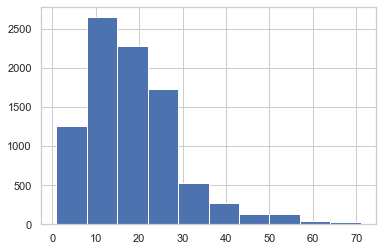

In [331]:
analisis_cliente['ANTIGUEDAD_cracion_ficha'] = 2021 - analisis_cliente['INICIO_OP']
analisis_cliente['ANTIGUEDAD_cracion_ficha'].hist()

In [332]:
#analisis_cliente.to_excel('analisis_cliente_targets.xlsx', index=False)

In [333]:
analisis_cliente['target_feve_reducir_salir'].unique()

array([nan,  0.,  1.], dtype=float32)

In [334]:
"""
def graph_numeric(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

    sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[0])
    sns.violinplot(x=col_init, y=col_out, data=data, ax=axes[1], orient='h')
    
    legend_list = []
    for opt in data[col_out].unique():
        sns.kdeplot(data[data[col_out] == opt][col_init], ax=axes[2], shade=True)
        legend_list.append(opt)
    plt.legend(legend_list)

def graph_categoryc(data, col_init, col_out, **kwargs):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
    
    cp = sns.countplot(x=col_init, hue=col_out, data=data, ax=axes[0])
    plt.setp(cp.get_xticklabels(), rotation=90)
    
    cross = pd.crosstab(data[col_out], data[col_init])
    sum_total = sum([cross[col].sum() for col in cross.columns])
    sns.heatmap(
        cross/sum_total, 
        annot=True, ax=axes[1], center=0, cmap="YlGnBu", fmt='.2%'
    )
    bp = sns.barplot(
        x=col_init, y=col_out, data=data, ax=axes[2]
    )
    plt.setp(bp.get_xticklabels(), rotation=90)
"""

'\ndef graph_numeric(data, col_init, col_out, **kwargs):\n    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))\n\n    sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[0])\n    sns.violinplot(x=col_init, y=col_out, data=data, ax=axes[1], orient=\'h\')\n    \n    legend_list = []\n    for opt in data[col_out].unique():\n        sns.kdeplot(data[data[col_out] == opt][col_init], ax=axes[2], shade=True)\n        legend_list.append(opt)\n    plt.legend(legend_list)\n\ndef graph_categoryc(data, col_init, col_out, **kwargs):\n    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))\n    \n    cp = sns.countplot(x=col_init, hue=col_out, data=data, ax=axes[0])\n    plt.setp(cp.get_xticklabels(), rotation=90)\n    \n    cross = pd.crosstab(data[col_out], data[col_init])\n    sum_total = sum([cross[col].sum() for col in cross.columns])\n    sns.heatmap(\n        cross/sum_total, \n        annot=True, ax=axes[1], center=0, cmap="YlGnBu", fmt=\'.2%\'\n    )\n    bp = sns.barp

In [335]:
#graph_numeric(
#    analisis_cliente[
#        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
#    ], 'NRO_VECES_REACTIVA_SF', 'target_feve_reducir_salir'
#)

In [336]:
#graph_categoryc(
#    analisis_cliente[
#        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].astype(int) >= 202007)
#    ], 'FM_category_quartil', 'target_feve_reducir_salir'
#)

In [337]:
gc.collect()

132

In [338]:
analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((26910, 1082), (26910,))

### SOW 

In [339]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

In [340]:
qsow = """
    SELECT * FROM ODS.HD_VMVP_SOW_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
sow = pd.read_sql(
   qsow , connection_market
)
sow.head(3)

,COD_UNICO,PERIODO,MTOSALDO,MTOSALDO_IBK,MTOSALDO_DIR_SF,MTOSALDO_INDIR_SF,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,SOW_IBK,SOW_BBVA,SOW_BCP,SOW_BIF,SOW_SCOTIA,SOW_OTROSBCOS,PERCENT_COL_DIRECTAS_SF
0,0008713209,201911,8.271862e+06,1029800.11,8.271862e+06,0.0,1.447122e+06,5047819.51,339600.00,407520.0,0.124494,0.174945,0.610239,0.041054,0.049265,0.875505,1.0
1,0014321917,202001,8.953431e+07,0.00,8.953431e+07,0.0,3.100000e+06,55468254.79,30966052.22,0.0,0.000000,0.034623,0.619519,0.345856,0.000000,1.000000,1.0
2,0015320623,202001,2.078384e+08,50610000.00,2.078384e+08,0.0,1.484560e+08,8772400.00,0.00,0.0,0.243506,0.714285,0.042207,0.000000,0.000000,0.756493,1.0


In [341]:
sow['PERIODO'].max()

'202104'

In [342]:
sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, sow['PERIODO'].max()

((64286, 17), (64286,), '202104')

### OJO , cuando tomo una cosecha uso el periodo SOW del mes anterior entonces para cruzarlo debo aumnetar un periodo

In [343]:
sow['PERIODO'] = sow['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
sow['PERIODO'].max()

'202105'

In [344]:
acum_sow = generate_listado_u3m(
   sow, 'listado_sow_ibk', values='SOW_IBK',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=sum
)
acum_sow.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3232, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(6464, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9696, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12928, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(16160, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(19392, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(22624, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(25856, 3)


,COD_UNICO,listado_sow_ibk,PERIODO
0,0000002469,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",202009
1,0000003392,"[0.361979, 0.268879, 0.19548, 0.094579, 0.1338...",202009
2,0000006114,"[0.75724, 0.755488, 0.757866, 0.68279, 0.67899...",202009
3,0000006726,"[0.013267, 0.012333, 0.009437, 0.006746, 0.003...",202009
4,0000008045,"[0.105603, 0.090225, 0.093915, 0.054103, 0.081...",202009


In [345]:
acum_sow['SOW_UTL_RCC_MENOR_0.6'] = acum_sow['listado_sow_ibk'].apply(lambda _: _[-1] < 0.6).astype(int)
acum_sow['SOW_UTL_RCC_MENOR_0.5'] = acum_sow['listado_sow_ibk'].apply(lambda _: _[-1] < 0.5).astype(int)
acum_sow['SOW_UTL_RCC_MENOR_0.4'] = acum_sow['listado_sow_ibk'].apply(lambda _: _[-1] < 0.4).astype(int)
acum_sow['SOW_UTL_RCC_MENOR_0.3'] = acum_sow['listado_sow_ibk'].apply(lambda _: _[-1] < 0.3).astype(int)
acum_sow['SOW_UTL_RCC_MENOR_0.2'] = acum_sow['listado_sow_ibk'].apply(lambda _: _[-1] < 0.2).astype(int)
acum_sow['SOW_UTL_RCC_MENOR_0.1'] = acum_sow['listado_sow_ibk'].apply(lambda _: _[-1] < 0.1).astype(int)
acum_sow['SOW_UTL_RCC_IGUAL_0'] = acum_sow['listado_sow_ibk'].apply(lambda _: _[-1] == 0).astype(int)

pd.crosstab(
    acum_sow['SOW_UTL_RCC_IGUAL_0'], acum_sow['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
SOW_UTL_RCC_IGUAL_0,,,,,,,,
0,2652,2730,2724,2700,2705,2687,2674,2638
1,580,502,508,532,527,545,558,594


In [346]:
acum_sow['SOW_PROM_UTL_3_RCC_MENOR_0.6'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-3:]) < 0.6).astype(int)
acum_sow['SOW_PROM_UTL_3_RCC_MENOR_0.5'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-3:]) < 0.5).astype(int)
acum_sow['SOW_PROM_UTL_3_RCC_MENOR_0.4'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-3:]) < 0.4).astype(int)
acum_sow['SOW_PROM_UTL_3_RCC_MENOR_0.3'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-3:]) < 0.3).astype(int)
acum_sow['SOW_PROM_UTL_3_RCC_MENOR_0.2'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-3:]) < 0.2).astype(int)
acum_sow['SOW_PROM_UTL_3_RCC_MENOR_0.1'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-3:]) < 0.1).astype(int)
acum_sow['SOW_PROM_UTL_3_RCC_IGUAL_0'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-3:]) == 0).astype(int)

pd.crosstab(
    acum_sow['SOW_PROM_UTL_3_RCC_IGUAL_0'], acum_sow['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
SOW_PROM_UTL_3_RCC_IGUAL_0,,,,,,,,
0,2731,2829,2864,2847,2807,2776,2763,2758
1,501,403,368,385,425,456,469,474


In [347]:
acum_sow['SOW_PROM_UTL_6_RCC_MENOR_0.6'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-6:]) < 0.6).astype(int)
acum_sow['SOW_PROM_UTL_6_RCC_MENOR_0.5'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-6:]) < 0.5).astype(int)
acum_sow['SOW_PROM_UTL_6_RCC_MENOR_0.4'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-6:]) < 0.4).astype(int)
acum_sow['SOW_PROM_UTL_6_RCC_MENOR_0.3'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-6:]) < 0.3).astype(int)
acum_sow['SOW_PROM_UTL_6_RCC_MENOR_0.2'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-6:]) < 0.2).astype(int)
acum_sow['SOW_PROM_UTL_6_RCC_MENOR_0.1'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-6:]) < 0.1).astype(int)
acum_sow['SOW_PROM_UTL_6_RCC_IGUAL_0'] = acum_sow['listado_sow_ibk'].apply(lambda _: np.mean(_[-6:]) == 0).astype(int)

pd.crosstab(
    acum_sow['SOW_PROM_UTL_6_RCC_IGUAL_0'], acum_sow['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
SOW_PROM_UTL_6_RCC_IGUAL_0,,,,,,,,
0,2774,2890,2938,2943,2940,2935,2917,2876
1,458,342,294,289,292,297,315,356


<AxesSubplot:>

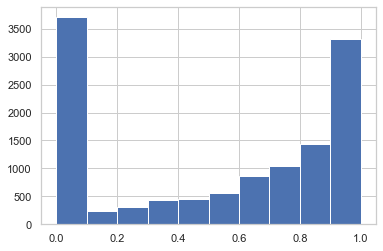

In [348]:
def simple_divv(a, b):
    if b == 0 and a == 0:
        return 0
    if b == 0:
        return 1
    
    return a / b
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'] = acum_sow['listado_sow_ibk'].apply(lambda _: simple_divv(np.mean(_[-3:]), np.mean(_[-6:-3])))
acum_sow[acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'] < 1]['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].hist()

In [349]:
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENORIGUAL_0.99'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ <= 0.99).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENORIGUAL_0.95'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ <= 0.95).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.9'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.9).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.8'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.8).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.7'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.7).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.6'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.6).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.5'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.5).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.4'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.4).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.3'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.3).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.2'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.2).astype(int)
acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.1'] = acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.1).astype(int)


pd.crosstab(
    acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.1'], acum_sow['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.1,,,,,,,,
0,2693,2793,2830,2821,2791,2755,2734,2733
1,539,439,402,411,441,477,498,499


In [350]:
pd.crosstab(
    acum_sow['SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENORIGUAL_0.95'], acum_sow['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENORIGUAL_0.95,,,,,,,,
0,1822,1893,1938,1947,2011,2039,2030,1995
1,1410,1339,1294,1285,1221,1193,1202,1237


<AxesSubplot:>

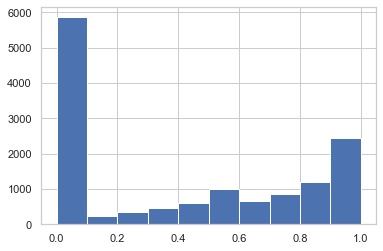

In [351]:
acum_sow['SOW_PROM_U1M_OVER_U6M'] = acum_sow['listado_sow_ibk'].apply(lambda _: simple_divv(np.mean([_[-6], _[-7]]), _[-1]))
acum_sow[acum_sow['SOW_PROM_U1M_OVER_U6M'] < 1]['SOW_PROM_U1M_OVER_U6M'].hist()

In [352]:
acum_sow['SOW_PROM_U1M_OVER_U6M_MENORIGUAL_0.99'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ <= 0.99).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENORIGUAL_0.95'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ <= 0.95).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.9'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.9).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.8'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.8).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.7'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.7).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.6'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.6).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.5'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.5).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.4'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.4).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.3'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.3).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.2'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.2).astype(int)
acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.1'] = acum_sow['SOW_PROM_U1M_OVER_U6M'].apply(lambda _: _ < 0.1).astype(int)

pd.crosstab(
    acum_sow['SOW_PROM_U1M_OVER_U6M_MENOR_0.1'], acum_sow['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
SOW_PROM_U1M_OVER_U6M_MENOR_0.1,,,,,,,,
0,2179,2181,2404,2444,2550,2673,2769,2792
1,1053,1051,828,788,682,559,463,440


In [353]:
pd.crosstab(
    acum_sow['SOW_PROM_U1M_OVER_U6M_MENORIGUAL_0.95'], acum_sow['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
SOW_PROM_U1M_OVER_U6M_MENORIGUAL_0.95,,,,,,,,
0,1430,1415,1489,1680,1769,1889,2037,2095
1,1802,1817,1743,1552,1463,1343,1195,1137


In [354]:
acum_sow['PERIODO'] = acum_sow['PERIODO'].astype(str)
acum_sow['COD_UNICO'] = acum_sow['COD_UNICO'].astype(str)

analisis_cliente = analisis_cliente.merge(
    acum_sow, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1128)

In [355]:
analisis_cliente = analisis_cliente.merge(
        sow[['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_BBVA', 'SOW_BCP', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1135)

<AxesSubplot:>

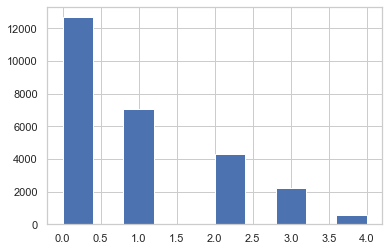

In [356]:
analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'] = analisis_cliente[['SOW_IBK', 'SOW_BBVA', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_BCP']].apply(
    lambda _: int(_[0] < _[1]) + int(_[0] < _[2]) + int(_[0] < _[3]) + int(_[0] < _[4]), axis=1
)
display(analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].hist())

analisis_cliente['NRO_BANCOS_CON_MENOR_SOW'] = analisis_cliente[['SOW_IBK', 'SOW_BBVA', 'SOW_BIF', 'SOW_SCOTIA', 'SOW_BCP']].apply(
    lambda _: int(_[0] > _[1]) + int(_[0] > _[2]) + int(_[0] > _[3]) + int(_[0] > _[4]), axis=1
)

In [357]:
analisis_cliente['TIENE_2_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 2).astype(int)
analisis_cliente['TIENE_3_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 3).astype(int)
analisis_cliente['TIENE_1_O_MAS_BANCOS_CON_MAYOR_SOW'] = analisis_cliente['NRO_BANCOS_CON_MAYOR_SOW'].apply(lambda _: _ >= 1).astype(int)

<AxesSubplot:>

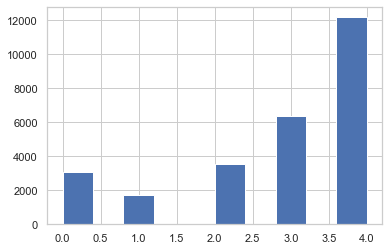

In [358]:
display(analisis_cliente['NRO_BANCOS_CON_MENOR_SOW'].hist())

In [359]:
analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((26910, 1140), (26910,))

In [360]:
#[_ for _ in analisis_cliente.columns if 'SOW' in _.upper()]

In [361]:
for col in [_ for _ in analisis_cliente.columns if 'SOW' in _.upper()]:
    print(col)
    analisis_cliente[col + '_ULT_RCC'] = analisis_cliente[col].copy()
    del  analisis_cliente[col]
#analisis_cliente['SOW_IBK_utl_rcc'] = analisis_cliente['SOW_IBK'].copy()
#del analisis_cliente['SOW_IBK']

listado_sow_ibk
SOW_UTL_RCC_MENOR_0.6
SOW_UTL_RCC_MENOR_0.5
SOW_UTL_RCC_MENOR_0.4
SOW_UTL_RCC_MENOR_0.3
SOW_UTL_RCC_MENOR_0.2
SOW_UTL_RCC_MENOR_0.1
SOW_UTL_RCC_IGUAL_0
SOW_PROM_UTL_3_RCC_MENOR_0.6
SOW_PROM_UTL_3_RCC_MENOR_0.5
SOW_PROM_UTL_3_RCC_MENOR_0.4
SOW_PROM_UTL_3_RCC_MENOR_0.3
SOW_PROM_UTL_3_RCC_MENOR_0.2
SOW_PROM_UTL_3_RCC_MENOR_0.1
SOW_PROM_UTL_3_RCC_IGUAL_0
SOW_PROM_UTL_6_RCC_MENOR_0.6
SOW_PROM_UTL_6_RCC_MENOR_0.5
SOW_PROM_UTL_6_RCC_MENOR_0.4
SOW_PROM_UTL_6_RCC_MENOR_0.3
SOW_PROM_UTL_6_RCC_MENOR_0.2
SOW_PROM_UTL_6_RCC_MENOR_0.1
SOW_PROM_UTL_6_RCC_IGUAL_0
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENORIGUAL_0.99
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENORIGUAL_0.95
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.9
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.8
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.7
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.6
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.5
SOW_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.4
SOW_PROM_ULT_TRIM_OVER_

In [362]:
sow['PERIODO'].max(), sow['PERIODO'].min(),analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

('202105', '201908', (26910, 1140), (26910,))

## VARIACION SOW

In [363]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-8:-2]
    print( ' histroia ', historia, ', Mes cerrado', tramo[0], ', cosecha ', tramo[1][-3] , ', Meses target', tramo[-1], tramo[-2])

 histroia  [202011, 202012, 202101, 202102, 202103, 202104] , Mes cerrado 202104 , cosecha  202104 , Meses target [202105, 202106] [202005, 202006]
 histroia  [202010, 202011, 202012, 202101, 202102, 202103] , Mes cerrado 202103 , cosecha  202103 , Meses target [202104, 202105] [202004, 202005]
 histroia  [202009, 202010, 202011, 202012, 202101, 202102] , Mes cerrado 202102 , cosecha  202102 , Meses target [202103, 202104] [202003, 202004]
 histroia  [202008, 202009, 202010, 202011, 202012, 202101] , Mes cerrado 202101 , cosecha  202101 , Meses target [202102, 202103] [202002, 202003]
 histroia  [202007, 202008, 202009, 202010, 202011, 202012] , Mes cerrado 202012 , cosecha  202012 , Meses target [202101, 202102] [202001, 202002]
 histroia  [202006, 202007, 202008, 202009, 202010, 202011] , Mes cerrado 202011 , cosecha  202011 , Meses target [202012, 202101] [201912, 202001]
 histroia  [202005, 202006, 202007, 202008, 202009, 202010] , Mes cerrado 202010 , cosecha  202010 , Meses targe

In [364]:
dicc_kpi = {
    'SOW_IBK': ['max', 'min'],
    'SOW_OTROSBCOS': ['max', 'min'],
    'PERCENT_COL_DIRECTAS_SF': ['max', 'min'] 
}

columns_base = ['SOW_IBK_MAX_', 'SOW_IBK_MIN_', 
               'SOW_OTROSBCOS_MAX_', 'SOW_OTROSBCOS_MIN_',
                'PERCENT_COL_DIRECTAS_SF_MAX_', 'PERCENT_COL_DIRECTAS_SF_MIN_'
               ]
contador = 1
cols_order = []

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[2]
    
    _2m_anio_actual = sow[sow['PERIODO'].astype(int).isin(historia)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_actual.columns = [_ + 'historia' for _ in columns_base]
    
    #data_tramo = pd.concat(
    #    [_12m_anio_actual, _6m_anio_actual, _3m_anio_actual], axis=1
    #).reset_index()
    data_tramo = _2m_anio_actual.reset_index()
    
    try:
        data_tramo['COD_UNICO'] = data_tramo['index']
        del data_tramo['index']
    except:
        pass
    
    data_tramo['PERIODO'] = str(tramo[0])
    #print(data_tramo.columbns)
    del _2m_anio_actual
    
    #print(list(data_tramo.columns))
    if contador == 1:
        sow_cliente = data_tramo
        cols_order = list(sow_cliente.columns)
    else:
        sow_cliente = pd.concat(
            [sow_cliente, data_tramo], axis=0
        )[cols_order]
    
    contador += 1
    #print(data_tramo.head())
    print("--", sow_cliente.shape)


202104 [202105, 202106] [202005, 202006]
-- (3203, 8)
202103 [202104, 202105] [202004, 202005]
-- (6406, 8)
202102 [202103, 202104] [202003, 202004]
-- (9613, 8)
202101 [202102, 202103] [202002, 202003]
-- (12817, 8)
202012 [202101, 202102] [202001, 202002]
-- (16017, 8)
202011 [202012, 202101] [201912, 202001]
-- (19209, 8)
202010 [202011, 202012] [201911, 201912]
-- (22380, 8)
202009 [202010, 202011] [201910, 201911]
-- (25494, 8)


In [365]:
sow_cliente.head()

,COD_UNICO,SOW_IBK_MAX_historia,SOW_IBK_MIN_historia,SOW_OTROSBCOS_MAX_historia,SOW_OTROSBCOS_MIN_historia,PERCENT_COL_DIRECTAS_SF_MAX_historia,PERCENT_COL_DIRECTAS_SF_MIN_historia,PERIODO
0,0000002469,0.255394,0.166126,0.555730,0.492706,0.925608,0.875310,202104
1,0000003392,0.134538,0.083717,0.885409,0.843516,0.997604,0.996759,202104
2,0000006114,1.000000,0.829085,0.000000,0.000000,0.854103,0.670141,202104
3,0000006726,0.000000,0.000000,1.000000,0.985460,1.000000,1.000000,202104
4,0000008045,0.102362,0.077190,0.791038,0.669929,0.987530,0.976305,202104


In [366]:
sow_cliente.shape, sow_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

((25494, 8), (25494,), (26910, 1140), (26910,))

In [367]:
sow_cliente.shape

(25494, 8)

### STROP SPW

In [368]:
analisis_cliente = analisis_cliente.merge(
    sow_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1146)

## >> DIAS DE ATRASO IBK - FUENTE INTERNA

In [369]:
query = """
    SELECT * FROM ODS.HD_VMVP_DIAS_ATRASO_IBK_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""

atrsaso = pd.read_sql(
   query , connection_market
)

print(atrsaso.shape)
atrsaso.head(20)

(18073, 5)


,PERIODO,COD_UNICO,ESTADO,MAX_DIAS_ATRASO,DEUDA
0,202012,0015480495,VIGENTE,0.0,3044778.0
1,202004,0009186301,VIGENTE,14.0,124878400.0
2,202012,0000053025,VIGENTE,0.0,156281.0
3,202001,0011880968,VIGENTE,30.0,19002824.0
4,202011,0011873063,VIGENTE,0.0,422466.0
5,202010,0011786683,VIGENTE,0.0,3101583.0
6,202101,0008479279,VIGENTE,7.0,18618.0
7,201905,0014466398,VIGENTE,1.0,541654.0
8,202005,0009230888,VIGENTE,7.0,21911286.0
9,202006,0011289053,VENCIDO,20.0,29723.0


In [370]:
atrsaso[
    (atrsaso['COD_UNICO'] == '0012841474') & (atrsaso['PERIODO'].isin(['202104', '202103']))
]

,PERIODO,COD_UNICO,ESTADO,MAX_DIAS_ATRASO,DEUDA
2629,202104,0012841474,VIGENTE,9.0,1344257.0
12012,202103,0012841474,VIGENTE,6.0,1223645.0


In [371]:
atrsaso[
    atrsaso['MAX_DIAS_ATRASO'] > 0
].shape, atrsaso[
    (atrsaso['MAX_DIAS_ATRASO'] > 0) & (atrsaso['DEUDA'] == 0)
].shape

((12106, 5), (11, 5))

In [372]:
atrsaso['PERIODO'].max()

'202106'

In [373]:
pivoteo = pd.pivot_table(
    atrsaso, values='MAX_DIAS_ATRASO', index=['COD_UNICO', 'PERIODO'], columns=['ESTADO'], aggfunc=len, fill_value=0
)

for col in pivoteo.columns:
    pivoteo['TIENE_DEUDA_'+ col + '_IBK'] = pivoteo[col].apply(lambda _: 1 if _ > 0 else 0)
    del pivoteo[col]
    
pivoteo['TIENE_VIEGNTE_VENCIDO_IBK'] = pivoteo[['TIENE_DEUDA_VENCIDO_IBK', 'TIENE_DEUDA_VIGENTE_IBK']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1)

pivoteo = pivoteo.reset_index().reset_index(drop=True)
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]
print(pivoteo['PERIODO'].max())

pivoteo.head()

202106


,COD_UNICO,PERIODO,TIENE_DEUDA_REFINANCIADO_IBK,TIENE_DEUDA_VENCIDO_IBK,TIENE_DEUDA_VIGENTE_IBK,TIENE_VIEGNTE_VENCIDO_IBK
0,0000002469,202010,0,0,1,0
1,0000002469,202011,0,0,1,0
2,0000002469,202012,0,0,1,0
3,0000002469,202102,0,0,1,0
4,0000002469,202103,0,0,1,0


In [374]:
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1150)

In [375]:
#atrsaso = atrsaso.groupby(by=['PERIODO', 'COD_UNICO'])['MAX_DIAS_ATRASO'].max().reset_index()
#atrsaso.head()
atrsaso.shape

(18073, 5)

In [376]:
saldo_atraso_ibk = atrsaso[(atrsaso['MAX_DIAS_ATRASO'] > 0) & (atrsaso['DEUDA'] > 0)].groupby(by=['COD_UNICO', 'PERIODO'])['DEUDA'].sum()

saldo_atraso_ibk.shape, saldo_atraso_ibk.groupby(['COD_UNICO', 'PERIODO']).size().shape

((10736,), (10736,))

In [377]:
saldo_atraso_ibk  = saldo_atraso_ibk.reset_index()
saldo_atraso_ibk.columns = ['COD_UNICO', 'PERIODO', 'DEUDA_IBK_FUENTE_INTERNA']
saldo_atraso_ibk.head(3)

,COD_UNICO,PERIODO,DEUDA_IBK_FUENTE_INTERNA
0,0000002469,202102,24914.0
1,0000002469,202103,122013.0
2,0000002469,202104,26294.0


In [378]:
analisis_cliente = analisis_cliente.merge(
    saldo_atraso_ibk, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1151)

In [379]:
#atrsaso['TIENE_DIAS_DE_ATRASO_IBK_ESTE_MES'] = atrsaso['MAX_DIAS_ATRASO'].apply(lambda _: 1 if _ >= 1 else 0)

#analisis_cliente = analisis_cliente.merge(
#    atrsaso[['PERIODO', 'COD_UNICO', 'TIENE_DIAS_DE_ATRASO_IBK_ESTE_MES']], how='left', on=['PERIODO', 'COD_UNICO']
#)
#analisis_cliente.shape

atraso_ = pd.pivot_table(
    atrsaso, 
    values='MAX_DIAS_ATRASO', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.max, fill_value=0
).unstack().reset_index() 

atraso_.columns = ['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO']
atraso_['MAX_DIAS_ATRASO_IBK_FUENTE_INTERNA'] = atraso_['MAX_DIAS_ATRASO']
print(atraso_.shape)
atraso_.head(3)

(75951, 4)


,PERIODO,COD_UNICO,MAX_DIAS_ATRASO,MAX_DIAS_ATRASO_IBK_FUENTE_INTERNA
0,201902,0000002469,0,0
1,201902,0000003392,0,0
2,201902,0000006114,0,0


In [380]:
atraso_['PERIODO'].max()

'202106'

In [381]:
atraso_previo = atraso_[['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO']].copy()
atraso_previo['PERIODO'] = atraso_previo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
atraso_previo.columns = ['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO_IBK_MES_ANTERIOR']
print(atraso_previo.shape)

atraso_ = atraso_.merge(atraso_previo, on=['PERIODO', 'COD_UNICO'], how='left').fillna(0)
print(atraso_.shape)

atraso_.tail(3)

(75951, 3)
(75951, 5)


,PERIODO,COD_UNICO,MAX_DIAS_ATRASO,MAX_DIAS_ATRASO_IBK_FUENTE_INTERNA,MAX_DIAS_ATRASO_IBK_MES_ANTERIOR
75948,202106,0017248976,0,0,0.0
75949,202106,0017309881,0,0,0.0
75950,202106,0017311917,0,0,0.0


In [382]:
atraso_[
    (atraso_['COD_UNICO'] == '0012841474') & (atraso_['PERIODO'].isin(['202104', '202103', '202102']))
]

,PERIODO,COD_UNICO,MAX_DIAS_ATRASO,MAX_DIAS_ATRASO_IBK_FUENTE_INTERNA,MAX_DIAS_ATRASO_IBK_MES_ANTERIOR
64477,202102,0012841474,9,9,3.0
67096,202103,0012841474,6,6,9.0
69715,202104,0012841474,9,9,6.0


In [383]:
analisis_cliente = analisis_cliente.merge(
    atraso_[['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO_IBK_FUENTE_INTERNA', 'MAX_DIAS_ATRASO_IBK_MES_ANTERIOR']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1153)

In [384]:
analisis_cliente = analisis_cliente.merge(
    atraso_, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1156)

In [385]:
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    break

202009 [202010, 202011] 202009 [202004, 202005, 202006, 202007, 202008, 202009]


### >> MAAS DE 8 DIAS  --- 6 MESES DE BUENO

In [386]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(tramo[2][-6:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_8_dias_atraso_ibk'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    print(deudor.shape, deudor[deudor['target_8_dias_atraso_ibk'] == 1].shape)
    
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (37, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (61, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (97, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (148, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (196, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (252, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (318, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (370, 4)


,COD_UNICO,0,target_8_dias_atraso_ibk,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,NaN,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [387]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso_ibk']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1157)

In [388]:
analisis_cliente['target_8_dias_atraso_ibk'].value_counts()
pd.crosstab(
    analisis_cliente['target_8_dias_atraso_ibk'], analisis_cliente['PERIODO']
)

PERIODO,202009,202010,202011,202012,202101,202102,202103,202104
target_8_dias_atraso_ibk,,,,,,,,
0.0,1852,1944,2020,2063,2488,2520,2557,2563
1.0,31,16,27,45,47,55,64,52


In [389]:
for tramo in tramos:
    print(tramo[0], tramo[2], tramo[1][-3])

202009 [202004, 202005, 202006, 202007, 202008, 202009] 202009
202010 [202005, 202006, 202007, 202008, 202009, 202010] 202010
202011 [202006, 202007, 202008, 202009, 202010, 202011] 202011
202012 [202007, 202008, 202009, 202010, 202011, 202012] 202012
202101 [202008, 202009, 202010, 202011, 202012, 202101] 202101
202102 [202009, 202010, 202011, 202012, 202101, 202102] 202102
202103 [202010, 202011, 202012, 202101, 202102, 202103] 202103
202104 [202011, 202012, 202101, 202102, 202103, 202104] 202104


## >> SOLO 3 MESES DE BUENO - ATRASOSS 8 DIAS

In [390]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-3:])]['COD_UNICO'])

    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso_ibk_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        dd = quedan
    else:
        dd = pd.concat(
            [dd, quedan], axis=0
        )
    
    contador += 1
    
    
    print(dd.shape, dd[dd['target_8_dias_atraso_ibk_3Mbueno'] == 1].shape)
dd.head()

202009 [202010, 202011] 202009
(3251, 4) (58, 4)
202010 [202011, 202012] 202010
(6502, 4) (107, 4)
202011 [202012, 202101] 202011
(9753, 4) (166, 4)
202012 [202101, 202102] 202012
(13004, 4) (242, 4)
202101 [202102, 202103] 202101
(16255, 4) (304, 4)
202102 [202103, 202104] 202102
(19506, 4) (380, 4)
202103 [202104, 202105] 202103
(22757, 4) (464, 4)
202104 [202105, 202106] 202104
(26008, 4) (530, 4)


,COD_UNICO,0,target_8_dias_atraso_ibk_3Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [391]:
analisis_cliente = analisis_cliente.merge(
    dd[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso_ibk_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_ibk_3Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

(26910, 1158)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_8_dias_atraso_ibk_3Mbueno,,,,,,,,,,
-1.0,2428,369,299,245,192,197,200,200,187,2896
0.0,0,2079,2168,2200,2239,2634,2625,2622,2638,0
1.0,0,51,40,49,70,61,75,81,65,0


In [392]:
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_ibk_3Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_8_dias_atraso_ibk_3Mbueno,,,,,,,,,,
-1.0,2428,369,299,245,192,197,200,200,187,2896
0.0,0,2079,2168,2200,2239,2634,2625,2622,2638,0
1.0,0,51,40,49,70,61,75,81,65,0


In [393]:
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_ibk'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_8_dias_atraso_ibk,,,,,,,,,,
-1.0,2428,616,547,447,393,357,325,282,275,2896
0.0,0,1852,1944,2020,2063,2488,2520,2557,2563,0
1.0,0,31,16,27,45,47,55,64,52,0


## >> 2 MESES DE BUENO - ALMENOS UN MES CON ATRASO

In [394]:
atraso_.head(3)

,PERIODO,COD_UNICO,MAX_DIAS_ATRASO,MAX_DIAS_ATRASO_IBK_FUENTE_INTERNA,MAX_DIAS_ATRASO_IBK_MES_ANTERIOR
0,201902,0000002469,0,0,0.0
1,201902,0000003392,0,0,0.0
2,201902,0000006114,0,0,0.0


In [395]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[
        atraso_['MAX_DIAS_ATRASO'] >= 8
    ]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso_ibk_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    
    print(deudor.shape, deudor[deudor['target_8_dias_atraso_ibk_2Mbueno'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (73, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (137, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (215, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (301, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (376, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (462, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (567, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (635, 4)


,COD_UNICO,0,target_8_dias_atraso_ibk_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [396]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso_ibk_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

(26910, 1159)


## >> 2 MESES DE BUENO - 2 MESES SEGUIDO CON ATRASO

In [397]:
atraso_.head()

,PERIODO,COD_UNICO,MAX_DIAS_ATRASO,MAX_DIAS_ATRASO_IBK_FUENTE_INTERNA,MAX_DIAS_ATRASO_IBK_MES_ANTERIOR
0,201902,0000002469,0,0,0.0
1,201902,0000003392,0,0,0.0
2,201902,0000006114,0,0,0.0
3,201902,0000006726,4,4,0.0
4,201902,0000008045,0,0,0.0


In [398]:
for tramo in tramos:
    delante = tramo[-1]
    print(delante)
    print(tramo[2][-2:])
    break

[202010, 202011]
[202008, 202009]


In [399]:
_8_dias = atraso_[
    (atraso_['MAX_DIAS_ATRASO'] >= 8) & (atraso_['MAX_DIAS_ATRASO_IBK_MES_ANTERIOR'] >= 8)
]

_8_dias[_8_dias['COD_UNICO'] == '0012841474']


,PERIODO,COD_UNICO,MAX_DIAS_ATRASO,MAX_DIAS_ATRASO_IBK_FUENTE_INTERNA,MAX_DIAS_ATRASO_IBK_MES_ANTERIOR
56620,202011,0012841474,19,19,11.0
72334,202105,0012841474,10,10,9.0


In [400]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 8) & (atraso_['MAX_DIAS_ATRASO_IBK_MES_ANTERIOR'] >= 8)
    ]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso_seguido_ibk_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    
    print(deudor.shape, deudor[deudor['target_8_dias_atraso_seguido_ibk_2Mbueno'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (56, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (99, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (149, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (191, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (224, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (265, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (319, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (375, 4)


,COD_UNICO,0,target_8_dias_atraso_seguido_ibk_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [401]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso_seguido_ibk_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

(26910, 1160)


In [402]:
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_ibk_2Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_8_dias_atraso_ibk_2Mbueno,,,,,,,,,,
-1.0,2428,268,223,173,141,161,171,136,164,2896
0.0,0,2166,2230,2254,2282,2658,2644,2667,2659,0
1.0,0,65,54,67,78,73,85,100,67,0


In [403]:
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_seguido_ibk_2Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_8_dias_atraso_seguido_ibk_2Mbueno,,,,,,,,,,
-1.0,2428,132,127,101,83,85,77,58,65,2896
0.0,0,2317,2340,2349,2384,2775,2784,2793,2773,0
1.0,0,50,40,44,34,32,39,52,52,0


In [404]:
analisis_cliente['DEUDA_IBK_FUENTE_INTERNA'] = analisis_cliente['DEUDA_IBK_FUENTE_INTERNA'].fillna(0)
analisis_cliente['target_8_dias_atraso_seguido_ibk_2Mbueno_15000'] = analisis_cliente[['target_8_dias_atraso_seguido_ibk_2Mbueno', 'DEUDA_IBK_FUENTE_INTERNA']].apply(
    lambda _: 0 if _[0] == 1 and _[1] < 15000 else _[0], axis=1
)

display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_seguido_ibk_2Mbueno_15000'].fillna(-1), analisis_cliente['PERIODO'])
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_8_dias_atraso_seguido_ibk_2Mbueno_15000,,,,,,,,,,
-1.0,2428,132,127,101,83,85,77,58,65,2896
0.0,0,2328,2348,2361,2390,2784,2794,2816,2791,0
1.0,0,39,32,32,28,23,29,29,34,0


In [405]:
analisis_cliente[
    (analisis_cliente['target_8_dias_atraso_seguido_ibk_2Mbueno_15000'] == 1) & (analisis_cliente['PERIODO'].isin(['202102']))
][['COD_UNICO', 'PERIODO', 'target_8_dias_atraso_seguido_ibk_2Mbueno_15000', 'DEUDA_IBK_FUENTE_INTERNA']].to_excel('CUMPLEN_TARGET_ATRASO_IBK_8_DIAS_2_MESES_SEGUIDO_MAYOR_15000.xls')

<ipython-input-405-7b47fe963e11>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  analisis_cliente[


In [406]:
contador = 1

for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[
        (atraso_['MAX_DIAS_ATRASO'] >= 8) & (atraso_['MAX_DIAS_ATRASO_IBK_MES_ANTERIOR'] >= 8)
    ]
    _30_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 30]

    
    atrasdo_30 = set(_30_dias[_30_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(tramo[2][-2:])]['COD_UNICO'])
    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_30 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_CONTRASTE_30_dias_atraso_ibk_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        _30_ = quedan
    else:
        _30_ = pd.concat(
            [_30_, quedan], axis=0
        )
    
    contador += 1
    
    
    print(_30_.shape, _30_[_30_['target_CONTRASTE_30_dias_atraso_ibk_2Mbueno'] == 1].shape)
_30_.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (33, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (54, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (74, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (98, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (123, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (159, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (202, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (238, 4)


,COD_UNICO,0,target_CONTRASTE_30_dias_atraso_ibk_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [407]:
analisis_cliente = analisis_cliente.merge(
    _30_[['PERIODO', 'COD_UNICO', 'target_CONTRASTE_30_dias_atraso_ibk_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

(26910, 1162)


In [408]:
del _30_
del _30_dias

### SOLO 1 MES DE BUENO - 8 DIAS DE ATRASO IBK

In [409]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])

    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_8_dias_atraso_ibk_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deud = quedan
    else:
        deud = pd.concat(
            [deud, quedan], axis=0
        )
    
    contador += 1
    
    
    print(deud.shape, deud[deud['target_8_dias_atraso_ibk_1Mbueno'] == 1].shape)
deud.head()

202009 [202010, 202011] 202009
(3251, 4) (94, 4)
202010 [202011, 202012] 202010
(6502, 4) (186, 4)
202011 [202012, 202101] 202011
(9753, 4) (283, 4)
202012 [202101, 202102] 202012
(13004, 4) (389, 4)
202101 [202102, 202103] 202101
(16255, 4) (478, 4)
202102 [202103, 202104] 202102
(19506, 4) (596, 4)
202103 [202104, 202105] 202103
(22757, 4) (716, 4)
202104 [202105, 202106] 202104
(26008, 4) (792, 4)


,COD_UNICO,0,target_8_dias_atraso_ibk_1Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [410]:
analisis_cliente = analisis_cliente.merge(
    deud[['PERIODO', 'COD_UNICO', 'target_8_dias_atraso_ibk_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)
del deud
display(
    pd.crosstab(analisis_cliente['target_8_dias_atraso_ibk_1Mbueno'].fillna(-1), analisis_cliente['PERIODO'])
)

(26910, 1163)


PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_8_dias_atraso_ibk_1Mbueno,,,,,,,,,,
-1.0,2428,181,135,114,99,127,91,101,125,2896
0.0,0,2234,2292,2298,2307,2680,2694,2687,2690,0
1.0,0,84,80,82,95,85,115,115,75,0


### >>> MAS DE 15 DIAS 

In [411]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    _15_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 15]
    
    atrasdo_15 = set(_15_dias[_15_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_15_dias[_15_dias['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])

    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_15 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_15_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    
    print(feve.shape, feve[feve['target_15_dias_atraso'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (39, 4)
202010 [202011, 202012] 202010
(6502, 4) (61, 4)
202011 [202012, 202101] 202011
(9753, 4) (87, 4)
202012 [202101, 202102] 202012
(13004, 4) (113, 4)
202101 [202102, 202103] 202101
(16255, 4) (148, 4)
202102 [202103, 202104] 202102
(19506, 4) (204, 4)
202103 [202104, 202105] 202103
(22757, 4) (261, 4)
202104 [202105, 202106] 202104
(26008, 4) (287, 4)


,COD_UNICO,0,target_15_dias_atraso,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,NaN,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [412]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_15_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1164)

In [413]:
analisis_cliente['target_15_dias_atraso'].value_counts()

0.0    19188
1.0      263
Name: target_15_dias_atraso, dtype: int64

In [414]:
del quedan

In [415]:
del feve

In [416]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    _15_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 15]
    
    atrasdo_15 = set(_15_dias[_15_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_15_dias[_15_dias['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])

    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_15 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_15_dias_atraso_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    
    print(feve.shape, feve[feve['target_15_dias_atraso_2Mbueno'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (62, 4)
202010 [202011, 202012] 202010
(6502, 4) (112, 4)
202011 [202012, 202101] 202011
(9753, 4) (155, 4)
202012 [202101, 202102] 202012
(13004, 4) (205, 4)
202101 [202102, 202103] 202101
(16255, 4) (261, 4)
202102 [202103, 202104] 202102
(19506, 4) (334, 4)
202103 [202104, 202105] 202103
(22757, 4) (413, 4)
202104 [202105, 202106] 202104
(26008, 4) (449, 4)


,COD_UNICO,0,target_15_dias_atraso_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [417]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_15_dias_atraso_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1165)

In [418]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[1][-3])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    _15_dias = atraso_[atraso_['MAX_DIAS_ATRASO'] >= 15]
    
    atrasdo_15 = set(_15_dias[_15_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_15_dias[_15_dias['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])

    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_15 and codigo not in no_blancos:
            return 1
        elif codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_15_dias_atraso_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        feve = quedan
    else:
        feve = pd.concat(
            [feve, quedan], axis=0
        )
    
    contador += 1
    
    print(feve.shape, feve[feve['target_15_dias_atraso_1Mbueno'] == 1].shape)
feve.head()

202009 [202010, 202011] 202009
(3251, 4) (76, 4)
202010 [202011, 202012] 202010
(6502, 4) (145, 4)
202011 [202012, 202101] 202011
(9753, 4) (201, 4)
202012 [202101, 202102] 202012
(13004, 4) (263, 4)
202101 [202102, 202103] 202101
(16255, 4) (325, 4)
202102 [202103, 202104] 202102
(19506, 4) (415, 4)
202103 [202104, 202105] 202103
(22757, 4) (505, 4)
202104 [202105, 202106] 202104
(26008, 4) (546, 4)


,COD_UNICO,0,target_15_dias_atraso_1Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [419]:
analisis_cliente = analisis_cliente.merge(
    feve[['PERIODO', 'COD_UNICO', 'target_15_dias_atraso_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1166)

## >> DEUDA SIN REACTIVA

In [420]:
query_deuda = """
    SELECT * FROM ODS.HD_VMVP_DEUDA_SIN_REACTIVA_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
deuda = pd.read_sql(
   query_deuda , connection_market
)
deuda.head(10)

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO,DEUDA_TOTAL_RCC,MTOSALDO_IBK,MTOSALDO_BBVA,MTOSALDO_BCP,MTOSALDO_BIF,MTOSALDO_SCOTIA,MONTO_ATRASO_TOTAL_SF
0,0015085881,201909,VIGENTE,COL. DIRECTAS,DESCUENTOS,74557.69,74557.69,0.00,0.00,0.00,0.00,74557.69,NaN
1,0015167346,201909,VIGENTE,COL. DIRECTAS,LEASING,701456.79,701456.79,0.00,692783.87,0.00,8672.92,0.00,NaN
2,0015175838,201909,VIGENTE,COL. DIRECTAS,LEASING,545671.83,545671.83,0.00,131858.15,0.00,0.00,413813.68,NaN
3,0015190314,201909,VIGENTE,COL. DIRECTAS,PRESTAMOS,547402.59,547402.59,0.00,197402.59,350000.00,0.00,0.00,NaN
4,0015201673,201909,VIGENTE,COL. DIRECTAS,FACTORING,92053.32,92053.32,0.00,0.00,0.00,92053.32,0.00,NaN
5,0015201764,201909,VIGENTE,COL. DIRECTAS,LEASING,71528.68,71528.68,0.00,0.00,65797.78,0.00,0.00,NaN
6,0015276512,201909,VIGENTE,COL. DIRECTAS,LEASING,13286.91,13286.91,13286.91,0.00,0.00,0.00,0.00,NaN
7,0015283043,201909,VIGENTE,COL. DIRECTAS,SOBREGIROS / AVANCES,7.74,7.74,0.00,7.74,0.00,0.00,0.00,NaN
8,0015290999,201909,VIGENTE,COL. DIRECTAS,PRESTAMOS,5561743.48,5561743.48,200000.00,2505243.85,574200.55,1753299.08,0.00,1854138.48
9,0015300302,201909,VIGENTE,COL. DIRECTAS,LEASING,1026723.25,1026723.25,0.00,0.00,1026723.25,0.00,0.00,NaN


In [421]:
deuda['PERIODO'].min()

'201907'

In [422]:
pd.crosstab(deuda['SITUACION'], deuda['TIPO_PRODUCTO'])

TIPO_PRODUCTO,COL. DIRECTAS
SITUACION,
JUDICIAL,218
REFINANCIADO,961
VENCIDO,3824
VIGENTE,138810


In [423]:
deuda.shape

(143813, 13)

In [424]:
print(list(deuda.columns))

['COD_UNICO', 'PERIODO', 'SITUACION', 'TIPO_PRODUCTO', 'PRODUCTO', 'MTOSALDO', 'DEUDA_TOTAL_RCC', 'MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA', 'MONTO_ATRASO_TOTAL_SF']


#### PIVOTEO POR SITUACION ANTES DE FILTRAR

In [425]:
from datetime import datetime
deuda['PERIODO'].max(), deuda['PERIODO'].min()

('202104', '201907')

In [426]:
pivoteo = pd.pivot_table(
    deuda, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)

for col in pivoteo.columns:
    pivoteo['MTO_DEUDA_' + col + '_COLDIRECT_SIN_REATCIVA_SF'] = pivoteo[col].copy()
    pivoteo[col] = pivoteo[col] / pivoteo['total']
    
del pivoteo['total']
pivoteo.columns = [('DEBT_' + col).replace(' ', '_') + '_PERCENT_ULT_RCC' if '_SIN_REATCIVA' not in col else col for col in pivoteo.columns]
pivoteo.columns = [_.replace('/', '').upper() for _ in pivoteo.columns]
pivoteo.head(2)

DEBT_JUDICIAL_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                  
0000002469 201907                             0.0   
           201908                             0.0   

                    DEBT_REFINANCIADO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                      
0000002469 201907                                 0.0   
           201908                                 0.0   

                    DEBT_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201907                            0.0   
           201908                            0.0   

                    DEBT_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201907                            1.0   
           201908                            1.0   

                    MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                 
0000002469 201907                                            0.0   
           201908                                            0.0   

                    MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                     
0000002469 201907                                                0.0   
           201908                                                0.0   

                    MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201907                                           0.0   
           201908                                           0.0   

                    MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201907                                   11023080.44   
           201908                                   10806207.22   

                    MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF  
COD_UNICO  PERIODO                                             
0000002469 201907                                 11023080.44  
           201908                                 10806207.22

In [427]:
for col in [_ for _ in pivoteo.columns if '_PERCENT_ULT_RCC' in _]:
    print(col)
    pivoteo[col.replace('DEBT_', 'TIENE_DEUDA_').replace('_PERCENT_ULT_RCC', '_RCC')] = pivoteo[col].apply(
        lambda _: 1 if _ > 0 else 0
    )
pivoteo.head()

DEBT_JUDICIAL_PERCENT_ULT_RCC
DEBT_REFINANCIADO_PERCENT_ULT_RCC
DEBT_VENCIDO_PERCENT_ULT_RCC
DEBT_VIGENTE_PERCENT_ULT_RCC


DEBT_JUDICIAL_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                  
0000002469 201907                             0.0   
           201908                             0.0   
           201909                             0.0   
           201910                             0.0   
           201911                             0.0   

                    DEBT_REFINANCIADO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                      
0000002469 201907                                 0.0   
           201908                                 0.0   
           201909                                 0.0   
           201910                                 0.0   
           201911                                 0.0   

                    DEBT_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201907                            0.0   
           201908                            0.0   
           201909                            0.0   
           201910                            0.0   
           201911                            0.0   

                    DEBT_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                 
0000002469 201907                            1.0   
           201908                            1.0   
           201909                            1.0   
           201910                            1.0   
           201911                            1.0   

                    MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                 
0000002469 201907                                            0.0   
           201908                                            0.0   
           201909                                            0.0   
           201910                                            0.0   
           201911                                            0.0   

                    MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                     
0000002469 201907                                                0.0   
           201908                                                0.0   
           201909                                                0.0   
           201910                                                0.0   
           201911                                                0.0   

                    MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201907                                           0.0   
           201908                                           0.0   
           201909                                           0.0   
           201910                                           0.0   
           201911                                           0.0   

                    MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                                
0000002469 201907                                   11023080.44   
           201908                                   10806207.22   
           201909                                   11310044.97   
           201910                                   11218066.89   
           201911                                   11058140.05   

                    MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF  \
COD_UNICO  PERIODO                                              
0000002469 201907                                 11023080.44   
           201908                                 10806207.22   
           201909                                 11310044.97   
           201910                                 11218066.89   
           201911                                 11058140.05   

                    TIENE_DEUDA_JUDICIAL_RCC  TIENE_DEUDA_REFINANCIADO_RCC  \
COD_UNICO  PERIODO                                            

In [428]:
pivoteo = pivoteo.reset_index()
# SE LE SUMA UN PEIODO
pivoteo['PERIODO'] = pivoteo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())

pivoteo['TIENE_VIEGNTE_VENCIDO_RCC'] = pivoteo[['TIENE_DEUDA_VENCIDO_RCC', 'TIENE_DEUDA_VIGENTE_RCC']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1
)

pivoteo['TIENE_VENCIDO_Y_VIGENTES_SF'] = pivoteo[['TIENE_DEUDA_VENCIDO_RCC', 'TIENE_DEUDA_VIGENTE_RCC']].apply(
    lambda _: 1 if _[0] > 0 and _[1] > 0 else 0, axis=1
)
pivoteo.head(5)

202105


,COD_UNICO,PERIODO,DEBT_JUDICIAL_PERCENT_ULT_RCC,DEBT_REFINANCIADO_PERCENT_ULT_RCC,DEBT_VENCIDO_PERCENT_ULT_RCC,DEBT_VIGENTE_PERCENT_ULT_RCC,MTO_DEUDA_JUDICIAL_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_REFINANCIADO_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_VENCIDO_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_VIGENTE_COLDIRECT_SIN_REATCIVA_SF,MTO_DEUDA_TOTAL_COLDIRECT_SIN_REATCIVA_SF,TIENE_DEUDA_JUDICIAL_RCC,TIENE_DEUDA_REFINANCIADO_RCC,TIENE_DEUDA_VENCIDO_RCC,TIENE_DEUDA_VIGENTE_RCC,TIENE_VIEGNTE_VENCIDO_RCC,TIENE_VENCIDO_Y_VIGENTES_SF
0,0000002469,201908,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11023080.44,11023080.44,0,0,0,1,0,0
1,0000002469,201909,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10806207.22,10806207.22,0,0,0,1,0,0
2,0000002469,201910,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11310044.97,11310044.97,0,0,0,1,0,0
3,0000002469,201911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11218066.89,11218066.89,0,0,0,1,0,0
4,0000002469,201912,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11058140.05,11058140.05,0,0,0,1,0,0


In [429]:
pivoteo['DEB_SOLO_VIGENTES_SF_ULT_RCC'] = pivoteo['DEBT_VIGENTE_PERCENT_ULT_RCC'].apply(lambda _: _ == 1).astype(int)

In [430]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1166)


(26910, 1182)

In [431]:
deuda.shape,  deuda[deuda['MTOSALDO_IBK'] == 0].shape

((143813, 13), (77071, 13))

In [432]:
import gc
gc.collect()

7478

In [433]:
del pivoteo

In [434]:
vigente = deuda[deuda['SITUACION'].isin(['VIGENTE', 'VENCIDO'])]

print(vigente['PERIODO'].max())
vigente['PERIODO'] = vigente['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(vigente['PERIODO'].max())

vigente.shape

202104
202105


<ipython-input-434-0c3c5581afd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vigente['PERIODO'] = vigente['PERIODO'] .apply(


(142634, 13)

In [435]:
vigente['PERIODO'].min()

'201908'

In [436]:
agrupado_deuda = vigente.groupby(by=['PERIODO', 'COD_UNICO']).agg({
    'MTOSALDO_IBK': 'sum',
    'MTOSALDO_BBVA': 'sum',
    'MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum',
    'MTOSALDO_SCOTIA': 'sum',
    'MTOSALDO': 'sum'
}).rename(columns={'MTOSALDO': 'DEUDA_DIRECTA_TOTAL_VIG_VENC_LIN_MER'})

agrupado_deuda['MTOSALDO_OTROS_BANCOS_PRIN'] = agrupado_deuda[['MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']].sum(axis=1)
agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_IBK'] =  agrupado_deuda[['MTOSALDO_IBK', 'DEUDA_DIRECTA_TOTAL_VIG_VENC_LIN_MER']].apply(lambda _: _[0] / _[1], axis=1)
agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_OTROS_BANCOS_PRIN'] =  agrupado_deuda[['MTOSALDO_OTROS_BANCOS_PRIN', 'DEUDA_DIRECTA_TOTAL_VIG_VENC_LIN_MER']].apply(lambda _: _[0] / _[1], axis=1)
agrupado_deuda['MTOSALDO_IBK_MAYORCERO_MIN_DE_LOS_BANCOS_PRIN'] = agrupado_deuda[['MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']].apply(lambda _: _[0] == np.min([_[0], _[1], _[2], _[3], _[4]]) and _[0] > 0, axis=1).astype(int)
agrupado_deuda['MTOSALDO_IBK_MAYORCERO_MAX_DE_LOS_BANCOS_PRIN'] = agrupado_deuda[['MTOSALDO_IBK', 'MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']].apply(lambda _: _[0] == np.max([_[0], _[1], _[2], _[3], _[4]]) and _[0] > 0, axis=1).astype(int)

agrupado_deuda['TIENE_MTOSALDO_OTROS_BANCOS_PRIN_MAYOR_0.4'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_OTROS_BANCOS_PRIN'].apply(lambda _: _ >= 0.4).astype(int)
agrupado_deuda['TIENE_MTOSALDO_OTROS_BANCOS_PRIN_MAYOR_0.5'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_OTROS_BANCOS_PRIN'].apply(lambda _: _ >= 0.5).astype(int)
agrupado_deuda['TIENE_MTOSALDO_OTROS_BANCOS_PRIN_MAYOR_0.6'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_OTROS_BANCOS_PRIN'].apply(lambda _: _ >= 0.6).astype(int)
agrupado_deuda['TIENE_MTOSALDO_OTROS_BANCOS_PRIN_MAYOR_0.7'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_OTROS_BANCOS_PRIN'].apply(lambda _: _ >= 0.7).astype(int)
agrupado_deuda['TIENE_MTOSALDO_OTROS_BANCOS_PRIN_MAYOR_0.8'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_OTROS_BANCOS_PRIN'].apply(lambda _: _ >= 0.8).astype(int)
agrupado_deuda['TIENE_MTOSALDO_OTROS_BANCOS_PRIN_MAYOR_0.9'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_OTROS_BANCOS_PRIN'].apply(lambda _: _ >= 0.9).astype(int)
agrupado_deuda['TIENE_MTOSALDO_OTROS_BANCOS_PRIN_IGUAL_1'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_OTROS_BANCOS_PRIN'].apply(lambda _: _ >= 1).astype(int)

agrupado_deuda['TIENE_PERCENT_DIRECTA_VIGVENC_LINMER_IBK_MENOR_0.5'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_IBK'].apply(lambda _: _< 0.5).astype(int)
agrupado_deuda['TIENE_PERCENT_DIRECTA_VIGVENC_LINMER_IBK_MENOR_0.4'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_IBK'].apply(lambda _: _< 0.4).astype(int)
agrupado_deuda['TIENE_PERCENT_DIRECTA_VIGVENC_LINMER_IBK_MENOR_0.3'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_IBK'].apply(lambda _: _< 0.3).astype(int)
agrupado_deuda['TIENE_PERCENT_DIRECTA_VIGVENC_LINMER_IBK_MENOR_0.2'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_IBK'].apply(lambda _: _< 0.2).astype(int)
agrupado_deuda['TIENE_PERCENT_DIRECTA_VIGVENC_LINMER_IBK_MENOR_0.1'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_IBK'].apply(lambda _: _< 0.1).astype(int)
agrupado_deuda['TIENE_PERCENT_DIRECTA_VIGVENC_LINMER_IBK_IGUAL_0'] = agrupado_deuda['PERCENT_DIRECTA_VIGVENC_LINMER_IBK'].apply(lambda _: _ == 0).astype(int)

agrupado_deuda.columns = [col + '_V' for col in agrupado_deuda.columns]
agrupado_deuda = agrupado_deuda.reset_index()
agrupado_deuda['PERIODO'] = agrupado_deuda['PERIODO'].astype(str)
agrupado_deuda['COD_UNICO'] = agrupado_deuda['COD_UNICO'].astype(str)

print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    agrupado_deuda, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1182)


(26910, 1206)

In [437]:
agrupado_deuda['PERIODO'].min()

'201908'

In [438]:
acum_ibk = generate_listado_u3m(agrupado_deuda, 'listado_dedua_ibk', values='MTOSALDO_IBK_V', index=['COD_UNICO'], columns=['PERIODO'], aggfunc=np.sum)

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3164, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(6328, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9492, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12656, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(15820, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(18984, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(22148, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(25312, 3)


In [439]:
def div_fashhh(a, b):
    if b == 0 and a == 0:
        return 0
    elif b == 0:
        return 1.01
    
    return a / b
        
acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'] = acum_ibk['listado_dedua_ibk'].apply(lambda _: div_fashhh(np.mean(_[-6:-3]), np.mean(_[-3:])))
#acum_ibk[acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'] <= 1]['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].hist()

acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.95'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.95).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.90'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.90).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.80'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.80).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.70'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.70).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.60'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.60).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.50'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.50).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.40'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.40).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.30'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.30).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.20'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.20).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR_MENOR_0.10'] = acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].apply(lambda _: _ < 0.10).astype(int)


acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'] = acum_ibk['listado_dedua_ibk'].apply(lambda _: div_fashhh(np.mean(_[-7:-5]), _[-1]))
#acum_ibk[acum_ibk['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'] <= 1]['MTOSALDO_IBK_V_ULT_TRIM_OVER_TRIM_ANTERIOR'].hist()

acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.95'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.95).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.90'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.90).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.80'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.80).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.70'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.70).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.60'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.60).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.50'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.50).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.40'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.40).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.30'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.30).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.20'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.20).astype(int)
acum_ibk['TIENE_MTOSALDO_IBK_V_U1M_OVER_U6M_MENOR_0.10'] = acum_ibk['MTOSALDO_IBK_V_U1M_OVER_U6M'].apply(lambda _: _ < 0.10).astype(int)

del acum_ibk['listado_dedua_ibk']
acum_ibk['PERIODO'] = acum_ibk['PERIODO'].astype(str)
acum_ibk['COD_UNICO'] = acum_ibk['COD_UNICO'].astype(str)

print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    acum_ibk, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1206)


(26910, 1228)

In [440]:
deuda_total = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['DEUDA_TOTAL_RCC'].sum().reset_index()

print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    deuda_total, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1228)


(26910, 1229)

In [441]:
monto_atraso_total = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MONTO_ATRASO_TOTAL_SF'].sum().reset_index()

print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    monto_atraso_total, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1229)


(26910, 1230)

In [442]:
del deuda_total

### CAMBIO SE CONSDERA ATRASO NO LETRAS

In [443]:
query_atraso = """
    SELECT * FROM ODS.HD_VMVP_ATRASO_ALERTA_CARTERA_BE WITH (NOLOCK)
"""
atrasox = pd.read_sql(
   query_atraso , connection_market
)
atrasox.head(10)

,PERCENT_DELAY_OVER_DEBT_RCC,PERCENT_DELAY5DAYS_OVER_DEBT_RCC,PERCENT_DELAY10DAYS_OVER_DEBT_RCC,PERCENT_DELAY15DAYS_OVER_DEBT_RCC,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO,...,PROM_DIAS_ATRASO_BBVA,PROM_DIAS_ATRASO_BCP,PROM_DIAS_ATRASO_BIF,PROM_DIAS_ATRASO_SCOTIA,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_IBK,MAX_DIAS_ATRASO_BBVA,MAX_DIAS_ATRASO_BCP,MAX_DIAS_ATRASO_BIF,MAX_DIAS_ATRASO_SCOTIA
0,0.000000,0.000000,0.0,0.0,0010934015,201907,VIGENTE,COL. DIRECTAS,LEASING,45309297.65,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
1,0.000000,0.000000,0.0,0.0,0010978412,201907,VIGENTE,COL. DIRECTAS,DESCUENTOS,1735929.84,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
2,0.000000,0.000000,0.0,0.0,0010992140,201907,VIGENTE,COL. DIRECTAS,LEASING,10712.55,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,0.000000,0.000000,0.0,0.0,0011019225,201907,VIGENTE,COL. DIRECTAS,PRESTAMOS,1634130.90,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
4,0.606292,0.599266,0.0,0.0,0011026743,201907,VIGENTE,COL. DIRECTAS,PRESTAMOS,17159585.67,...,6.0,NaN,NaN,2.0,6,0,6,0,0,2
5,0.000000,0.000000,0.0,0.0,0011027012,201907,VIGENTE,COL. DIRECTAS,LEASING,32836.44,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
6,0.000000,0.000000,0.0,0.0,0011035733,201907,VIGENTE,COL. DIRECTAS,COMEX,712650.42,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
7,0.000000,0.000000,0.0,0.0,0011037715,201907,VIGENTE,COL. DIRECTAS,LEASING,1022641.74,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
8,0.000000,0.000000,0.0,0.0,0011066687,201907,VIGENTE,COL. DIRECTAS,COMEX,563542.90,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
9,0.000000,0.000000,0.0,0.0,0011095988,201907,VIGENTE,COL. DIRECTAS,PRESTAMOS,150000.00,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0


In [444]:
atrasox.shape

(133280, 31)

In [445]:
atraso_ = atrasox[atrasox['SITUACION'].isin(['VIGENTE', 'VENCIDO'])].copy()   ## CAMBIO 09/04/2021

print(atraso_['PERIODO'].max())
atraso_['PERIODO'] = atraso_['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(atraso_['PERIODO'].max())

atraso_.shape

202104
202105


(132101, 31)

In [446]:
atraso_.shape, atraso_.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

((132101, 31), (60740,))

In [447]:
atraso_previo = atraso_[['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO_SF']].groupby(by=['PERIODO', 'COD_UNICO'])['MAX_DIAS_ATRASO_SF'].max().reset_index()

atraso_previo['PERIODO'] = atraso_previo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
atraso_previo.columns = ['PERIODO', 'COD_UNICO', 'MAX_DIAS_ATRASO_SF_MES_ANTERIOR']
print(atraso_previo.shape)

atraso_previo.head()

(60740, 3)


,PERIODO,COD_UNICO,MAX_DIAS_ATRASO_SF_MES_ANTERIOR
0,201909,0000002469,6
1,201909,0000003392,0
2,201909,0000006114,0
3,201909,0000006726,21
4,201909,0000008045,0


In [448]:
atraso_ = atraso_.merge(atraso_previo, on=['PERIODO', 'COD_UNICO'], how='left').fillna(0)
print(atraso_.shape)

(132101, 32)


<AxesSubplot:>

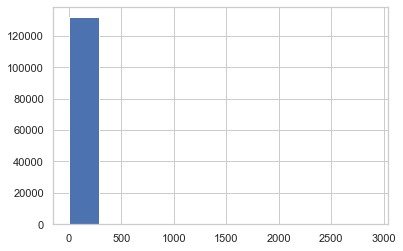

In [449]:
atraso_['MAX_DIAS_ATRASO_SF_MES_ANTERIOR'].hist()

In [450]:
atraso_[
    (atraso_['COD_UNICO'] == '0011608752') & (atraso_['PERIODO'].isin(['202101', '212102', '202012']))
][
    ['COD_UNICO', 'PERIODO', 'MAX_DIAS_ATRASO_SF', 'MAX_DIAS_ATRASO_SF_MES_ANTERIOR']
].sort_values(by=['PERIODO'], ascending=False)

,COD_UNICO,PERIODO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_SF_MES_ANTERIOR
92044,0011608752,202101,0,5.0
94925,0011608752,202101,0,5.0
122300,0011608752,202101,0,5.0
90132,0011608752,202012,0,29.0
90220,0011608752,202012,5,29.0
103854,0011608752,202012,0,29.0


In [451]:
percent_no_letra = atraso_.groupby(by=['PERIODO', 'COD_UNICO'])['PERCENT_DELAY_OVER_DEBT_RCC'].sum().reset_index()

print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    percent_no_letra, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1230)


(26910, 1231)

In [452]:
atraso_no_letra = atraso_.groupby(by=['PERIODO', 'COD_UNICO'])['MTO_ATRASO_NOLETRAS'].sum().reset_index()

print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    atraso_no_letra, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1231)


(26910, 1232)

<AxesSubplot:>

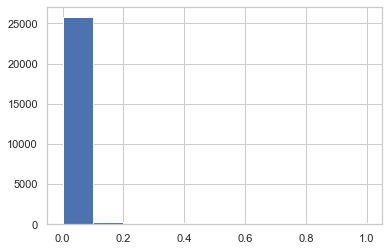

In [453]:
def div_quickly_rcc(a, b):
    if pd.isnull(b) or b== 0:
        return 0
    
    return a / b

analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'] = analisis_cliente[['MTO_ATRASO_NOLETRAS', 'DEUDA_TOTAL_RCC']].apply(lambda _: div_quickly_rcc(_[0], _[1]), axis=1)
analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].hist()

## >> ATRASO RCC 6 MESES DE BUENO

In [454]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 8]
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1
    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (84, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (173, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (252, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (311, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (375, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (461, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (550, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (594, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso,PERIODO
0,0000002469,10,NaN,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,NaN,202009
4,0000008045,5,0.0,202009


In [455]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1233)

In [456]:
atraso_.shape, atraso_['PERIODO'].max()

((132101, 32), '202105')

## >> ATRASO 15 DIAS - 6 MESE BUENO

In [457]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    
    _15_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 15]
    
    atrasdo_8 = set(_15_dias[_15_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_15_dias[_15_dias['PERIODO'].astype(int).isin( tramo[2][-6:])]['COD_UNICO'])

    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_15_dias_atraso'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_rcc_15_dias_atraso'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (68, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (142, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (212, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (268, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (321, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (393, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (475, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (520, 4)


,COD_UNICO,0,target_rcc_15_dias_atraso,PERIODO
0,0000002469,10,NaN,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,NaN,202009
4,0000008045,5,0.0,202009


In [458]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_15_dias_atraso']], how='left', on=['PERIODO', 'COD_UNICO']
)
del deudor
analisis_cliente.shape

(26910, 1234)

In [459]:
print(list(atraso_['SITUACION'].unique()))

['VIGENTE', 'VENCIDO']


In [460]:
analisis_cliente['target_rcc_8_dias_atraso'].value_counts()

0.0    16583
1.0      514
Name: target_rcc_8_dias_atraso, dtype: int64

In [461]:
analisis_cliente['target_SF_8_dias_atraso_o_mas'] = analisis_cliente[['target_8_dias_atraso_ibk', 'target_rcc_8_dias_atraso']].apply(
     lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0),axis= 1
)

analisis_cliente['target_SF_8_dias_atraso_o_mas'].value_counts(dropna=False)

0.0    15216
NaN    11133
1.0      561
Name: target_SF_8_dias_atraso_o_mas, dtype: int64

In [462]:
analisis_cliente['target_SF_15_dias_atraso_o_mas'] = analisis_cliente[['target_15_dias_atraso', 'target_rcc_15_dias_atraso']].apply(
     lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0),axis= 1
)
analisis_cliente['target_SF_15_dias_atraso_o_mas'].value_counts(dropna=False)

0.0    16728
NaN     9681
1.0      501
Name: target_SF_15_dias_atraso_o_mas, dtype: int64

In [463]:
analisis_cliente['PERIODO'].value_counts()

202103    2903
202102    2900
202105    2896
202101    2892
202104    2890
202010    2507
202012    2501
202009    2499
202011    2494
202008    2428
Name: PERIODO, dtype: int64

In [464]:
atraso_.shape, atraso_.groupby(by=['COD_UNICO','PERIODO']).size().shape, atraso_['PERIODO'].max()

((132101, 32), (60740,), '202105')

### >> ATRASO 15 DIAS -- 2 MESES BUENO

In [465]:
contador = 1

for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _15_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 15]
    
    atrasdo_8 = set(_15_dias[_15_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_15_dias[_15_dias['PERIODO'].astype(int).isin(tramo[2][-2:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
    
    quedan['target_rcc_15_dias_atraso_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_rcc_15_dias_atraso_2Mbueno'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (112, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (222, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (322, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (403, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (493, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (598, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (711, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (777, 4)


,COD_UNICO,0,target_rcc_15_dias_atraso_2Mbueno,PERIODO
0,0000002469,10,NaN,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,NaN,202009
4,0000008045,5,0.0,202009


In [466]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_15_dias_atraso_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1237)

In [467]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _30_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 30]
    _8_dias = atraso_[
        (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) & (atraso_['MAX_DIAS_ATRASO_SF_MES_ANTERIOR'] >= 8)
    ]
    
    atrasdo_30 = set(_30_dias[_30_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])

    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_30 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_CONTRASTE_30_dias_atraso_RCC_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        _30_ = quedan
    else:
        _30_ = pd.concat(
            [_30_, quedan], axis=0
        )
    
    contador += 1
    
    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(_30_.shape, _30_[_30_['target_CONTRASTE_30_dias_atraso_RCC_2Mbueno'] == 1].shape)
_30_.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (95, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (187, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (266, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (342, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (403, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (479, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (577, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (649, 4)


,COD_UNICO,0,target_CONTRASTE_30_dias_atraso_RCC_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [468]:
analisis_cliente = analisis_cliente.merge(
    _30_[['PERIODO', 'COD_UNICO', 'target_CONTRASTE_30_dias_atraso_RCC_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1238)

In [469]:
del _30_
del _30_dias

##### SOLO 3 MESES DE BUENO -- 8 DIAS DE ATRASO RCC

In [470]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 8]

    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(tramo[2][-3:])]['COD_UNICO'])

    
    #mas_descarte_blancos = 
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso_3Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso_3Mbueno'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (143, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (271, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (385, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (476, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (571, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (682, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (802, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (867, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso_3Mbueno,PERIODO
0,0000002469,10,NaN,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,NaN,202009
4,0000008045,5,0.0,202009


In [471]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso_3Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1239)

## >>> 8 DIAS DE ATRASO RCC --- 2 MESE BUENO AL MENOS UN MES CON 8 DIAS D EATRASO

In [472]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[
        atraso_['MAX_DIAS_ATRASO_SF'] >= 8
    ]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-2:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso_2Mbueno'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (157, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (311, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (437, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (540, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (656, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (787, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (923, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (994, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso_2Mbueno,PERIODO
0,0000002469,10,NaN,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,NaN,202009
4,0000008045,5,0.0,202009


In [473]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1240)

## >>> 8 DIAS DE ATRASO RCC --- 2 MESE BUENO CON 2 MESES SEGUIDO DE ATRASO

In [474]:
atraso_[
    (atraso_['COD_UNICO'] == '0011608752')
][
    ['COD_UNICO', 'PERIODO', 'MAX_DIAS_ATRASO_SF', 'MAX_DIAS_ATRASO_SF_MES_ANTERIOR']
].sort_values(by=['PERIODO'], ascending=False).head(50)

,COD_UNICO,PERIODO,MAX_DIAS_ATRASO_SF,MAX_DIAS_ATRASO_SF_MES_ANTERIOR
119421,0011608752,202105,0,33.0
118577,0011608752,202105,60,33.0
113017,0011608752,202105,3,33.0
33991,0011608752,202105,25,33.0
130968,0011608752,202104,4,25.0
51730,0011608752,202104,0,25.0
116937,0011608752,202104,33,25.0
64270,0011608752,202104,15,25.0
107234,0011608752,202104,30,25.0
103136,0011608752,202103,1,2.0


In [475]:
_8_dias = atraso_[
    (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) & (atraso_['MAX_DIAS_ATRASO_SF_MES_ANTERIOR'] >= 8) & (atraso_['COD_UNICO'] == '0011608752')
].sort_values(by=['PERIODO'], ascending=False)[['COD_UNICO', 'PERIODO', 'MAX_DIAS_ATRASO_SF_MES_ANTERIOR', 'MAX_DIAS_ATRASO_SF']]

_8_dias

,COD_UNICO,PERIODO,MAX_DIAS_ATRASO_SF_MES_ANTERIOR,MAX_DIAS_ATRASO_SF
33991,0011608752,202105,33.0,25
118577,0011608752,202105,33.0,60
64270,0011608752,202104,25.0,15
107234,0011608752,202104,25.0,30
116937,0011608752,202104,25.0,33
6920,0011608752,202011,31.0,29
103463,0011608752,202011,31.0,8
76644,0011608752,202010,12.0,31
92283,0011608752,202010,12.0,30
95547,0011608752,202009,18.0,12


In [476]:
_8_dias[_8_dias['PERIODO'] == '202102']

,COD_UNICO,PERIODO,MAX_DIAS_ATRASO_SF_MES_ANTERIOR,MAX_DIAS_ATRASO_SF


In [477]:
contador = 1
for tramo in tramos:
    delante = tramo[-1]
    print(tramo[0], delante, tramo[2][-2:])

202009 [202010, 202011] [202008, 202009]
202010 [202011, 202012] [202009, 202010]
202011 [202012, 202101] [202010, 202011]
202012 [202101, 202102] [202011, 202012]
202101 [202102, 202103] [202012, 202101]
202102 [202103, 202104] [202101, 202102]
202103 [202104, 202105] [202102, 202103]
202104 [202105, 202106] [202103, 202104]


In [478]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[
        (atraso_['MAX_DIAS_ATRASO_SF'] >= 8) & (atraso_['MAX_DIAS_ATRASO_SF_MES_ANTERIOR'] >= 8)
    ]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(tramo[2][-2:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso_seguido_2Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso_seguido_2Mbueno'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (69, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (131, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (191, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (245, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (300, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (354, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (411, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (451, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso_seguido_2Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,0.0,202009
4,0000008045,5,0.0,202009


In [479]:
deudor[deudor['COD_UNICO'] == '0011608752']

,COD_UNICO,0,target_rcc_8_dias_atraso_seguido_2Mbueno,PERIODO
1473,0011608752,8,NaN,202009
1473,0011608752,8,NaN,202010
1473,0011608752,8,NaN,202011
1473,0011608752,8,NaN,202012
1473,0011608752,8,0.0,202101
1473,0011608752,8,1.0,202102
1473,0011608752,8,1.0,202103
1473,0011608752,8,NaN,202104


In [480]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso_seguido_2Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1241)

In [481]:
pd.crosstab(
    analisis_cliente['target_rcc_8_dias_atraso_2Mbueno'].fillna(-1), analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_rcc_8_dias_atraso_2Mbueno,,,,,,,,,,
-1.0,2428,342,289,268,250,228,221,221,227,2896
0.0,0,2030,2091,2123,2165,2553,2557,2564,2601,0
1.0,0,127,127,103,86,111,122,118,62,0


In [482]:
pd.crosstab(
    analisis_cliente['target_rcc_8_dias_atraso_seguido_2Mbueno'].fillna(-1), analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_rcc_8_dias_atraso_seguido_2Mbueno,,,,,,,,,,
-1.0,2428,154,134,113,109,111,107,103,94,2896
0.0,0,2291,2325,2330,2347,2734,2747,2749,2761,0
1.0,0,54,48,51,45,47,46,51,35,0


## SOLO 1 MES DE BUENO - 8 IDASI DE ATASO RCC

In [483]:
atraso_['PERIODO'].max(), atraso_.shape

('202105', (132101, 32))

In [484]:
contador = 1
for tramo in tramos:
    print(tramo[0], tramo[-1], tramo[2])
    delante = tramo[-1]
    just_antes = tramo[1][-3]
    
    _8_dias = atraso_[atraso_['MAX_DIAS_ATRASO_SF'] >= 8]
    
    atrasdo_8 = set(_8_dias[_8_dias['PERIODO'].astype(int).isin(delante)]['COD_UNICO'])
    no_blancos = set(_8_dias[_8_dias['PERIODO'].astype(int).isin( tramo[2][-1:])]['COD_UNICO'])
    
    quedan = analisis_cliente.groupby(by=['COD_UNICO']).size().reset_index()
    def select_target(codigo):
        if codigo in atrasdo_8 and codigo not in no_blancos:
            return 1
        elif  codigo in no_blancos:
            return None
        else:
            return 0
        
    quedan['target_rcc_8_dias_atraso_1Mbueno'] = quedan['COD_UNICO'].apply(select_target)
    
    #print(quedan.head())
    quedan['PERIODO'] = str(tramo[0])
    if contador == 1:
        deudor = quedan
    else:
        deudor = pd.concat(
            [deudor, quedan], axis=0
        )
    
    contador += 1
    
    # LOS QUE QUEDAN
    #feve = feve[~feve['COD_UNICO'].isin(descarte)]
    #feve['target_feve_reducir_salir'] = 1

    #feve = feve[['PERIODO', 'COD_UNICO', 'target_feve_reducir_salir']]
    
    print(deudor.shape, deudor[deudor['target_rcc_8_dias_atraso_1Mbueno'] == 1].shape)
deudor.head()

202009 [202010, 202011] [202004, 202005, 202006, 202007, 202008, 202009]
(3251, 4) (199, 4)
202010 [202011, 202012] [202005, 202006, 202007, 202008, 202009, 202010]
(6502, 4) (390, 4)
202011 [202012, 202101] [202006, 202007, 202008, 202009, 202010, 202011]
(9753, 4) (539, 4)
202012 [202101, 202102] [202007, 202008, 202009, 202010, 202011, 202012]
(13004, 4) (675, 4)
202101 [202102, 202103] [202008, 202009, 202010, 202011, 202012, 202101]
(16255, 4) (817, 4)
202102 [202103, 202104] [202009, 202010, 202011, 202012, 202101, 202102]
(19506, 4) (970, 4)
202103 [202104, 202105] [202010, 202011, 202012, 202101, 202102, 202103]
(22757, 4) (1128, 4)
202104 [202105, 202106] [202011, 202012, 202101, 202102, 202103, 202104]
(26008, 4) (1214, 4)


,COD_UNICO,0,target_rcc_8_dias_atraso_1Mbueno,PERIODO
0,0000002469,10,0.0,202009
1,0000003392,10,0.0,202009
2,0000006114,10,0.0,202009
3,0000006726,1,NaN,202009
4,0000008045,5,0.0,202009


In [485]:
analisis_cliente = analisis_cliente.merge(
    deudor[['PERIODO', 'COD_UNICO', 'target_rcc_8_dias_atraso_1Mbueno']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1242)

In [486]:
analisis_cliente['target_SF_8_dias_atraso_o_mas_3Mbueno'] = analisis_cliente[['target_8_dias_atraso_ibk_3Mbueno', 'target_rcc_8_dias_atraso_3Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [487]:
analisis_cliente['target_SF_8_dias_atraso_o_mas_1Mbueno'] = analisis_cliente[['target_8_dias_atraso_ibk_1Mbueno', 'target_rcc_8_dias_atraso_1Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [488]:
analisis_cliente['target_SF_8_dias_atraso_o_mas_2Mbueno'] = analisis_cliente[['target_8_dias_atraso_ibk_2Mbueno', 'target_rcc_8_dias_atraso_2Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [489]:
analisis_cliente['target_SF_15_dias_atraso_o_mas_2Mbueno'] = analisis_cliente[['target_15_dias_atraso_2Mbueno', 'target_rcc_15_dias_atraso_2Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [490]:
analisis_cliente['target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno'] = analisis_cliente[['target_8_dias_atraso_seguido_ibk_2Mbueno', 'target_rcc_8_dias_atraso_seguido_2Mbueno']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [491]:
analisis_cliente['MTO_ATRASO_NOLETRAS'] = analisis_cliente['MTO_ATRASO_NOLETRAS'].fillna(0)
analisis_cliente['MONTO_ATRASO_TOTAL_SF'] = analisis_cliente['MONTO_ATRASO_TOTAL_SF'].fillna(0)

analisis_cliente['target_rcc_8_dias_atraso_seguido_2Mbueno_15000'] = analisis_cliente[['target_rcc_8_dias_atraso_seguido_2Mbueno', 'MONTO_ATRASO_TOTAL_SF']].apply(
    lambda _: 0 if _[0] == 1 and _[1] < 15000 else _[0], axis=1
)
analisis_cliente['target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000'] = analisis_cliente[['target_8_dias_atraso_seguido_ibk_2Mbueno_15000', 'target_rcc_8_dias_atraso_seguido_2Mbueno_15000']].apply(
    lambda _: None if pd.isnull(_[0]) or pd.isnull(_[1]) else (1 if _[0] == 1 or _[1] == 1 else 0), axis= 1
)

In [492]:
pd.crosstab(
    analisis_cliente['target_SF_8_dias_atraso_o_mas_2Mbueno'].fillna(-1), analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_SF_8_dias_atraso_o_mas_2Mbueno,,,,,,,,,,
-1.0,2428,473,391,351,311,314,310,299,319,2896
0.0,0,1895,1988,2026,2068,2437,2433,2447,2473,0
1.0,0,131,128,117,122,141,157,157,98,0


In [493]:
pd.crosstab(
    analisis_cliente['target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno'].fillna(-1), analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno,,,,,,,,,,
-1.0,2428,230,209,171,152,164,149,137,136,2896
0.0,0,2196,2239,2258,2296,2670,2688,2690,2684,0
1.0,0,73,59,65,53,58,63,76,70,0


In [494]:
pd.crosstab(
    analisis_cliente['target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000'].fillna(-1), analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
target_SF_8_dias_atraso_o_mas_SEGUIDO_2Mbueno_15000,,,,,,,,,,
-1.0,2428,230,209,171,152,164,149,137,136,2896
0.0,0,2223,2264,2288,2320,2695,2710,2730,2711,0
1.0,0,46,34,35,29,33,41,36,43,0


In [495]:
analisis_cliente[
    (analisis_cliente['target_rcc_8_dias_atraso_seguido_2Mbueno_15000'] == 1) & (analisis_cliente['PERIODO'].isin(['202102']))
][
    ['PERIODO', 'COD_UNICO', 'RUC', 'target_rcc_8_dias_atraso_seguido_2Mbueno_15000', 'DEUDA_TOTAL_RCC', 'MTO_ATRASO_NOLETRAS']
].to_excel('CUMPLE_TARGET_RCC_ATRASO8DIAS_SEGUIDOS_MAYROR15000.xlsx')

In [496]:
analisis_cliente[analisis_cliente['COD_UNICO'] == '0011608752'][
    ['PERIODO','target_rcc_8_dias_atraso_seguido_2Mbueno_15000', 'target_rcc_8_dias_atraso_seguido_2Mbueno']
]

,PERIODO,target_rcc_8_dias_atraso_seguido_2Mbueno_15000,target_rcc_8_dias_atraso_seguido_2Mbueno
1865,202102,1.0,1.0
9901,202012,NaN,NaN
11627,202008,NaN,NaN
13502,202103,1.0,1.0
17273,202009,NaN,NaN
17509,202010,NaN,NaN
18440,202101,0.0,0.0
20409,202011,NaN,NaN


In [497]:
analisis_cliente = analisis_cliente.merge(
    atraso_.groupby(by=['COD_UNICO', 'PERIODO'])['MAX_DIAS_ATRASO_SF'].max().reset_index(), how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1250)

In [498]:
gc.collect()
import time
time.sleep(10)
gc.collect()

0

## RECURRENCIA DE ATRASSOS

In [499]:
atraso_.shape

(132101, 32)

In [500]:
acum = generate_listado_u3m(
    atraso_, 'listados_atrasos_max_mes', values='MAX_DIAS_ATRASO_SF',
    index=['COD_UNICO'], columns=['PERIODO'], aggfunc=max
)
acum.head()

202009 [201910, 201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009]
(3156, 3)
202010 [201911, 201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010]
(6312, 3)
202011 [201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011]
(9468, 3)
202012 [202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012]
(12624, 3)
202101 [202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101]
(15780, 3)
202102 [202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102]
(18936, 3)
202103 [202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103]
(22092, 3)
202104 [202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104]
(25248, 3)


,COD_UNICO,listados_atrasos_max_mes,PERIODO
0,0000002469,"[5, 5, 8, 4, 7, 6, 6, 0, 0, 4, 35, 7]",202009
1,0000003392,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202009
2,0000006114,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202009
3,0000006726,"[7, 2, 5, 2, 3, 19, 19, 15, 0, 0, 0, 45]",202009
4,0000008045,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",202009


In [501]:
acum.tail(50)

,COD_UNICO,listados_atrasos_max_mes,PERIODO
3106,0017119412,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202104
3107,0017119490,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202104
3108,0017120137,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202104
3109,0017122232,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202104
3110,0017122537,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202104
3111,0017123431,"[0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 0]",202104
3112,0017135183,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202104
3113,0017135209,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]",202104
3114,0017172884,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202104
3115,0017172939,"[21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",202104


In [502]:
acum['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-11:]))
acum['ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-5:]))
acum['ATRASO_PROM_U3M_COLDIRECT_VIG_VENC_SF'] = acum['listados_atrasos_max_mes'].apply(lambda _: np.mean(_[-2:]))

<AxesSubplot:>

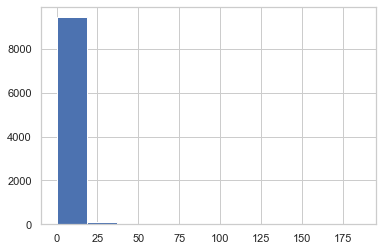

In [503]:
def simple_divv(a, b):
    if b == 0 and a > 0:
        return 1.01
    elif b == 0 and (a == 0 or pd.isnull(a)):
        return None
    elif b == 0:
        return 1
    
    return a / b

acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'] = acum['listados_atrasos_max_mes'].apply(lambda _: simple_divv(np.mean(_[-3:]), np.mean(_[-6:-3])))
acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].hist()

In [504]:
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYOR_1'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ > 1).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.1'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.1).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.2'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.2).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.3'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.3).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.4'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.4).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.5'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.5).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.6'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.6).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.7'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.7).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.8'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.8).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.9'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ >= 1.9).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_1'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 1).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.9'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.9).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.8'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.8).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.7'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.7).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.6'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.6).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.5'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.5).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.4'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.4).astype(int)
acum['TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.3'] = acum['ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO'].apply(lambda _: _ < 0.3).astype(int)

<AxesSubplot:>

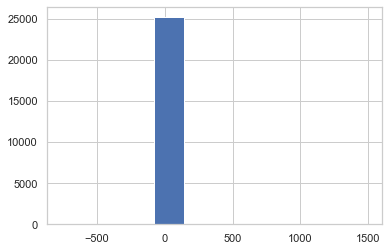

In [505]:




def descripcion_atrasos(lista):
    return """
    Hace 3 meses: {} días
    Hace 6 meses: {} días
    Hace 12 meses: {} días
    """.format(
        lista[0], lista[1], lista[2]
    )
acum["DESC_ATRASO_SF"] = acum['listados_atrasos_max_mes']

acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'] = acum['ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF'] - acum['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF'] 
acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'].hist()

<AxesSubplot:>

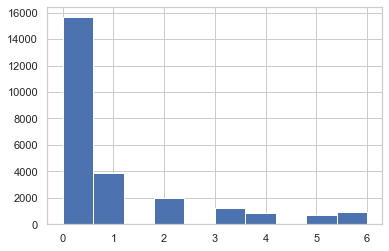

In [506]:
acum['NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF'] = acum['listados_atrasos_max_mes'].apply(
    lambda _: len([mes for mes in _[-6:] if mes > 0])
)                                                                       
acum['NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF'].hist()                                                                                                                                                                                        

<AxesSubplot:>

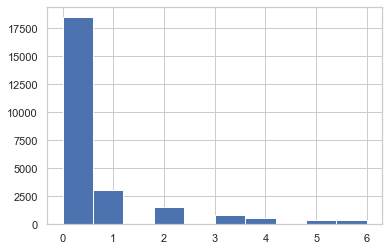

In [507]:
acum['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'] = acum['listados_atrasos_max_mes'].apply(
    lambda _: len([mes for mes in _[-6:] if mes >= 4])
)                                                                       
acum['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'].hist() 

In [508]:
acum['TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF'] = acum['DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF'].apply(lambda _: _> 0).astype(int)
acum['TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF'].value_counts()

0    19954
1     5294
Name: TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF, dtype: int64

In [509]:
del acum['listados_atrasos_max_mes']
acum.head()

,COD_UNICO,PERIODO,ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF,ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF,ATRASO_PROM_U3M_COLDIRECT_VIG_VENC_SF,ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYOR_1,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.1,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MAYORIGUAL_1.2,...,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.7,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.6,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.5,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.4,TIENE_ATRASO_PROM_ULT_TRIM_OVER_TRIM_PASADO_MENOR_0.3,DESC_ATRASO_SF,DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF,NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF,NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF,TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF
0,0000002469,202009,7.454545,9.2,21.0,7.666667,1,1,1,1,...,0,0,0,0,0,"[5, 5, 8, 4, 7, 6, 6, 0, 0, 4, 35, 7]",1.745455,4,4,1
1,0000003392,202009,0.000000,0.0,0.0,NaN,0,0,0,0,...,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000000,0,0,0
2,0000006114,202009,0.000000,0.0,0.0,NaN,0,0,0,0,...,0,0,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000000,0,0,0
3,0000006726,202009,10.000000,12.0,22.5,1.323529,1,1,1,1,...,0,0,0,0,0,"[7, 2, 5, 2, 3, 19, 19, 15, 0, 0, 0, 45]",2.000000,3,3,1
4,0000008045,202009,0.090909,0.2,0.0,0.000000,0,0,0,0,...,1,1,1,1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",0.109091,1,0,1


In [510]:
acum['PERIODO'] = acum['PERIODO'].astype(str)

analisis_cliente = analisis_cliente.merge(
    acum, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1278)

In [511]:
del acum
del atraso_

In [512]:
analisis_cliente['MORE_35PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.35).astype(int)
pd.crosstab(
    analisis_cliente['MORE_35PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_35PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2371,2457,2463,2451,2469,2854,2824,2838,2853,2860
1,57,42,44,43,32,38,76,65,37,36


In [513]:
analisis_cliente['MORE_30PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.3).astype(int)
pd.crosstab(
    analisis_cliente['MORE_30PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_30PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2368,2449,2462,2444,2466,2849,2807,2826,2849,2858
1,60,50,45,50,35,43,93,77,41,38


In [514]:
analisis_cliente['MORE_25PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.25).astype(int)
pd.crosstab(
    analisis_cliente['MORE_25PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_25PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2361,2438,2454,2434,2458,2837,2797,2816,2844,2852
1,67,61,53,60,43,55,103,87,46,44


In [515]:
analisis_cliente['MORE_20PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.2).astype(int)
pd.crosstab(
    analisis_cliente['MORE_20PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_20PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2343,2428,2448,2421,2452,2830,2773,2798,2828,2841
1,85,71,59,73,49,62,127,105,62,55


In [516]:
analisis_cliente['MORE_0.17_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.17).astype(int)
pd.crosstab(
    analisis_cliente['MORE_0.17_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.17_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2332,2420,2441,2417,2446,2827,2761,2791,2822,2836
1,96,79,66,77,55,65,139,112,68,60


In [517]:
analisis_cliente['MORE_0.15_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.15).astype(int)

pd.crosstab(
    analisis_cliente['MORE_0.15_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.15_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2325,2415,2438,2411,2443,2825,2751,2787,2818,2832
1,103,84,69,83,58,67,149,116,72,64


In [518]:
analisis_cliente['MORE_0.13_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.13).astype(int)
pd.crosstab(
    analisis_cliente['MORE_0.13_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.13_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2320,2411,2431,2407,2438,2819,2741,2780,2812,2827
1,108,88,76,87,63,73,159,123,78,69


In [519]:
analisis_cliente['MORE_0.11_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.11).astype(int)

pd.crosstab(
    analisis_cliente['MORE_0.11_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.11_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2307,2406,2420,2400,2433,2815,2729,2770,2808,2821
1,121,93,87,94,68,77,171,133,82,75


In [520]:
analisis_cliente['MORE_0.9_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.09).astype(int)
analisis_cliente['MORE_9PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['MORE_0.9_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'].copy() 
pd.crosstab(
    analisis_cliente['MORE_0.9_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.9_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2295,2397,2410,2391,2424,2808,2718,2756,2800,2816
1,133,102,97,103,77,84,182,147,90,80


In [521]:
analisis_cliente['MORE_0.7_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.07).astype(int)
analisis_cliente['MORE_7PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['MORE_0.7_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'].copy() 
pd.crosstab(
    analisis_cliente['MORE_0.7_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.7_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2281,2387,2393,2383,2412,2802,2702,2739,2790,2800
1,147,112,114,111,89,90,198,164,100,96


In [522]:
analisis_cliente['MORE_0.5_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.05).astype(int)
analisis_cliente['MORE_5PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['MORE_0.5_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'].copy() 
pd.crosstab(
    analisis_cliente['MORE_0.5_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.5_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2250,2367,2376,2363,2401,2789,2669,2725,2778,2780
1,178,132,131,131,100,103,231,178,112,116


In [523]:
analisis_cliente['MORE_0.3_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.03).astype(int)
analisis_cliente['MORE_3PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['MORE_0.3_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'].copy() 
pd.crosstab(
    analisis_cliente['MORE_0.3_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.3_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2210,2341,2354,2332,2379,2771,2644,2698,2758,2762
1,218,158,153,162,122,121,256,205,132,134


In [524]:
analisis_cliente['MORE_0.1_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['PERCENT_DELAY_OVER_DEBT_RCC'].apply(lambda _: _ > 0.01).astype(int)
analisis_cliente['MORE_1PERCENT_DELAY_OVER_TOTAL_DEBT_CC'] = analisis_cliente['MORE_0.1_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'].copy() 
pd.crosstab(
    analisis_cliente['MORE_0.1_PERCENT_DELAY_OVER_TOTAL_DEBT_CC'], analisis_cliente['PERIODO']
)

PERIODO,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
MORE_0.1_PERCENT_DELAY_OVER_TOTAL_DEBT_CC,,,,,,,,,,
0,2140,2292,2312,2291,2338,2739,2612,2658,2739,2739
1,288,207,195,203,163,153,288,245,151,157


### RELEVANTES ATRASOS PROMEDIOS

In [525]:
for col in ['ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF', 'ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF', 'ATRASO_PROM_U3M_COLDIRECT_VIG_VENC_SF',
           'DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF', 'NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF', 'NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF',
           'TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF']:
    
    print(col)
    analisis_cliente[col] = analisis_cliente[[col, 'PERCENT_DELAY_OVER_DEBT_RCC', 'MONTO_ATRASO_TOTAL_SF']].apply(
        lambda _: _[0] if _[1] > 0.1 or _[2] > 15000 else 0, axis=1
    ) # variable de atrasos solo es relaaante si el atraso total supera el 10% del la deuda total DEL SF o supera los 15mil nuevos soles
    #display(analisis_cliente[col].hist())
   

ATRASO_PROM_U12M_COLDIRECT_VIG_VENC_SF
ATRASO_PROM_U6M_COLDIRECT_VIG_VENC_SF
ATRASO_PROM_U3M_COLDIRECT_VIG_VENC_SF
DIFF_ATRASO_PROM_U6M_U12M_COLDIRECT_SF
NRO_MESES_CON_ATRASO_U6M_COLDIRECT_SF
NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF
TIENE_AUMENTO_PROMEDIO_DE_DIAS_DE_ATRASO_COLDIRECT_SF


In [526]:
analisis_cliente['NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF'].value_counts()

0.0    24118
1.0      589
2.0      437
3.0      317
4.0      242
6.0      242
5.0      181
Name: NRO_MESES_CON_ATRASO_4diasomas_U6M_COLDIRECT_SF, dtype: int64

#### >>> SE DEJA DE VER ATRASOS MOMENTANEAMENTE Y SE PASA A DEUDA POR PRODUCTOS

### PIVOTEO DE PRODUCTOS SOBRE VIGENTES Y VENCIDOS

In [527]:
vigente['DEUDA_TOTAL_RCC'].tail()

143808    1131591.15
143809    2706857.17
143810       3624.58
143811    1763876.43
143812    1872390.86
Name: DEUDA_TOTAL_RCC, dtype: float64

In [528]:
pivoteo = pd.pivot_table(
    vigente, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['PRODUCTO', 'SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)
pivoteo.columns = [('_'.join(col)).replace(' ', '_')  for col in pivoteo.columns]
pivoteo.head(3)

COMEX_VENCIDO  COMEX_VIGENTE  DESCUENTOS_VENCIDO  \
COD_UNICO  PERIODO                                                     
0000002469 201908             0.0       630000.0                 0.0   
           201909             0.0       630000.0                 0.0   
           201910             0.0            0.0                 0.0   

                    DESCUENTOS_VIGENTE  FACTORING_VENCIDO  FACTORING_VIGENTE  \
COD_UNICO  PERIODO                                                             
0000002469 201908           6336358.09                0.0         2114339.35   
           201909           5858778.12                0.0         2324564.10   
           201910           6521895.75                0.0         2163183.47   

                    LEASING_VENCIDO  LEASING_VIGENTE  OTROS_VIGENTE  \
COD_UNICO  PERIODO                                                    
0000002469 201908               0.0              0.0            0.0   
           201909               0.0              0.0            0.0   
           201910               0.0              0.0            0.0   

                    PRESTAMOS_VENCIDO  PRESTAMOS_VIGENTE  \
COD_UNICO  PERIODO                                         
0000002469 201908                 0.0          1942383.0   
           201909                 0.0          1992865.0   
           201910                 0.0          2585821.0   

                    SOBREGIROS_/_AVANCES_VENCIDO  \
COD_UNICO  PERIODO                                 
0000002469 201908                            0.0   
           201909                            0.0   
           201910                            0.0   

                    SOBREGIROS_/_AVANCES_VIGENTE       total_  
COD_UNICO  PERIODO                                             
0000002469 201908                           0.00  11023080.44  
           201909                           0.00  10806207.22  
           201910                       39144.75  11310044.97

In [529]:
for col in pivoteo.columns:
    pivoteo['MONTO_' + col + '_U2M'] = pivoteo[col].copy()
    pivoteo['DEBT_' + col + '_PERCENT_ULT_RCC'] = pivoteo[col] / pivoteo['total_']
    del pivoteo[col]
    
pivoteo.head()

MONTO_COMEX_VENCIDO_U2M  \
COD_UNICO  PERIODO                            
0000002469 201908                       0.0   
           201909                       0.0   
           201910                       0.0   
           201911                       0.0   
           201912                       0.0   

                    DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                       
0000002469 201908                                  0.0   
           201909                                  0.0   
           201910                                  0.0   
           201911                                  0.0   
           201912                                  0.0   

                    MONTO_COMEX_VIGENTE_U2M  \
COD_UNICO  PERIODO                            
0000002469 201908                  630000.0   
           201909                  630000.0   
           201910                       0.0   
           201911                       0.0   
           201912                       0.0   

                    DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                       
0000002469 201908                             0.057153   
           201909                             0.058300   
           201910                             0.000000   
           201911                             0.000000   
           201912                             0.000000   

                    MONTO_DESCUENTOS_VENCIDO_U2M  \
COD_UNICO  PERIODO                                 
0000002469 201908                            0.0   
           201909                            0.0   
           201910                            0.0   
           201911                            0.0   
           201912                            0.0   

                    DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                            
0000002469 201908                                       0.0   
           201909                                       0.0   
           201910                                       0.0   
           201911                                       0.0   
           201912                                       0.0   

                    MONTO_DESCUENTOS_VIGENTE_U2M  \
COD_UNICO  PERIODO                                 
0000002469 201908                     6336358.09   
           201909                     5858778.12   
           201910                     6521895.75   
           201911                     6520013.60   
           201912                     6655514.39   

                    DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC  \
COD_UNICO  PERIODO                                            
0000002469 201908                                  0.574826   
           201909                                  0.542168   
           201910                                  0.576646   
           201911                                  0.581207   
           201912                                  0.601866   

                    MONTO_FACTORING_VENCIDO_U2M  \
COD_UNICO  PERIODO                                
0000002469 201908                           0.0   
           201909                           0.0   
           201910                           0.0   
           201911                           0.0   
           201912                           0.0   

                    DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC  ...  \
COD_UNICO  PERIODO                                          ...   
0000002469 201908                                      0.0  ...   
           201909                                      0.0  ...   
           201910                                      0.0  ...   
           201911                                      0.0  ...   
           201912                                      0.0  ...   

                    MONTO_PRESTAMOS_VENCIDO_U2M  \
COD_UNICO  PERIODO                                
00

In [530]:
for col in [_ for _ in pivoteo.columns if '_PERCENT_ULT_RCC' in _.upper()]:
    print(col, col.replace('DEBT_', 'MONTO_').replace('_PERCENT_ULT_RCC', '_U2M'))

DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC MONTO_COMEX_VENCIDO_U2M
DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC MONTO_COMEX_VIGENTE_U2M
DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC MONTO_DESCUENTOS_VENCIDO_U2M
DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC MONTO_DESCUENTOS_VIGENTE_U2M
DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC MONTO_FACTORING_VENCIDO_U2M
DEBT_FACTORING_VIGENTE_PERCENT_ULT_RCC MONTO_FACTORING_VIGENTE_U2M
DEBT_LEASING_VENCIDO_PERCENT_ULT_RCC MONTO_LEASING_VENCIDO_U2M
DEBT_LEASING_VIGENTE_PERCENT_ULT_RCC MONTO_LEASING_VIGENTE_U2M
DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC MONTO_OTROS_VIGENTE_U2M
DEBT_PRESTAMOS_VENCIDO_PERCENT_ULT_RCC MONTO_PRESTAMOS_VENCIDO_U2M
DEBT_PRESTAMOS_VIGENTE_PERCENT_ULT_RCC MONTO_PRESTAMOS_VIGENTE_U2M
DEBT_SOBREGIROS_/_AVANCES_VENCIDO_PERCENT_ULT_RCC MONTO_SOBREGIROS_/_AVANCES_VENCIDO_U2M
DEBT_SOBREGIROS_/_AVANCES_VIGENTE_PERCENT_ULT_RCC MONTO_SOBREGIROS_/_AVANCES_VIGENTE_U2M
DEBT_total__PERCENT_ULT_RCC MONTO_total__U2M


In [531]:
### RELEVANTE
def get_monto_minimo(name):
    return 5000 if 'SOBREGIRO' in name.upper() else 15000

for col in [_ for _ in pivoteo.columns if '_PERCENT_ULT_RCC' in _.upper()]:
    monto_minimo = get_monto_minimo(col)
    pivoteo[col.replace('DEBT_', 'TIENE_DEUDA_').replace('_PERCENT_ULT_RCC', '_RCC')] = pivoteo[[col, col.replace('DEBT_', 'MONTO_').replace('_PERCENT_ULT_RCC', '_U2M')]].apply(
        lambda _: 1 if _[0] >= 0.1 or _[1] >= monto_minimo else 0, axis=1   ## RELEVANTE ... tiene deuda si el porcentaje es mayor a 0.5%
    )
pivoteo = pivoteo.reset_index()
pivoteo.head()

,COD_UNICO,PERIODO,MONTO_COMEX_VENCIDO_U2M,DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC,MONTO_COMEX_VIGENTE_U2M,DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC,MONTO_DESCUENTOS_VENCIDO_U2M,DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC,MONTO_DESCUENTOS_VIGENTE_U2M,DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC,...,TIENE_DEUDA_FACTORING_VENCIDO_RCC,TIENE_DEUDA_FACTORING_VIGENTE_RCC,TIENE_DEUDA_LEASING_VENCIDO_RCC,TIENE_DEUDA_LEASING_VIGENTE_RCC,TIENE_DEUDA_OTROS_VIGENTE_RCC,TIENE_DEUDA_PRESTAMOS_VENCIDO_RCC,TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC,TIENE_DEUDA_SOBREGIROS_/_AVANCES_VENCIDO_RCC,TIENE_DEUDA_SOBREGIROS_/_AVANCES_VIGENTE_RCC,TIENE_DEUDA_total__RCC
0,0000002469,201908,0.0,0.0,630000.0,0.057153,0.0,0.0,6336358.09,0.574826,...,0,1,0,0,0,0,1,0,0,1
1,0000002469,201909,0.0,0.0,630000.0,0.058300,0.0,0.0,5858778.12,0.542168,...,0,1,0,0,0,0,1,0,0,1
2,0000002469,201910,0.0,0.0,0.0,0.000000,0.0,0.0,6521895.75,0.576646,...,0,1,0,0,0,0,1,0,1,1
3,0000002469,201911,0.0,0.0,0.0,0.000000,0.0,0.0,6520013.60,0.581207,...,0,1,0,0,0,0,1,0,0,1
4,0000002469,201912,0.0,0.0,0.0,0.000000,0.0,0.0,6655514.39,0.601866,...,0,1,0,0,0,0,1,0,0,1


In [532]:
pivoteo['PERIODO'] = pivoteo['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]

pivoteo.head()

202106


,COD_UNICO,PERIODO,MONTO_COMEX_VENCIDO_U2M,DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC,MONTO_COMEX_VIGENTE_U2M,DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC,MONTO_DESCUENTOS_VENCIDO_U2M,DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC,MONTO_DESCUENTOS_VIGENTE_U2M,DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC,...,TIENE_DEUDA_FACTORING_VENCIDO_RCC,TIENE_DEUDA_FACTORING_VIGENTE_RCC,TIENE_DEUDA_LEASING_VENCIDO_RCC,TIENE_DEUDA_LEASING_VIGENTE_RCC,TIENE_DEUDA_OTROS_VIGENTE_RCC,TIENE_DEUDA_PRESTAMOS_VENCIDO_RCC,TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VENCIDO_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC,TIENE_DEUDA_total__RCC
0,0000002469,201909,0.0,0.0,630000.0,0.057153,0.0,0.0,6336358.09,0.574826,...,0,1,0,0,0,0,1,0,0,1
1,0000002469,201910,0.0,0.0,630000.0,0.058300,0.0,0.0,5858778.12,0.542168,...,0,1,0,0,0,0,1,0,0,1
2,0000002469,201911,0.0,0.0,0.0,0.000000,0.0,0.0,6521895.75,0.576646,...,0,1,0,0,0,0,1,0,1,1
3,0000002469,201912,0.0,0.0,0.0,0.000000,0.0,0.0,6520013.60,0.581207,...,0,1,0,0,0,0,1,0,0,1
4,0000002469,202001,0.0,0.0,0.0,0.000000,0.0,0.0,6655514.39,0.601866,...,0,1,0,0,0,0,1,0,0,1


In [533]:
 pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].head()

,TIENE_DEUDA_COMEX_VIGENTE_RCC,TIENE_DEUDA_DESCUENTOS_VIGENTE_RCC,TIENE_DEUDA_FACTORING_VIGENTE_RCC,TIENE_DEUDA_LEASING_VIGENTE_RCC,TIENE_DEUDA_OTROS_VIGENTE_RCC,TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC,TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC
0,1,1,1,0,0,1,0
1,1,1,1,0,0,1,0
2,0,1,1,0,0,1,1
3,0,1,1,0,0,1,0
4,0,1,1,0,0,1,0


In [534]:
pivoteo['NRO_PROD_DEUDA_VIGENTE_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].sum(axis=1)
pivoteo['NRO_PROD_DEUDA_VENCIDO_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VENCIDO' in col.upper()]].sum(axis=1)
pivoteo.columns

Index(['COD_UNICO', 'PERIODO', 'MONTO_COMEX_VENCIDO_U2M',
       'DEBT_COMEX_VENCIDO_PERCENT_ULT_RCC', 'MONTO_COMEX_VIGENTE_U2M',
       'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'MONTO_DESCUENTOS_VENCIDO_U2M',
       'DEBT_DESCUENTOS_VENCIDO_PERCENT_ULT_RCC',
       'MONTO_DESCUENTOS_VIGENTE_U2M',
       'DEBT_DESCUENTOS_VIGENTE_PERCENT_ULT_RCC',
       'MONTO_FACTORING_VENCIDO_U2M', 'DEBT_FACTORING_VENCIDO_PERCENT_ULT_RCC',
       'MONTO_FACTORING_VIGENTE_U2M', 'DEBT_FACTORING_VIGENTE_PERCENT_ULT_RCC',
       'MONTO_LEASING_VENCIDO_U2M', 'DEBT_LEASING_VENCIDO_PERCENT_ULT_RCC',
       'MONTO_LEASING_VIGENTE_U2M', 'DEBT_LEASING_VIGENTE_PERCENT_ULT_RCC',
       'MONTO_OTROS_VIGENTE_U2M', 'DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC',
       'MONTO_PRESTAMOS_VENCIDO_U2M', 'DEBT_PRESTAMOS_VENCIDO_PERCENT_ULT_RCC',
       'MONTO_PRESTAMOS_VIGENTE_U2M', 'DEBT_PRESTAMOS_VIGENTE_PERCENT_ULT_RCC',
       'MONTO_SOBREGIROS__AVANCES_VENCIDO_U2M',
       'DEBT_SOBREGIROS__AVANCES_VENCIDO_PERCENT_ULT_RCC',
   

In [535]:
pivoteo['NRO_PROD_DEUDA_VIGENTE_SF_ULT_RCC'].value_counts()

1    21171
2    19345
3    12414
4     6552
5     1274
0      356
6       84
Name: NRO_PROD_DEUDA_VIGENTE_SF_ULT_RCC, dtype: int64

In [536]:
pivoteo['NRO_PROD_DEUDA_VENCIDO_SF_ULT_RCC'].value_counts()

0    59465
1     1529
2      170
3       28
4        2
5        2
Name: NRO_PROD_DEUDA_VENCIDO_SF_ULT_RCC, dtype: int64

In [537]:
pivoteo['TIENE_SOBREGIRO_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_SOBREGIRO_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)
pivoteo['TIENE_SOBREGIRO_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_LEASING_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_OTROS_Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['DEBT_OTROS_VIGENTE_PERCENT_ULT_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_LEASING_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_Y__SOBREGIRO_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'TIENE_DEUDA_SOBREGIROS__AVANCES_VIGENTE_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE_PRESTAMOS_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_DEUDA_LEASING_VIGENTE_RCC', 'TIENE_DEUDA_PRESTAMOS_VIGENTE_RCC', 'DEBT_COMEX_VIGENTE_PERCENT_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)

In [538]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1296)


(26910, 1351)

In [539]:
pivoteo = pd.pivot_table(
    deuda, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo['total'] = pivoteo.sum(axis=1)
pivoteo['PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC'] = pivoteo['VENCIDO'] / pivoteo['total']
pivoteo.head()

SITUACION           JUDICIAL  REFINANCIADO  VENCIDO      VIGENTE        total  \
COD_UNICO  PERIODO                                                              
0000002469 201907        0.0           0.0      0.0  11023080.44  11023080.44   
           201908        0.0           0.0      0.0  10806207.22  10806207.22   
           201909        0.0           0.0      0.0  11310044.97  11310044.97   
           201910        0.0           0.0      0.0  11218066.89  11218066.89   
           201911        0.0           0.0      0.0  11058140.05  11058140.05   

SITUACION           PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC  
COD_UNICO  PERIODO                                            
0000002469 201907                                        0.0  
           201908                                        0.0  
           201909                                        0.0  
           201910                                        0.0  
           201911                                        0.0

In [540]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo.reset_index()[['PERIODO', 'COD_UNICO', 'PERCENT_DEBT_VENCIDO_S_DTOTAL_SF_ULT_RCC']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1351)


(26910, 1352)

## PRODUCTO NO IBK DEUDA RCC

In [541]:
try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

In [542]:
query_deuda_NO_IBK = """
    SELECT * FROM ODS.HD_VMVP_DEUDA_NO_IBK_ALERTA_CARTERA_BE WITH (NOLOCK) 
    WHERE SITUACION IN ('VIGENTE', 'VENCIDO')
"""
deuda_no_ibk = pd.read_sql(
   query_deuda_NO_IBK , connection_market
)
deuda_no_ibk.head(10)

,COD_UNICO,PERIODO,SITUACION,TIPO_PRODUCTO,PRODUCTO,MTOSALDO
0,0000006726,201907,VENCIDO,COL. DIRECTAS,DESCUENTOS,6480.67
1,0000008045,201907,VIGENTE,COL. DIRECTAS,FACTORING,9899298.45
2,0000042044,201907,VIGENTE,COL. DIRECTAS,DESCUENTOS,3680934.46
3,0000048819,201907,VIGENTE,COL. DIRECTAS,COMEX,49635000.00
4,0000053025,201907,VIGENTE,COL. DIRECTAS,FACTORING,3037202.97
5,0000053249,201907,VIGENTE,COL. DIRECTAS,FACTORING,5433870.75
6,0000054635,201907,VIGENTE,COL. DIRECTAS,DESCUENTOS,748996.15
7,0000056564,201907,VIGENTE,COL. DIRECTAS,SOBREGIROS / AVANCES,109.43
8,0000060467,201907,VIGENTE,COL. DIRECTAS,COMEX,57907500.00
9,0000060624,201907,VIGENTE,COL. DIRECTAS,SOBREGIROS / AVANCES,9612656.87


In [543]:
pivoteo = pd.pivot_table(
    deuda_no_ibk, values='MTOSALDO', index=['COD_UNICO', 'PERIODO'], columns=['PRODUCTO', 'SITUACION'], aggfunc=np.sum, fill_value=0
)
pivoteo.columns = [('TIENE_EN_OTRAENTIDAD_DEBT_' + '_'.join(col)).replace(' ', '_') + '_SF_ULT_RCC' for col in pivoteo.columns]
pivoteo.head()

TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC  \
COD_UNICO  PERIODO                                                       
0000002469 201907                                                 0.0    
           201908                                                 0.0    
           201909                                                 0.0    
           201910                                                 0.0    
           201911                                                 0.0    

                    TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC  \
COD_UNICO  PERIODO                                                       
0000002469 201907                                            630000.0    
           201908                                            630000.0    
           201909                                                 0.0    
           201910                                                 0.0    
           201911                                                 0.0    

                    TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC  \
COD_UNICO  PERIODO                                                            
0000002469 201907                                                 0.0         
           201908                                                 0.0         
           201909                                                 0.0         
           201910                                                 0.0         
           201911                                                 0.0         

                    TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC  \
COD_UNICO  PERIODO                                                            
0000002469 201907                                          5921863.66         
           201908                                          5684137.83         
           201909                                          6521895.75         
           201910                                          6520013.60         
           201911                                          6655514.39         

                    TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC  \
COD_UNICO  PERIODO                                                           
0000002469 201907                                                 0.0        
           201908                                                 0.0        
           201909                                                 0.0        
           201910                                                 0.0        
           201911                                                 0.0        

                    TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC  \
COD_UNICO  PERIODO                                                           
0000002469 201907                                          2114339.35        
           201908                                          2324564.10        
           201909                                          2163183.47        
           201910                                          2133364.29        
           201911                                          1339173.66        

                    TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC  \
COD_UNICO  PERIODO                                                         
0000002469 201907                                                 0.0      
           201908                                                 0.0      
           201909                                                 0.0      
           201910                                                 0.0      
           201911                                                 0.0      

                    TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC  \
COD_UNICO  PERIODO                                                         
0000002469 201907                                                 0.0      
           201908  

<AxesSubplot:>

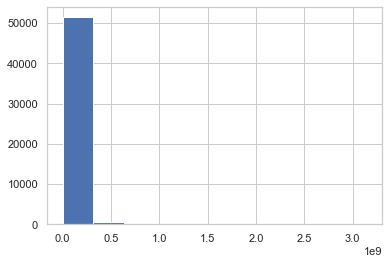

In [544]:
pivoteo['TOTAL'] = pivoteo.sum(axis=1)
pivoteo['TOTAL'].hist()

In [545]:
def div_simple(a, b):
    if pd.isnull(b) or b == 0:
        return 0
    
    return a / b

def get_monto_minimo(name):
    return 5000 if 'SOBREGIRO' in name.upper() else 15000

### RELEVANTES
for col in pivoteo.columns:
    monto_minimo =  get_monto_minimo(col)
    pivoteo[col] = pivoteo[[col, 'TOTAL']].apply(
        lambda _: 1 if _[0] > monto_minimo or div_simple(_[0], _[1]) >= 0.1  else 0 , 
        axis=1
)  ##### PRODUCTO RELEVANTE SI TOMA MÁS DEL 10% 0.05

In [546]:

pivoteo = pivoteo.reset_index()
pivoteo['PERIODO'] = pivoteo['PERIODO'].apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(pivoteo['PERIODO'].max())
pivoteo.columns = [_.replace('/', '') for _ in pivoteo.columns]

pivoteo['NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VENCIDO' in col.upper()]].sum(axis=1)
pivoteo['NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC'] = pivoteo[[col for col in pivoteo.columns if 'TIENE' in col.upper() and 'VIGENTE' in col.upper()]].sum(axis=1)

pivoteo['TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[['TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0, axis=1
).astype(int)
pivoteo['TIENE__OTRA_ENTIDAD_PRESTAMOS_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC'] = pivoteo[
    ['TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC']].apply(
    lambda _: _[0] > 0 and _[1] > 0 and _[2] > 0, axis=1
).astype(int)

pivoteo.head()

202105


,COD_UNICO,PERIODO,TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC,...,TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VENCIDO_SF_ULT_RCC,TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VIGENTE_SF_ULT_RCC,TOTAL,NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC,NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC,TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIGENTES_SF_ULT_RCC,TIENE__OTRA_ENTIDAD_PRESTAMOS_S_COMEX_Y_LEASING_VIGENTES_SF_ULT_RCC
0,0000002469,201908,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,4,1,0,0
1,0000002469,201909,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,4,1,0,0
2,0000002469,201910,0,0,0,1,0,1,0,0,...,0,1,0,1,1,0,4,0,0,0
3,0000002469,201911,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,3,0,0,0
4,0000002469,201912,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,3,0,0,0


In [547]:
print(list(pivoteo.columns))

['COD_UNICO', 'PERIODO', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_COMEX_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_DESCUENTOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_FACTORING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_LEASING_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_OTROS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_PRESTAMOS_VIGENTE_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VENCIDO_SF_ULT_RCC', 'TIENE_EN_OTRAENTIDAD_DEBT_SOBREGIROS__AVANCES_VIGENTE_SF_ULT_RCC', 'TOTAL', 'NRO_PROD_OTRA_ENTIDAD_DEUDAS_VENCIDO_SF_ULT_RCC', 'NRO_PROD_OTRA_ENTIDAD_DEUDA_VIGENTE_SF_ULT_RCC', 'TIENE_OTRA_ENTIDAD_PRESTAMOS_Y_COMEX_VIGENTES_SF_ULT_RCC', 'TIENE__OTRA_ENTIDAD_PRESTAMOS__Y_LEASING_VIG

In [548]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    pivoteo, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

(26910, 1352)


(26910, 1371)

### VOLVEMOS A RCC INCKUIDO IBK

In [549]:
vigente.shape

(142634, 13)

In [550]:
vigente['PRODUCTO'].value_counts()

PRESTAMOS               54663
LEASING                 35907
DESCUENTOS              19099
COMEX                   15550
SOBREGIROS / AVANCES    10941
FACTORING                6241
OTROS                     233
Name: PRODUCTO, dtype: int64

In [551]:
atraso_ = atrasox[atrasox['SITUACION'].isin(['VIGENTE', 'VENCIDO'])].copy()   ## CAMBIO 09/04/2021

print(atraso_['PERIODO'].max())
atraso_['PERIODO'] = atraso_['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)
print(atraso_['PERIODO'].max())

atraso_.shape

202104
202105


(132101, 31)

In [552]:
bancos_atraso_ = atraso_.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO': 'sum',
    'MTOSALDO_IBK': 'sum',
    'MTOSALDO_BBVA': 'sum',
    'MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum',
    'MTOSALDO_SCOTIA': 'sum',
    'MAX_DIAS_ATRASO_SF': 'max',
    'MAX_DIAS_ATRASO_IBK': 'max', 
    'MAX_DIAS_ATRASO_BBVA': 'max',
    'MAX_DIAS_ATRASO_BCP': 'max',
    'MAX_DIAS_ATRASO_BIF': 'max', 
    'MAX_DIAS_ATRASO_SCOTIA': 'max'
}).reset_index()

In [553]:
bancos = vigente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO': 'sum',
    'MTOSALDO_IBK': 'sum','MTOSALDO_BBVA': 'sum','MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum','MTOSALDO_SCOTIA': 'sum',
    #'MAX_DIAS_ATRASO_SF': 'max',
    #'MAX_DIAS_ATRASO_IBK': 'max', 'MAX_DIAS_ATRASO_BBVA': 'max', 'MAX_DIAS_ATRASO_BCP': 'max',
    #'MAX_DIAS_ATRASO_BIF': 'max', 'MAX_DIAS_ATRASO_SCOTIA': 'max'
    
}).reset_index()

cols_bank = [_ for _ in bancos.columns if 'MTOSALDO_' in _]
print(cols_bank)
cols_dias = [_ for _ in bancos_atraso_.columns if 'DIAS' in _]
print(cols_dias)

SpecificationError: Column(s) ['MAX_DIAS_ATRASO_BBVA', 'MAX_DIAS_ATRASO_BCP', 'MAX_DIAS_ATRASO_BIF', 'MAX_DIAS_ATRASO_IBK', 'MAX_DIAS_ATRASO_SCOTIA', 'MAX_DIAS_ATRASO_SF'] do not exist

In [ ]:
def get_desc_deuda(lista):
    return """Col. directas:
    IBK S/. {:,.2f}
    BBVA S/. {:,.2f}
    BCP S/. {:,.2f}
    BIF S/. {:,.2f}
    SCOTIA S/. {:,.2f}""".format(
        lista[0], lista[1], lista[2], lista[3], lista[4]
    )

bancos['DESCRIPTION_MTO_DEUDA_BANCO_PRIN_SF'] = bancos[cols_bank].apply(lambda _: get_desc_deuda(_), axis= 1)

In [ ]:
bancos['DESCRIPTION_MTO_DEUDA_BANCO_PRIN_SF'].head()

In [ ]:
atrasox.shape

In [ ]:
def get_desc_atraso(lista):
    return """Atrasos en Col. directas (Vig. + Venc.):
    IBK {} días
    BBVA {} días
    BCP {} días
    BIF {} días
    SCOTIA {}  días""".format(
        lista[0], lista[1], lista[2], lista[3], lista[4]
    )

bancos_atraso_['DESCRIPTION_DIAS_ATRASO_BANCO_PRIN_SF'] = bancos_atraso_[cols_dias[1:]].apply(lambda _: get_desc_atraso(_), axis= 1)

In [ ]:
bancos_atraso_['DESCRIPTION_DIAS_ATRASO_BANCO_PRIN_SF'].head()

In [ ]:
def percent_deuda_other_banks(listado):
    sf = listado[0]
    other_banks_prin = listado[1] + listado[2] + listado[3] + listado[4] 
    if sf == 0:
        return 0
    
    return other_banks_prin / sf

bancos['DEBT_PERCENT_OTHER_BANKS_PRIN'] = bancos[
    ['MTOSALDO','MTOSALDO_BBVA', 'MTOSALDO_BCP', 'MTOSALDO_BIF', 'MTOSALDO_SCOTIA']
].apply(
    lambda _: percent_deuda_other_banks(list(_)), axis=1
)

bancos['NRO_BANCOS_PRIN_DEUDA'] = bancos[cols_bank].apply(
    lambda _: len([bank for bank in _ if bank > 0]), axis=1
)

bancos['NRO_BANCOS_MONTO_DEUDA_MAYOR_QUE_IBK'] = bancos[cols_bank].apply(
    lambda _: len([bank for bank in _ if bank > _[0]]), axis=1
)

bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)
for col in cols_bank:
    bancos['PERCETN_' + col] =  bancos[col] /  bancos['MTOSALDO']
    del bancos[col]

bancos.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

In [ ]:
print(cols_dias[1:])

In [ ]:
bancos_atraso_['NRO_BANCOS_PRIN_CON_DIAS_ATRASO'] = bancos_atraso_[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > 0]), axis=1
)

bancos_atraso_.sort_values(by=['COD_UNICO', 'PERIODO']).tail(2)

In [ ]:
bancos_atraso_['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_4'] = bancos_atraso_[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > 4]), axis=1
)

bancos_atraso_.sort_values(by=['COD_UNICO', 'PERIODO']).tail(2)

In [ ]:
bancos_atraso_['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK_atrasos_mayor_cero'] = bancos_atraso_[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > _[0] and _[0] > 0]), axis=1
)
bancos_atraso_.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

In [ ]:
bancos_atraso_['NRO_BANCOS_PRIN_CON_DIAS_ATRASO_MAYOR_A_IBK'] = bancos_atraso_[cols_dias[1:]].apply(
    lambda _: len([bank for bank in _ if bank > _[0]]), axis=1
)
bancos_atraso_.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

In [ ]:
bancos.columns

In [ ]:
bancos_atraso_.columns

In [ ]:
bancos.columns = [col.replace('MTOSALDO', 'DEBT_IN_') + 'SF_ULT_RCC' if col not in ['COD_UNICO', 'PERIODO'] else col for col in bancos.columns]
bancos_atraso_.columns = [col.replace('MTOSALDO', 'DEBT_IN_') + 'SF_ULT_RCC' if col not in ['COD_UNICO', 'PERIODO'] else col for col in bancos_atraso_.columns]

print(bancos['PERIODO'].max())
print(bancos_atraso_['PERIODO'].max())
print(analisis_cliente['PERIODO'].max())

In [ ]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    bancos, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

In [ ]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    bancos_atraso_, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

#### HISTORIA DEUDA

In [ ]:
cols_bank

In [ ]:
gc.collect()

In [ ]:
bancos2 = vigente.groupby(by=['COD_UNICO','PERIODO']).agg({
    'MTOSALDO_IBK': 'sum','MTOSALDO_BBVA': 'sum','MTOSALDO_BCP': 'sum',
    'MTOSALDO_BIF': 'sum','MTOSALDO_SCOTIA': 'sum',
    
}).reset_index()
bancos2.head(3)

In [ ]:
bancos2['PERIODO'].max()

In [ ]:
new_dataFrame = bancos2[bancos2['COD_UNICO'] == '00000000000000']
new_dataFrame

In [ ]:
periodo_int = [int(_) for _ in list(data_cliente['PERIODO'].unique())]

print(periodo_int)

In [ ]:
cols_new_dataFrame = list(new_dataFrame.columns)
print('cols_new_dataFrame :', cols_new_dataFrame)

for cliente in analisis_cliente['COD_UNICO'].unique():
    
    data_cliente = bancos2[bancos2['COD_UNICO'] == cliente]
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(int)
    data_cliente = data_cliente.set_index('PERIODO').reindex(periodo_int).reset_index()
    data_cliente['PERIODO'] = data_cliente['PERIODO'].astype(str)
    data_cliente['COD_UNICO'] = cliente
    
    new_dataFrame = pd.concat(
        [new_dataFrame[cols_new_dataFrame], data_cliente[cols_new_dataFrame]], axis=0
    )

del data_cliente
data_cliente = new_dataFrame.copy()
del new_dataFrame

data_cliente['PERIODO'].value_counts()

In [ ]:
bancos2 = data_cliente.copy().fillna(0)
bancos2.isnull().sum()

In [ ]:
bancos2.columns

In [ ]:
dd = {k: list for k in bancos2.columns if k not in ['PERIODO', 'COD_UNICO']}
dd

In [ ]:
contador = 1
dd = {k: list for k in bancos2.columns if k not in ['PERIODO', 'COD_UNICO']}

for tramo in tramos:
    _3_meses_previos = [int(_) for _ in tramo[2]]
    print(tramo[0], _3_meses_previos)
    
    _3m_actual = bancos2[bancos2['PERIODO'].astype(int).isin(_3_meses_previos)].groupby(by=['COD_UNICO']).agg(dd)
    _3m_actual.columns =  ['listado_' + '_'.join(_) if isinstance(_, tuple) else _ for _ in _3m_actual.columns]

    print("/"*100)
    
    _3m_actual = _3m_actual.reset_index().rename(columns={'index': 'COD_UNICO'})
    _3m_actual['PERIODO'] = tramo[0]

    if contador == 1:
        acum_3 = _3m_actual.copy()
    else:
        acum_3 = pd.concat(
            [acum_3, _3m_actual], axis=0
        )
        
    print(acum_3.shape)
    contador +=1
    del _3m_actual
acum_3.head()

#### QUEDA AL AIRE ALNO VER UN COMPORTAMEITNO EN COMUN

### MIRANDO 3 MESES

In [ ]:
acum_3 = acum_3.set_index(['COD_UNICO', 'PERIODO'])

for col in acum_3.columns:
    acum_3['TIENE_DEBT_' + col + '_SF_U3M'] = acum_3[col].apply(lambda _: 1 if sum(_) > 100 else 0)
    acum_3['DEBT_CAIDA_SEGUIDA_' + col + '_U3M_SF'] = acum_3[col].apply(
        lambda _: (_[1] < _[0] and _[2] < _[1]) or ( _[2] < _[0] and _[1] == 0) or ( _[2] < _[1] and _[0] == 0)).astype(int)
    
    acum_3['DEBT_SUBIDA_SEGUIDA_' + col + '_U3M_SF'] = acum_3[col].apply(lambda _: _[1] > _[0] and _[2] >= _[1]).astype(int)   
    acum_3['DEBT_MENOR_' + col + '_DE_U3M_SF'] = acum_3[col].apply(lambda _: _[-1] > 0 and _[-1] == min([mes for mes in _])).astype(int)
    acum_3['DEBT_MAYOR_' + col + '_DE_U3M_SF'] = acum_3[col].apply(lambda _: _[-1] > _[0] and _[-1] > _[-2] and _[-1] > _[-3]).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_ESTE_MES'] = acum_3[col].apply(lambda _: _[-1] < 100).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_U2M'] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100).astype(int)
    acum_3['DEBT_NO_' + col + '_SF_U3M'] = acum_3[col].apply(lambda _: _[-1] < 100 and _[-2] < 100 and _[-3] < 100).astype(int)
    
    acum_3['DEBT_CAIDA_20PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.8
    ).astype(int)
    acum_3['DEBT_CAIDA_30PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.7
    ).astype(int)
    acum_3['DEBT_CAIDA_10PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] <= 0.9
    ).astype(int)
    
    acum_3['DEBT_SUBIDA_20PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.2
    ).astype(int)
    acum_3['DEBT_SUBIDA_30PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.3
    ).astype(int)
    acum_3['DEBT_SUBIDA_10PERCENT_' + col + '_SF_U3M'] = acum_3[col].apply(
        lambda _: _[1] > 100 and _[2] / _[1] >= 1.1
    ).astype(int)
    
    del acum_3[col]

acum_3 = acum_3[[col for col in acum_3.columns if 'SF' in col]]
acum_3.tail()

In [ ]:
[col for col in acum_3 if 'DEBT_MENOR' in col]

In [ ]:
acum_3['NRO_BANCOS_DEBT_MENOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_MAYOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_DEBT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'TOTAL' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_DEBT_MENOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MENOR' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_MAYOR_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'MAYOR' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_CAIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'CAIDA_SEGUIDA' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_DEBT_SUBIDA_SEGUIDA_DE_U3M'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_SEGUIDA' in col and 'IBK' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_CAIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_10PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_CAIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_20PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_CAIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'CAIDA_30PERCENT_' in col and 'IBK' not in col]].sum(axis=1)

acum_3['NRO_BANCOS_NOIBK_SUBIDA_10PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_10PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_SUBIDA_20PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_20PERCENT_' in col and 'IBK' not in col]].sum(axis=1)
acum_3['NRO_BANCOS_NOIBK_SUBIDA_30PERCENT_MES_ANT'] = acum_3[[col for col in acum_3.columns if 'SUBIDA_30PERCENT_' in col and 'IBK' not in col]].sum(axis=1)

acum_3.tail(10)

In [ ]:
acum_3 = acum_3.reset_index()
acum_3['PERIODO'] = acum_3['PERIODO'].astype(str)
analisis_cliente = analisis_cliente.merge(
    acum_3, how='left', on=['PERIODO', 'COD_UNICO']
)
del acum_3
analisis_cliente.head(2)

In [ ]:
analisis_cliente.head(2)

#### ANALISIS DE VARIACION DE DEUDA

In [ ]:
vigente_deuda = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().reset_index()
vigente_deuda

In [ ]:
vigente_deuda['PERIODO'].max()

In [ ]:
new_dataFrame = vigente_deuda[vigente_deuda['COD_UNICO'] == '00001230000000000000'] # artificio para solo obtener columna
new_dataFrame

In [ ]:
print(rango_global)

In [ ]:
cols_new_dataFrame = list(new_dataFrame.columns)
cols_new_dataFrame

In [ ]:
vigente_deuda = pd.pivot_table(vigente_deuda, index=['COD_UNICO'], columns=['PERIODO'], aggfunc='sum', fill_value=0, values='MTOSALDO').unstack().reset_index()
vigente_deuda.columns = ['PERIODO', 'COD_UNICO', 'MTOSALDO']
vigente_deuda.head()

In [ ]:
vigente_deuda.shape

In [ ]:
vigente_deuda.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, vigente_deuda['PERIODO'].max()

In [ ]:
analisis_cliente.shape

In [ ]:
#up = analisis_cliente.copy()
#up[up['PERIODO'].astype(int) >= 202007].to_excel("AVANCE_3.xlsx", index=False)
#up[up['PERIODO'].astype(int) >= 202007]['PERIODO'].value_counts()

## PARADA POR WOE

In [ ]:
analisis_cliente.head(1)

In [ ]:
import scorecardpy as sc

#iv_review_feve = sc.iv(
#    analisis_cliente[
#        (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#    ], 
#    y="target_feve_reducir_salir"
#).reset_index(drop=True).reset_index()

#iv_review_feve.head(20)

In [ ]:
#top_35 = list(iv_review_feve['variable'])[:35] + ['target_feve_reducir_salir']

In [ ]:
#sc.woebin_plot(
#    sc.woebin(
#        sc.var_filter(
#            analisis_cliente[
#                (analisis_cliente['target_feve_reducir_salir'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#            ][top_35],
#            y="target_feve_reducir_salir"), 
#        y="target_feve_reducir_salir"
#    )
#)

In [ ]:
[col for col in analisis_cliente.columns if 'target' in col]

In [ ]:

#iv_review_yoy = sc.iv(
#    analisis_cliente[
#        (analisis_cliente['target_yoy_quartil_05'].notnull()) & (analisis_cliente['PERIODO'].isin(['202008', '202007']))
#    ], 
#    y="target_yoy_quartil_05"
#).reset_index(drop=True).reset_index()

#iv_review_yoy.head(20)

### DEUDITA

In [ ]:
for tramo in tramos[::-1]:
    #print(tramo[0], tramo[-1], tramo[-2])
    historia = tramo[1][-8:-2]
    print( ' histroia ', historia, [
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=1)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=2)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=3)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=4)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=5)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=6)).strftime('%Y%m')
    ],
          ' Mes cerrado', tramo[0] , 'Meses target', tramo[-1], tramo[-2])

### VARIACION DE LA DEUDA CON LA PEQUEÑA HISTORIA QUE SE MANEJA

In [ ]:
gc.collect()

In [ ]:
vigente_deuda['PERIODO'].min(),vigente_deuda['PERIODO'].max()

In [ ]:
dicc_kpi = {
    'MTOSALDO': [list, 'sum']
}
columns_base = ['listado',  'suma_']
contador = 1

for tramo in tramos[::-1]:

    historia =  [str(_) for _ in tramo[1][:-2]]
    historia_contraste = [
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=6)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=5)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=4)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=3)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=2)).strftime('%Y%m'),
        (datetime.strptime(str(tramo[1][0]), '%Y%m') - relativedelta(months=1)).strftime('%Y%m')
    ]
    print(tramo[0], historia, historia_contraste)
    
    _2m_anio_actaul = vigente_deuda[vigente_deuda['PERIODO'].astype(str).isin(historia)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_actaul.columns = [_ + 'historia' for _ in columns_base]
    
    _2m_anio_pasado = vigente_deuda[vigente_deuda['PERIODO'].astype(str).isin(historia_contraste)].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    _2m_anio_pasado.columns = [_ + 'contraste' for _ in columns_base]
    
    data_tramo_deuda = pd.concat(
        [_2m_anio_actaul, _2m_anio_pasado], axis=1
    ).reset_index()
    data_tramo_deuda['PERIODO'] = str(tramo[0])
    
    if contador == 1:
        deuda_cliente = data_tramo_deuda
    else:
        deuda_cliente = pd.concat(
            [deuda_cliente, data_tramo_deuda], axis=0
        )
    
    contador += 1
    #print(data_tramo.head())
    print("--", deuda_cliente.shape, _2m_anio_actaul.shape, _2m_anio_pasado.shape)
    del _2m_anio_actaul
    del _2m_anio_pasado


In [ ]:
print(list(deuda_cliente.columns))
deuda_cliente.head()

In [ ]:
deuda_cliente['MTDO_COL_DIRECTAS_SF_1UM'] = deuda_cliente['listadohistoria'].apply(lambda _: _[-1])
deuda_cliente['MTDO_COL_DIRECTAS_SF_6UM'] = deuda_cliente['listadohistoria'].apply(lambda _: _[-6])
#deuda_cliente['MTDO_COL_DIRECTAS_SF_12UM'] = deuda_cliente['listadohistoria'].apply(lambda _: _[-12])

deuda_cliente['DEBT_TOTAL_CAIDA_20PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.8
).astype(int)
deuda_cliente['DEBT_TOTAL_CAIDA_30PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.7
).astype(int)
deuda_cliente['DEBT_TOTAL_CAIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] <= 0.9
).astype(int)

deuda_cliente['DEBT_TOTAL_SUBIDA_3PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.03
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_5PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.05
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.4
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_50PERCENT_S_DEBT_6MESES_ATRAS'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / _[-6] >= 1.5
).astype(int)

deuda_cliente['DEBT_TOTAL_SUBIDA_3PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.03
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_5PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.05
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_S_PROM_DEBT_U6M'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-6] > 100 and _[-1] / np.mean(_) >= 1.4
).astype(int)


deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_20PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.2
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_30PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.3
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.1
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_40PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.4
).astype(int)
deuda_cliente['DEBT_TOTAL_SUBIDA_50PERCENT_MES_ANT'] = deuda_cliente['listadohistoria'].apply(
    lambda _: _[-2] > 100 and _[-1] / _[-2] >= 1.5
).astype(int)
deuda_cliente.head()

In [ ]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_MES_ANT'].value_counts()

In [ ]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_S_PROM_DEBT_U6M'].value_counts()

In [ ]:
deuda_cliente[deuda_cliente['PERIODO'].astype(int) >= 202007]['DEBT_TOTAL_SUBIDA_10PERCENT_S_DEBT_6MESES_ATRAS'].value_counts()

In [ ]:
def diff_vals(listado):
    tamanio = len(listado)
    if tamanio <= 1:
        return listado
    
    return [listado[i] - listado[i-1] for i in range(1, tamanio)]

diff_vals([1, 2, 7])

In [ ]:
for col in ['listadocontraste', 'listadohistoria']:
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: [0 if pd.isnull(val) else val for val in _])
    deuda_cliente[col] = deuda_cliente[col].apply(diff_vals)
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: [val for val in _ if val < 0])
    deuda_cliente[col] = deuda_cliente[col].apply(lambda _: 0 if len(_) == 0 else sum(_) / 5)

In [ ]:
deuda_cliente = deuda_cliente.rename(columns={
    'listadocontraste': 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS',
    'listadohistoria': 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT'
})
deuda_cliente.head()

In [ ]:
deuda_cliente['DEBT_PORM_u6m_anio_pas'] = deuda_cliente['suma_contraste'].apply(lambda _: _ / 6)
deuda_cliente['DEBT_PORM_u6m_anio_act'] = deuda_cliente['suma_historia'].apply(lambda _: _ / 6)

deuda_cliente['DEBT_rati_u6m_yoy'] = deuda_cliente[['DEBT_PORM_u6m_anio_act', 'DEBT_PORM_u6m_anio_pas']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
deuda_cliente['DEBT_ratio_AVG_TICKET_DECREASE_u6m_yoy'] = deuda_cliente[['AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_ACT', 'AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)

In [ ]:
deuda_cliente.head()

In [ ]:
del deuda_cliente['AVG_TICKET_PROM_DEBT_DECREASE_U6M_ANIO_PAS']
del deuda_cliente['suma_historia']
del deuda_cliente['suma_contraste']
del deuda_cliente['DEBT_PORM_u6m_anio_pas']
deuda_cliente.head()

In [ ]:
deuda_cliente.shape

In [ ]:
deuda_cliente['PERIODO'].max()

In [ ]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    deuda_cliente, how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

#### rescate de nuevas variables de BANCOS

In [ ]:
bancos.shape, bancos.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, bancos['PERIODO'].max()

In [ ]:
bancos.head(30)

In [ ]:
for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2], tramo[1])

In [ ]:
bancos.columns

In [ ]:
for tramo in tramos[::-1]:
    print(tramo[0], tramo[1][:-2])

In [ ]:
dicc_kpi = {
    'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC': ['min', 'max']
}
columns_base = ['minimo_nro_bancos_', 'maximo_nro_bancos_']
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = bancos[bancos['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + 'u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        nro_bancos = u6m
    else:
        nro_bancos = pd.concat(
            [nro_bancos, u6m], axis=0
        )
    
    print(nro_bancos.shape)
    contador += 1

In [ ]:
nro_bancos.columns

In [ ]:
nro_bancos.tail()

In [ ]:
nro_bancos['minimo_nro_bancos_u12m'].isnull().sum()

In [ ]:
nro_bancos['maximo_nro_bancos_u12m'].isnull().sum()

In [ ]:
bancos = bancos[['PERIODO', 'COD_UNICO', 'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC']].merge(
    nro_bancos, how='left', on=['PERIODO', 'COD_UNICO']
)
bancos.head(30)

In [ ]:
bancos[
        (bancos['COD_UNICO'] == '0000006114') & (bancos['PERIODO'].astype(str) == '201912')
]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]

In [ ]:
def debt_variation(actual, minimo, maximo):
    if minimo == maximo:
        return 0
    
    elif actual == minimo and actual != maximo:
        return actual - maximo
    
    elif actual == maximo and actual != minimo:
        return actual - minimo
    else:
        actual - minimo
        
def other_variation(actual, minimo):
    return actual - minimo
        
def diferencia_bancos_diciembre_2019(cod_unico, actual, periodo):
    if int(periodo) < 202007:
        return None # solo hacemos esfuerzo en las cosechas a usar
    try:
        bacnos_201912 = bancos[
            (bancos['COD_UNICO'] == cod_unico) & (bancos['PERIODO'].astype(str) == '201912')
        ]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]
    except:
        try:
            bacnos_201912 = bancos[
                (bancos['COD_UNICO'] == cod_unico) & (bancos['PERIODO'].astype(str) == '202002')
            ]['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC'].iloc[0]
        except:
            return None

    return actual - bacnos_201912

In [ ]:
bancos['minimo_nro_bancos_u12m'] = bancos['minimo_nro_bancos_u12m'].fillna(0)
bancos['maximo_nro_bancos_u12m'] = bancos['maximo_nro_bancos_u12m'].fillna(0)

bancos['VARIAICION_NRO_BANCOS_PRIN_DEBT_u12m'] = bancos[
    ['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'minimo_nro_bancos_u12m', 'maximo_nro_bancos_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

In [ ]:
#bancos['VARIAICION_NRO_BANCOS_CIERRE_2019'] = bancos[
#    ['COD_UNICO', 'NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'PERIODO']].apply(lambda _: diferencia_bancos_diciembre_2019(_[0], _[1], _[2]), axis=1)

bancos['VARIAICION_NRO_BANCOS_CON_MINIMO_U12M'] = bancos[
    ['NRO_BANCOS_PRIN_DEUDASF_ULT_RCC', 'minimo_nro_bancos_u12m']].apply(lambda _: other_variation(_[0], _[1]), axis=1)

bancos.shape, bancos.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, nro_bancos.shape

In [ ]:
#bancos[bancos['PERIODO'].astype(int) > 202007]['VARIAICION_NRO_BANCOS_CIERRE_2019'].hist()

In [ ]:
analisis_cliente = analisis_cliente.merge(
    bancos[['COD_UNICO', 'PERIODO', 'VARIAICION_NRO_BANCOS_PRIN_DEBT_u12m', 'VARIAICION_NRO_BANCOS_CON_MINIMO_U12M']], how='left', on=['PERIODO', 'COD_UNICO']
) #VARIAICION_NRO_BANCOS_CIERRE_2019
analisis_cliente.shape

In [ ]:
#analisis_cliente[analisis_cliente['PERIODO'] == '202009'].to_excel('seleccion_de_variables.xlsx', index=False)

In [ ]:
del deuda_cliente

In [ ]:
gc.collect()

In [ ]:

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

In [ ]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008_2.xlsx', index=False)

#### GARANTIAS

In [ ]:
query_ga = """
    SELECT * FROM ODS.HD_VMVP_GARANTIAS_ALERTAS_CARTERA_BE WITH (NOLOCK)
"""
garantia = pd.read_sql(
  query_ga , connection_market
)
garantia.head(10)

### Sumamos un mes ya que dbe tomar ultimo rcc desfasado

In [ ]:
garantia['PERIODO'] = garantia['PERIODO'] .apply(
    lambda _: (datetime.strptime(_, '%Y%m') + relativedelta(months=1)).strftime('%Y%m')
)

In [ ]:
garantia.shape, garantia.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

In [ ]:
garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'] = garantia[
    ['PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF']].sum(axis=1)

garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'].hist()

In [ ]:
def get_des_gar_ibk(a, b, c):
    return """Garantías IBK:
    AUTOLIQUIDABLES S/. {:,.2f}
    HIPOTECARIAS S/. {:,.2f}
    PRENDAS S/. {:,.2f}
    """.format(a, b, c)
    
garantia['DESCRIPTION_GAR_IBK_ULT_RCC'] = garantia[['GAR_AUTO_IBK', 'GAR_HIPO_IBK', 'GAR_PRENDA_IBK']].apply(
    lambda _: get_des_gar_ibk(_[0],_[1], _[2]), axis=1
)
garantia['DESCRIPTION_GAR_IBK_ULT_RCC'].head()

In [ ]:
def get_des_gar_banks(lista):
    return """Garantías PREF y NO PREF.:
    IBK S/. {:,.2f}
    BBVA S/. {:,.2f}
    BCP S/. {:,.2f}
    BANBIF S/. {:,.2f}
    SCOTIA S/. {:,.2f}
    """.format(lista[0], lista[1], lista[2], lista[3], lista[4])

garantia['DESCRIPTION_GAR_BANK_PRN_RCC'] = garantia[['GAR_TOT_IBK', 'GAR_TOT_BBVA', 'GAR_TOT_BCP', 'GAR_TOT_BIF', 'GAR_TOT_SCOTIA']].apply(lambda _: get_des_gar_banks(_), axis=1)
garantia['DESCRIPTION_GAR_BANK_PRN_RCC'].head()

In [ ]:
#garantia.columns

In [ ]:
def get_cat_percent_gar(val):
    if val <= 0.1:
        return 'menos del 10%'
    elif val < 0.2:
        return 'entre 10% y 20%'
    elif val < 0.3:
        return 'entre 20% y 30%'
    elif val < 0.4:
        return 'entre 30% y 40%'
    elif val < 0.5:
        return 'entre 40% y 50%'
    elif val < 0.5:
        return 'entre 50% y 60%'
    elif val < 0.5:
        return 'entre 60% y 70%'
    elif val < 0.5:
        return 'entre 70% y 80%'
    elif val < 0.5:
        return 'entre 80% y 90%'
    elif val < 0.5:
        return 'entre 90% y 100%'
    else:
        return None
    
garantia['cat_PERCENT_GAR_IBK'] = garantia['PERCENT_GAR_IBK'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_AUTO'] = garantia['PERCENT_GAR_AUTO'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_HIPO'] = garantia['PERCENT_GAR_HIPO'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_PREN_WAR'] = garantia['PERCENT_GAR_PREN_WAR'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_NO_PREFER'] = garantia['PERCENT_GAR_NO_PREFER'].apply(get_cat_percent_gar)
garantia['cat_PERCENT_GAR_OTROS_BANCOS_PRIN'] = garantia['PERCENT_GAR_OTROS_BANCOS_PRIN'].apply(get_cat_percent_gar)

garantia['PERCENT_GAR_AUTO_HIPO'] = garantia['PERCENT_GAR_AUTO'] + garantia['PERCENT_GAR_HIPO']
garantia['cat_PERCENT_GAR_AUTO_HIPO'] = garantia['PERCENT_GAR_AUTO_HIPO'].apply(get_cat_percent_gar)

garantia['PERCENT_GAR_AUTO_HIPO_PREN'] = garantia['PERCENT_GAR_AUTO'] + garantia['PERCENT_GAR_HIPO'] + garantia['PERCENT_GAR_PREN_WAR']
garantia['cat_PERCENT_GAR_AUTO_HIPO_PREN'] = garantia['PERCENT_GAR_AUTO_HIPO_PREN'].apply(get_cat_percent_gar)

In [ ]:
cols_percent = [col for col in garantia.columns if 'PERCENT' in col]
print(cols_percent)

In [ ]:
GAR_BANCOS = ['PERCENT_GAR_IBK', 'PERCENT_GAR_BCP', 'PERCENT_GAR_BBVA', 'PERCENT_GAR_SCOTIA', 'PERCENT_GAR_BIF']

In [ ]:
garantia[GAR_BANCOS + ['COD_UNICO']].head()

In [ ]:
garantia['TIENE_MAS_95PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.95]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_90PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.9]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_85PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.85]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_80PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.8]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_75PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.75]) > 0, axis=1).astype(int)
garantia['TIENE_MAS_70PERCENT_GAR_TOTAL_EN_UN_SOLO_BANCO_PRIN_NO_IBK'] = garantia[GAR_BANCOS[1:]].apply(lambda _: len([bank for bank in _ if bank > 0.7]) > 0, axis=1).astype(int)

garantia['TIENE_MENOS_1PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.01).astype(int)
garantia['TIENE_MENOS_5PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.05).astype(int)
garantia['TIENE_MENOS_10PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.10).astype(int)
garantia['TIENE_MENOS_15PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.25).astype(int)
garantia['TIENE_MENOS_20PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.20).astype(int)
garantia['TIENE_MENOS_25PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.25).astype(int)
garantia['TIENE_MENOS_30PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.3).astype(int)
garantia['TIENE_MENOS_35PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.35).astype(int)
garantia['TIENE_MENOS_40PERCENT_GARTOTAL_IBK'] = garantia['PERCENT_GAR_IBK'].apply(lambda _: _ < 0.4).astype(int)

garantia['MAYOR_PERCENT_GARANTIA_EN_UN_SOLO_BANCO_PRIN'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_))
garantia['TIENE_MAYOR_GARTOTAL_EN_IBK'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[0], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BCP'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[1], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BBVA'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[2], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_SCOTIA'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[3], axis=1).astype(int)
garantia['TIENE_MAYOR_GARTOTAL_EN_BIF'] = garantia[GAR_BANCOS].apply(lambda _: np.max(_) == _[4], axis=1).astype(int)


garantia[GAR_BANCOS + ['TIENE_MAYOR_GARTOTAL_EN_BBVA']].head()

In [ ]:
print(cols_percent + [col for col in garantia.columns if 'TIENE' in col])

In [ ]:
def simple_div_2(a, b):
    if pd.isnull(a) or pd.isnull(b):
        return 0
    if a == 0 or b == 0:
        return 0
    
    return a / b
    

garantia['GAR_TOT_PREFERIDAS_SF'] = garantia[['GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT']].sum(axis=1)
garantia['PERCENT_GAR_PREFERIDAS_BBVA'] = garantia[['GAR_AUTO_HIPO_PRENDA_BBVA', 'GAR_TOT_PREFERIDAS_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)
garantia['PERCENT_GAR_PREFERIDAS_BCP'] = garantia[['GAR_AUTO_HIPO_PRENDA_BCP', 'GAR_TOT_PREFERIDAS_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)
garantia['PERCENT_GAR_PREFERIDAS_BIF'] = garantia[['GAR_AUTO_HIPO_PRENDA_BIF', 'GAR_TOT_PREFERIDAS_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)
garantia['PERCENT_GAR_PREFERIDAS_IBK'] = garantia[['GAR_AUTO_HIPO_PRENDA_IBK', 'GAR_TOT_PREFERIDAS_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)
garantia['PERCENT_GAR_PREFERIDAS_SCOTIA'] = garantia[['GAR_AUTO_HIPO_PRENDA_SCOTIA', 'GAR_TOT_PREFERIDAS_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)

cols_gar_pref = ['PERCENT_GAR_PREFERIDAS_IBK', 'PERCENT_GAR_PREFERIDAS_BCP', 'PERCENT_GAR_PREFERIDAS_BIF', 'PERCENT_GAR_PREFERIDAS_BBVA', 'PERCENT_GAR_PREFERIDAS_SCOTIA']
garantia['NRO_BANCOS_MAYOR_GARANTIA_PREFERIDA'] = garantia[cols_gar_pref].apply(lambda _: len([ban for ban in _ if ban > _[0]]), axis=1)

In [ ]:
garantia['GAR_TOT_AUTO_HIPO_SF'] = garantia[['GAR_AUTO_TOT', 'GAR_HIPO_TOT']].sum(axis=1)
garantia['PERCENT_GAR_AUTO_HIPO_BBVA'] = garantia[['GAR_AUTO_HIPO_BBVA', 'GAR_TOT_AUTO_HIPO_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)
garantia['PERCENT_GAR_AUTO_HIPO_BCP'] = garantia[['GAR_AUTO_HIPO_BCP', 'GAR_TOT_AUTO_HIPO_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)
garantia['PERCENT_GAR_AUTO_HIPO_BIF'] = garantia[['GAR_AUTO_HIPO_BIF', 'GAR_TOT_AUTO_HIPO_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)
garantia['PERCENT_GAR_AUTO_HIPO_IBK'] = garantia[['GAR_AUTO_HIPO_IBK', 'GAR_TOT_AUTO_HIPO_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)
garantia['PERCENT_GAR_AUTO_HIPO_SCOTIA'] = garantia[['GAR_AUTO_HIPO_SCOTIA', 'GAR_TOT_AUTO_HIPO_SF']].apply(lambda _: simple_div_2(_[0], _[1]), axis=1)

cols_gar_auto_hipo = ['PERCENT_GAR_AUTO_HIPO_IBK', 'PERCENT_GAR_AUTO_HIPO_BBVA', 'PERCENT_GAR_AUTO_HIPO_BCP', 'PERCENT_GAR_AUTO_HIPO_BIF', 'PERCENT_GAR_AUTO_HIPO_SCOTIA']
garantia['NRO_BANCOS_MAYOR_GARANTIA_AUTO_HIPO'] = garantia[cols_gar_auto_hipo].apply(lambda _: len([ban for ban in _ if ban > _[0]]), axis=1)

In [ ]:
garantia['MAYOR_GARANTIA_PREFERIDA_BANCO_NO_IBK'] = garantia['NRO_BANCOS_MAYOR_GARANTIA_PREFERIDA'].apply(lambda _: _>=  1).astype(int)
garantia['MAYOR_GARANTIA_AUTO_HIPO_BANCO_NO_IBK'] = garantia['NRO_BANCOS_MAYOR_GARANTIA_AUTO_HIPO'].apply(lambda _: _>=  1).astype(int)

In [ ]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    garantia[list(set(cols_percent + [col for col in garantia.columns if 'TIENE' in col or 'GAR' in col] + ['PERIODO', 'COD_UNICO']))], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

In [ ]:
cols_no_incluidas = [col for col in garantia.columns if col not in cols_percent +  [col for col in garantia.columns if 'TIENE' in col  or 'GAR' in col] + ['PERIODO', 'COD_UNICO']]
print(cols_no_incluidas)

In [ ]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    garantia[cols_no_incluidas + ['PERIODO', 'COD_UNICO']], how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

In [ ]:
vigente.shape, vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().shape

In [ ]:
agrupado_viegente = vigente.groupby(by=['PERIODO', 'COD_UNICO'])['MTOSALDO'].sum().reset_index()
agrupado_viegente.shape

In [ ]:
print(list(garantia.columns))

In [ ]:
agrupado_viegente = agrupado_viegente.merge(
    garantia[['GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT', 'PERCENT_GAR_NO_PREFER'] + ['PERIODO', 'COD_UNICO']], how='left', on=['PERIODO', 'COD_UNICO']
)
agrupado_viegente.head()

In [ ]:
agrupado_viegente['NO_TIENE_GAR_AUTO_SF'] = agrupado_viegente['GAR_AUTO_TOT'].apply(lambda _: _== 0).astype(int)
agrupado_viegente['NO_TIENE_GAR_AUTO_HIPO_SF'] = agrupado_viegente[['GAR_AUTO_TOT', 'GAR_HIPO_TOT']].apply(lambda _: _[0] == 0 and _[1] == 0, axis=1).astype(int)
agrupado_viegente['NO_TIENE_GAR_AUTO_HIPO_PREN_SF'] = agrupado_viegente[['GAR_AUTO_TOT', 'GAR_HIPO_TOT', 'GAR_PREN_WAR_TOT']].apply(
    lambda _: _[0] == 0 and _[1] == 0 and _[2] == 0, axis=1).astype(int)

In [ ]:
agrupado_viegente['GAR_AUTO_HIPO_PREN'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']  +agrupado_viegente['GAR_PREN_WAR_TOT'] 
agrupado_viegente['GAR_AUTO_HIPO'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']
agrupado_viegente['GAR_AUTO_HIPO_PREN_NOPREFER'] = agrupado_viegente['GAR_AUTO_TOT']  + agrupado_viegente['GAR_HIPO_TOT']  +agrupado_viegente['GAR_PREN_WAR_TOT'] + agrupado_viegente['PERCENT_GAR_NO_PREFER'] 

agrupado_viegente.head()

In [ ]:
agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_TOT', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO_PREN', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)
agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'] = agrupado_viegente[['GAR_AUTO_HIPO_PREN_NOPREFER', 'MTOSALDO']].apply(
    lambda _: get_div_means_perios(_[0], _[1]), axis=1)

In [ ]:
def get_desc_cover(lista):
    return """COBERTURA RIESGO:
    SOLO GAR AUTO. : {:,.2f} %
    GAR AUTO + HIPO: {:,.2f} %
    GAR AUTO + HIPO + PRENDA.: {:,.2f} %
    """.format(
        lista[0], lista[1], lista[2]
    )
agrupado_viegente['DESCRIPCION_COBERTURA_ULT_RCC'] = agrupado_viegente[['COVER_GAR_AUTO_ULT_RCC', 'COVER_GAR_AUTO_HIPO_ULT_RCC',
                                                                        'COVER_GAR_AUTO_HIPO_PREN_ULT_RCC']].apply(
    lambda _: get_desc_cover(_), axis=1
)

In [ ]:
agrupado_viegente['DESCRIPCION_COBERTURA_ULT_RCC'].iloc[100]

In [ ]:
def get_cat_cover(val):
    if pd.isnull(val):
        return None
    
    if val <= 0.1:
        return 'menos del 10%'
    elif val < 0.2:
        return 'entre10 y 20%%'
    elif val < 0.4:
        return 'entre10 y 20%%'
    elif val < 0.6:
        return 'entre10 y 20%%'
    elif val < 0.8:
        return 'entre10 y 20%%'
    elif val < 1:
        return 'entre10 y 20%%'
    elif val < 1.2:
        return 'sobre cubierto en 20%'
    elif val < 1.4:
        return 'sobre cubierto de 20% a 40%'
    elif val <= 1.6:
        return 'sobre cubierto de 40% a 60%'
    else:
        return 'sobre cubierto a mas del 60%'
    
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_HIPO_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'].apply(get_cat_cover)
agrupado_viegente['cat_COVER_GAR_AUTO_ULT_RCC'] = agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'].apply(get_cat_cover)

In [ ]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'] < 2]['COVER_GAR_AUTO_HIPO_PREN_ULT_RCC'].hist()

In [ ]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_ULT_RCC'] < 2]['COVER_GAR_AUTO_ULT_RCC'].hist()

In [ ]:
agrupado_viegente[agrupado_viegente['COVER_GAR_AUTO_HIPO_ULT_RCC'] < 2]['COVER_GAR_AUTO_HIPO_ULT_RCC'].hist()

In [ ]:
agrupado_viegente.head()

In [ ]:
agrupado_viegente['PERIODO'].max()

In [ ]:
print(analisis_cliente.shape)  		
analisis_cliente = analisis_cliente.merge(
    agrupado_viegente[['PERIODO', 'COD_UNICO', 'COVER_GAR_AUTO_ULT_RCC', 'COVER_GAR_AUTO_HIPO_PREN_ULT_RCC', 
                       'COVER_GAR_AUTO_HIPO_ULT_RCC', 'cat_COVER_GAR_AUTO_ULT_RCC', 'cat_COVER_GAR_AUTO_HIPO_ULT_RCC',
                       'cat_COVER_GAR_AUTO_HIPO_PREN_ULT_RCC', 'cat_COVER_GAR_AUTO_HIPO_PREN_NOPREFER_ULT_RCC', 'NO_TIENE_GAR_AUTO_SF',
                       'NO_TIENE_GAR_AUTO_HIPO_SF', 'NO_TIENE_GAR_AUTO_HIPO_PREN_SF', 'DESCRIPCION_COBERTURA_ULT_RCC'
                      ]], 
    how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape

#### VARAACION DE GARANTIA

In [ ]:
garantia.shape, garantia.groupby(by=['PERIODO', 'COD_UNICO']).size().shape

In [ ]:
garantia.sort_values(by=['COD_UNICO', 'PERIODO']).head(2)

In [ ]:
print(garantia.columns)

In [ ]:
garantia =garantia[[col for col in garantia.columns if 'cat' not in col]]
garantia.dtypes

In [ ]:
dicc_kpi = {
    'PERCENT_GAR_IBK': ['min', 'max'],
    'PERCENT_GAR_OTROS_BANCOS_PRIN':['min', 'max'],
    'PERCENT_GAR_AUTO':['min', 'max'],
    'PERCENT_GAR_AUTO_HIPO':['min', 'max'],
    'PERCENT_GAR_AUTO_HIPO_PREN':['min', 'max'],
}
columns_base = [
    'minimo_percent_ibk', 'maximo_percent_ibk',
    'minimo_percent_others', 'maximo_percent_others',
    'minimo_percent_auto', 'maximo_percent_auto',
    'minimo_percent_auto_hipo', 'maximo_percent_auto_hipo',
    'minimo_percent_auto_hipo_pren', 'maximo_auto_hipo_percent_pren',
]
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = garantia[garantia['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + '_u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        var_pecent_gar = u6m
    else:
        var_pecent_gar = pd.concat(
            [var_pecent_gar, u6m], axis=0
        )
    
    print(var_pecent_gar.shape)
    contador += 1

In [ ]:
garantia = garantia[
    ['PERIODO', 'COD_UNICO', 'PERCENT_GAR_IBK', 'PERCENT_GAR_OTROS_BANCOS_PRIN', 'PERCENT_GAR_AUTO_HIPO',
     'PERCENT_GAR_AUTO_HIPO_PREN', 'PERCENT_GAR_AUTO'
    ]].merge(
    var_pecent_gar, how='left', on=['PERIODO', 'COD_UNICO']
)
garantia.head(30)

In [ ]:
print(list(garantia.columns))

In [ ]:
for col in [_ for _ in garantia.columns if 'u12m' in _]:
    garantia[col] =  garantia[col].fillna(0)


garantia['VARIACION_PERCENT_GAR_IBK_U12M'] = garantia[
    ['PERCENT_GAR_IBK', 'minimo_percent_ibk_u12m', 'maximo_percent_ibk_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
garantia['VARIACION_PERCENT_GAR_OTROS_BANCOS_PRIN_U12M'] = garantia[
    ['PERCENT_GAR_OTROS_BANCOS_PRIN', 'minimo_percent_others_u12m', 'maximo_percent_others_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

garantia.shape, garantia.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

In [ ]:
garantia.shape, garantia.groupby(by=['COD_UNICO', 'PERIODO']).size().shape, analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

In [ ]:
print(analisis_cliente.shape)
del var_pecent_gar
analisis_cliente = analisis_cliente.merge(
    garantia[[col for col in garantia.columns if 'VARIACION' in col.upper() or 'u12m' in col.lower()] + ['PERIODO', 'COD_UNICO']],
    how='left', on=['PERIODO', 'COD_UNICO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

In [ ]:
#analisis_cliente[analisis_cliente['PERIODO'].isin(['202009', '202008'])].to_excel('seleccion_de_variables_20209_202008.xlsx', index=False)

#### VARACION SOW

In [ ]:
sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

In [ ]:
sow.head()

In [ ]:
dicc_kpi = {
    'SOW_IBK': ['min', 'max'],
    'SOW_OTROSBCOS':['min', 'max'],
    'PERCENT_COL_DIRECTAS_SF':['min', 'max']
}
columns_base = [
    'minimo_percent_sow_ibk', 'maximo_percent_sow_ibk',
    'minimo_percent_sow_others', 'maximo_percent_sow_others',
    'minimo_percent_col_direct', 'maximo_percent_col_direct'
]
contador = 1

for tramo in tramos[::-1]:
    print(tramo[0], tramo[-2])
    
    u6m = sow[sow['PERIODO'].astype(int).isin(tramo[1][:-2])].groupby(by=['COD_UNICO']).agg(dicc_kpi)
    u6m.columns = [_ + '_u12m' for _ in columns_base]
    
    u6m['PERIODO'] = str(tramo[0])
    #print(_6m_anio_anterior.head())
    u6m = u6m.reset_index()
    if contador == 1:
        var_pecent_sow = u6m
    else:
        var_pecent_sow = pd.concat(
            [var_pecent_sow, u6m], axis=0
        )
    
    print(var_pecent_sow.shape)
    contador += 1

In [ ]:
var_pecent_sow.head()

In [ ]:
sow = sow[
    ['PERIODO', 'COD_UNICO', 'SOW_IBK', 'SOW_OTROSBCOS', 'PERCENT_COL_DIRECTAS_SF'
    ]].merge(
    var_pecent_sow, how='left', on=['PERIODO', 'COD_UNICO']
)
sow.head(30)

In [ ]:
print(list(sow.columns))

In [ ]:
for col in [_ for _ in sow.columns if 'u12m' in _]:
    sow[col] =  sow[col].fillna(0)


sow['VARIACION_SOW_IBK_U12M'] = sow[
    ['SOW_IBK', 'minimo_percent_sow_ibk_u12m', 'maximo_percent_sow_ibk_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
sow['VARIACION_SOW_OTROS_BANCOS_PRIN_U12M'] = sow[
    ['SOW_OTROSBCOS', 'minimo_percent_sow_others_u12m', 'maximo_percent_sow_others_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)
sow['VARIACION_PERCENT_COL_DRECTAS_U12M'] = sow[
    ['PERCENT_COL_DIRECTAS_SF', 'minimo_percent_col_direct_u12m', 'maximo_percent_col_direct_u12m']].apply(lambda _: debt_variation(_[0], _[1], _[2]), axis=1)

sow.shape, sow.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

In [ ]:
analisis_cliente = analisis_cliente.merge(
    sow[[col for col in sow.columns if 'VARIACION' in col.upper() or 'u12m' in col] + ['COD_UNICO', 'PERIODO']], 
    how='left', on=['COD_UNICO', 'PERIODO']
)
analisis_cliente.shape, analisis_cliente.groupby(by=['COD_UNICO', 'PERIODO']).size().shape

### COVID

In [ ]:
#try:
#    connection_b20.close()
#except:
#    pass

try:
    connection_market.close()
except:
    pass


#conneciom MARKET
connection_market = pymssql.connect(host='10.11.12.90\BDT',
                             user='ibetlmarket',
                             port=1433,
                             password='m@rk3t2o15',
                             database='MARKET'
                            )

import time
time.sleep(5)
gc.collect()

In [ ]:
query_covid = """
    SELECT * FROM STG.T_WEBVPC_COVID19 WITH (NOLOCK)
    ORDER BY FECHA_CREACION DESC
"""
covid = pd.read_sql(
   query_covid , connection_market
)
covid.head(2)

In [ ]:
#%%time

#from sqlalchemy import create_engine
#engine = create_engine(r"mssql+pymssql://ibetlmarket:m@rk3t2o15@10.11.12.90\BDT/MARKET")
#connection_x = engine.connect()

#try:
#    covid.to_sql(
#        name='HD_FICHA_COVD_ALERTA_CARTERA_BE_V3',
#        schema='ODS',
#        con=connection_x, 
#        index=False, 
#        if_exists='replace'
#    )
#    connection_x.close()
#    correct = 1
#except Exception as e:
#    print("ERROR: ", str(e))
#    correct = 0

#print(correct)

In [ ]:
covid.shape, covid['COD_UNICO'].unique().shape

In [ ]:
aa = covid.groupby(by=['COD_UNICO']).size()
aa[aa > 1]

In [ ]:
covid[covid['COD_UNICO'] == '0006199905']

In [ ]:
print("ANTES con duplicados: ", covid.shape[0])
covid = covid.drop_duplicates(subset=['COD_UNICO'], keep='first')
print("Regsistros únicos por codigo único: ", covid.shape[0])

In [ ]:
#covid['PREGUNTA_5_1'].value_counts(dropna=False)
covid.columns

In [ ]:
covid['PREGUNTA_5_1'].hist()

In [ ]:
def parser_si_no(val):
    if pd.isnull(val):
        return None
    return 'SI' if str(val).strip() == '1' else 'NO'

covid['COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019'] = covid['PREGUNTA_5_1'].copy()

covid.columns = [col.replace('PREGUNTA', 'COVID_P') for col in covid.columns]
print(list(covid.columns))


covid['COVID_P_1'] = covid['COVID_P_1'].apply(parser_si_no)
covid['COVID_P_1'].value_counts(dropna=False)


covid['IMPACTO_COVID_FICHA'] = covid['COVID_P_13'].copy()
covid['COVID_P_1_TE_AFECTO_COVID'] = covid['COVID_P_1'].copy()
del covid['COVID_P_13']
del covid['COVID_P_1']


covid['COVID_ESTRATEGIA'] = covid['COVID_P_14_1'].copy()
covid['COVID_ESTRATEGIA'] = covid['COVID_ESTRATEGIA'].fillna('Sin categoria')
covid['COVID_ESTRATEGIA'] = covid['COVID_ESTRATEGIA'].apply(lambda _: _.strip().upper())
#covid['COVID_ESTRATEGIA'].value_counts(dropna=False) # ESTRATEGIA


covid['COVID_FEVE'] = covid['COVID_P_14_2'].copy()
covid['COVID_FEVE'] = covid['COVID_FEVE'].fillna('Sin categoria')
covid['COVID_FEVE'] = covid['COVID_FEVE'].apply(lambda _: _.strip().upper())
#covid['COVID_FEVE'].value_counts(dropna=False) # FEVE

covid['COVID_ACOGIO_SUSPENSION_PERFECTA'] = covid['COVID_P_2_2'].apply(lambda _: 'SI' if str(_).strip() in ('1', '1.0') else 'NO')
#covid['COVID_ACOGIO_SUSPENSION_PERFECTA'].value_counts(dropna=False)

covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'] = covid['COVID_P_2_3_2'].copy()
covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'] = covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'].fillna(0.0)
#del covid['COVID_P_2_3_2']
#covid['COVID_PORCENTAJE_REDUCCION_PERSONAL'].hist(bins=20)

covid['COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL'] = covid['COVID_P_4'].fillna(0.0)
#del covid['COVID_P_4']
covid['COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL'].hist(bins=20)

In [ ]:
covid['COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019'].hist()

In [ ]:
'COVID_P_12', 'COVID_P_12_1'

In [ ]:
covid['COVID_P_12'].value_counts()

In [ ]:
covid['COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES'] = covid['COVID_P_12'].apply(lambda _: 1 if _ == 1 else 0)
covid['COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES'].value_counts()                                                       

In [ ]:
covid['COVID_P_12_1'] = covid['COVID_P_12_1'].fillna(0)
covid['COVID_12_DE_CUNATA_INVERSION_SE_TRATA'] = covid['COVID_P_12_1'].copy()

In [ ]:
covid.head(3)

In [ ]:
covid.shape, covid['COD_UNICO'].unique().shape

In [ ]:
covid['PERIODO'] = '202009'
covid_202009 = covid.copy()

In [ ]:
covid['PERIODO'] = '202008'
covid_202008 = covid.copy()

In [ ]:
covid = pd.concat(
    [covid_202009, covid_202008], axis=0
)

In [ ]:
covid['PERIODO'].value_counts()

In [ ]:
print(analisis_cliente.shape)
analisis_cliente = analisis_cliente.merge(
    covid[
    ['PERIODO', 'COD_UNICO','COVID_P_1_TE_AFECTO_COVID', 'COVID_ACOGIO_SUSPENSION_PERFECTA', 
     'COVID_PORCENTAJE_REDUCCION_PERSONAL','COVID_PORCENTAJE_REDUCCION_INGREO_MENUSAL', 'IMPACTO_COVID_FICHA',
     'COVID_P_5_VARIACION_PORCENTUAL_VENTAS_2020_2019', 'COVID_TIENES_PENSADO_O_ESTAS_HACIENDO_INVERSIONES', 'COVID_12_DE_CUNATA_INVERSION_SE_TRATA']],
    how='left',
    on=['PERIODO', 'COD_UNICO']
)
print(analisis_cliente.shape)

In [ ]:
gc.collect()

In [ ]:
col_cover_ibk = ['MTOSALDO_IBK_V', 'GAR_AUTO_HIPO_PRENDA_IBK', 'GAR_PRENDA_IBK', 'GAR_HIPO_IBK', 'GAR_AUTO_IBK', 'GAR_AUTO_HIPO_IBK']
for col in col_cover_ibk:
    analisis_cliente[col] = analisis_cliente[col].fillna(0)

In [ ]:
def get_ibk_gar(monto, gar):
    if monto == 0 and gar == 0:
        return None
    if monto == 0:
        return 1
    
    return gar / monto

analisis_cliente['COVER_IBK_GAR_PREFERIDA'] = analisis_cliente[['MTOSALDO_IBK_V', 'GAR_AUTO_HIPO_PRENDA_IBK']].apply(lambda _: get_ibk_gar(_[0], _[1]), axis=1)
display(analisis_cliente[analisis_cliente['COVER_IBK_GAR_PREFERIDA'] <= 1]['COVER_IBK_GAR_PREFERIDA'].hist())

In [ ]:
analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'] = analisis_cliente[['MTOSALDO_IBK_V', 'GAR_AUTO_HIPO_IBK']].apply(lambda _: get_ibk_gar(_[0], _[1]), axis=1)
display(analisis_cliente[analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'] <= 1]['COVER_IBK_GAR_AUTO_HIPO'].hist())

In [ ]:
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.9'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.9).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.8'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.8).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.7'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.7).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.6'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.6).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.5'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.5).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.4'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.4).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.3'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.3).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.2'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.2).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_MENOR_0.1'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ <= 0.1).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_PREFERIDA_IGUAL_0'] = analisis_cliente['COVER_IBK_GAR_PREFERIDA'].apply(lambda _: _ == 0).astype(int)

In [ ]:
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.9'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.9).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.8'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.8).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.7'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.7).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.6'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.6).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.5'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.5).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.4'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.4).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.3'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.3).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.2'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.2).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_MENOR_0.1'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ <= 0.1).astype(int)
analisis_cliente['TIENE_COVER_IBK_GAR_AUTO_HIPO_IGUAL_0'] = analisis_cliente['COVER_IBK_GAR_AUTO_HIPO'].apply(lambda _: _ == 0).astype(int)

In [ ]:
#cols_correct = []
#for col in analisis_cliente.columns:
#    try:
#        if set(analisis_cliente[col].value_counts(dropna=False).index) == {True, False, np.nan}:
#            print(col)
#            cols_correct.append(col)
#    except:
#        pass
        
#len(cols_correct)

In [ ]:
#print(cols_correct)

## SAVE|

In [ ]:
analisis_cliente.to_csv("AVANCE_3.csv", index=False)

In [ ]:
analisis_cliente['PERIODO'].value_counts(dropna=False).sort_index(ascending=False)